<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [8]</a>'.</span>

# benchmarking on omnipath


In [2]:
from scprint import scPrint
from scprint.tasks import GRNfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils
import numpy as np
import joblib
%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/cextension.py:31: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
💡 connected lamindb: jkobject/scprint


/pasteur/appa/homes/jkalfon/miniconda3/envs/scprint17/lib/python3.10/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [5]:
model = scPrint.load_from_checkpoint(
#    '../data/temp/o2uniqsx/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', precpt_gene_emb=None)
NUM_GENES = 5000
MAXCELLS = 1024

RuntimeError caught: scPrint is not attached to a `Trainer`.


In [3]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
    'endothelial cell'
]

In [4]:
#adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata

AnnData object with n_obs × n_vars = 15728 × 70116
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3', 'leide

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


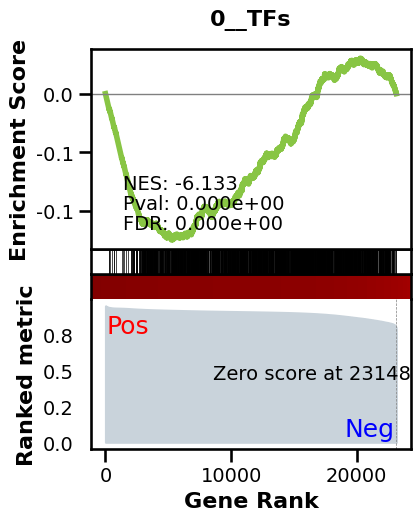

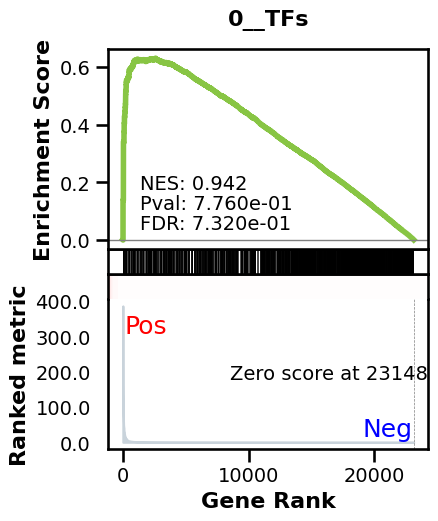

_________________________________________
TF specific enrichment


found some significant results for  64.28571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.36it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.35it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.35it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.36it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.37it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.37it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.36it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.34it/s]


  7%|▋         | 9/128 [00:02<00:30,  3.92it/s]


  8%|▊         | 10/128 [00:02<00:29,  4.04it/s]


  9%|▊         | 11/128 [00:02<00:28,  4.14it/s]


  9%|▉         | 12/128 [00:02<00:27,  4.21it/s]


 10%|█         | 13/128 [00:03<00:27,  4.25it/s]


 11%|█         | 14/128 [00:03<00:26,  4.25it/s]


 12%|█▏        | 15/128 [00:03<00:27,  4.18it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.23it/s]


 13%|█▎        | 17/128 [00:04<00:26,  4.27it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.30it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.31it/s]


 16%|█▌        | 20/128 [00:04<00:26,  4.12it/s]


 16%|█▋        | 21/128 [00:04<00:25,  4.16it/s]


 17%|█▋        | 22/128 [00:05<00:25,  4.22it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.26it/s]


 19%|█▉        | 24/128 [00:05<00:24,  4.29it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.30it/s]


 20%|██        | 26/128 [00:06<00:23,  4.26it/s]


 21%|██        | 27/128 [00:06<00:24,  4.12it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.19it/s]


 23%|██▎       | 29/128 [00:06<00:23,  4.24it/s]


 23%|██▎       | 30/128 [00:07<00:22,  4.27it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.30it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.33it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.34it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.34it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.34it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.34it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.34it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.33it/s]


 30%|███       | 39/128 [00:09<00:20,  4.33it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.34it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.34it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.34it/s]


 34%|███▎      | 43/128 [00:10<00:19,  4.34it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.34it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.36it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.37it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.37it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.36it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.35it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.35it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.36it/s]


 41%|████      | 52/128 [00:12<00:17,  4.36it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.36it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.36it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.36it/s]


 44%|████▍     | 56/128 [00:13<00:16,  4.36it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.36it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.35it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.35it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.36it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.37it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.37it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.37it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.37it/s]


 51%|█████     | 65/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 67/128 [00:15<00:14,  4.35it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.36it/s]


 54%|█████▍    | 69/128 [00:16<00:13,  4.35it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.35it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.35it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.35it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.34it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.34it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.35it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.35it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.34it/s]


 61%|██████    | 78/128 [00:18<00:11,  4.34it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.33it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.34it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.35it/s]


 64%|██████▍   | 82/128 [00:19<00:10,  4.36it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.37it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.36it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.35it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.35it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.35it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.34it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.34it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.34it/s]


 71%|███████   | 91/128 [00:21<00:08,  4.34it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.34it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.34it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.34it/s]


 74%|███████▍  | 95/128 [00:22<00:07,  4.34it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.34it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.34it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.34it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.35it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.36it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.37it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.37it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.37it/s]


 81%|████████▏ | 104/128 [00:24<00:05,  4.37it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.36it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.35it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.35it/s]


 84%|████████▍ | 108/128 [00:25<00:04,  4.34it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.34it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.35it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.35it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.36it/s]


 88%|████████▊ | 113/128 [00:26<00:03,  4.36it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.36it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.36it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.35it/s]


 91%|█████████▏| 117/128 [00:27<00:02,  4.35it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.35it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.34it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.35it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.31it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.24it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.29it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.32it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.34it/s]


 98%|█████████▊| 126/128 [00:29<00:00,  4.35it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.08it/s]


100%|██████████| 128/128 [00:29<00:00,  4.32it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001010693005564139


EPR: 1.8024703544760803


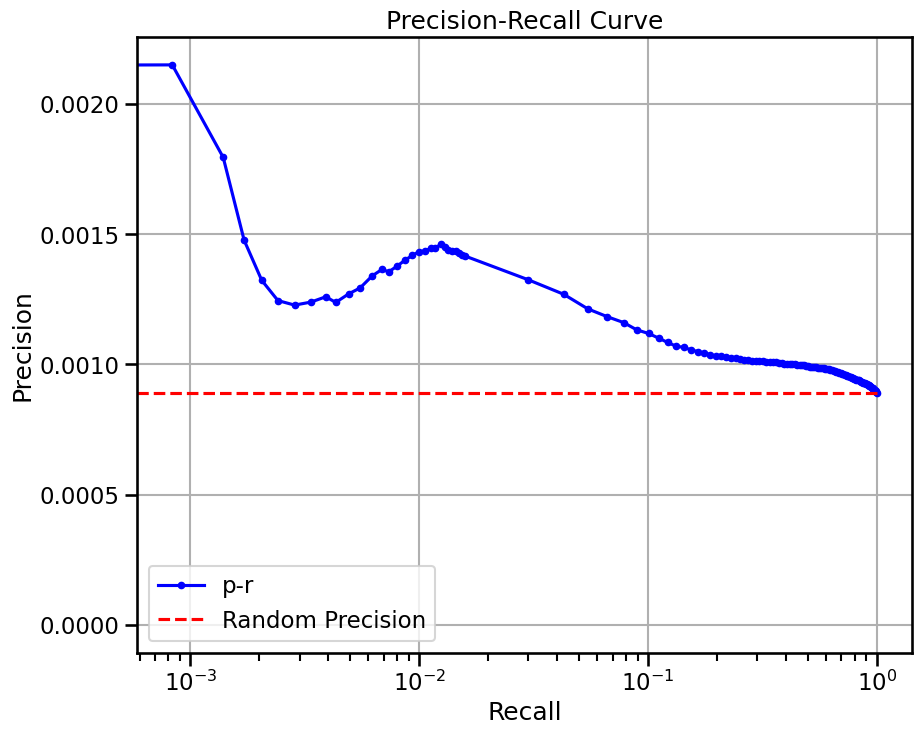

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


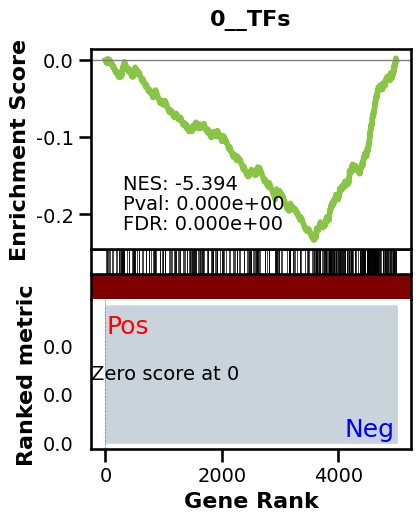

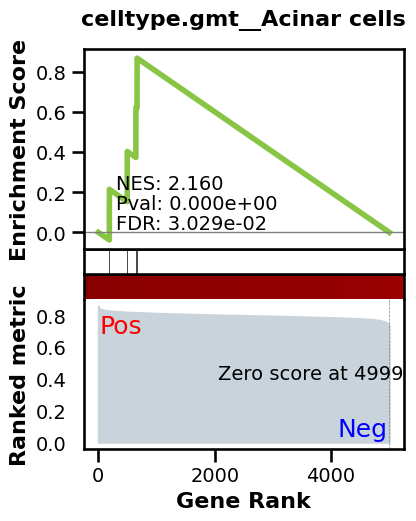

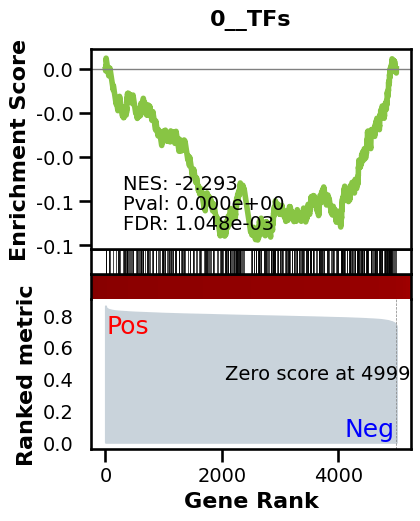

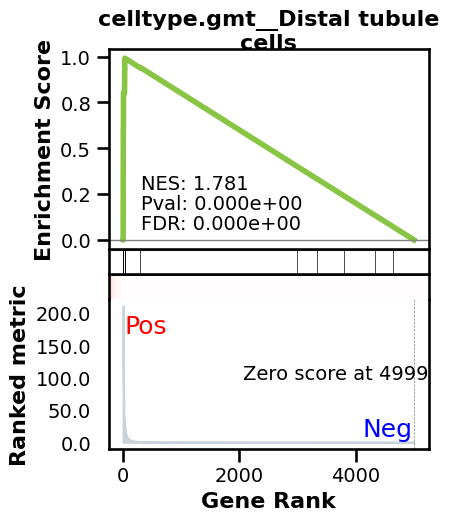

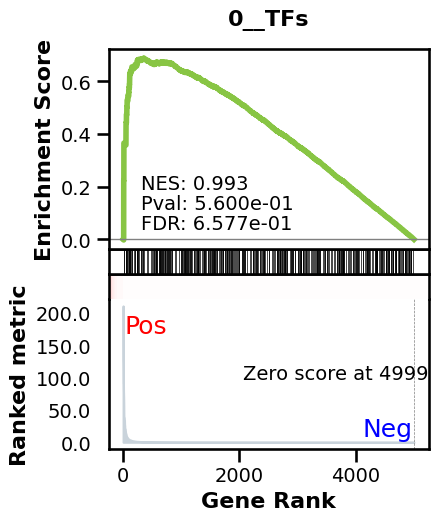

_________________________________________
TF specific enrichment


found some significant results for  11.764705882352942 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 59.05it/s]


  9%|▉         | 12/128 [00:00<00:01, 59.03it/s]


 14%|█▍        | 18/128 [00:00<00:01, 59.00it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.73it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.77it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.84it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.89it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.91it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.92it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.94it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.67it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.76it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.84it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.88it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.91it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.97it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.97it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.81it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.75it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 58.85it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 58.90it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.83it/s]

Area Under Precision-Recall Curve (AUPRC):  0.000876341582078115
EPR: 2.6620469453287052


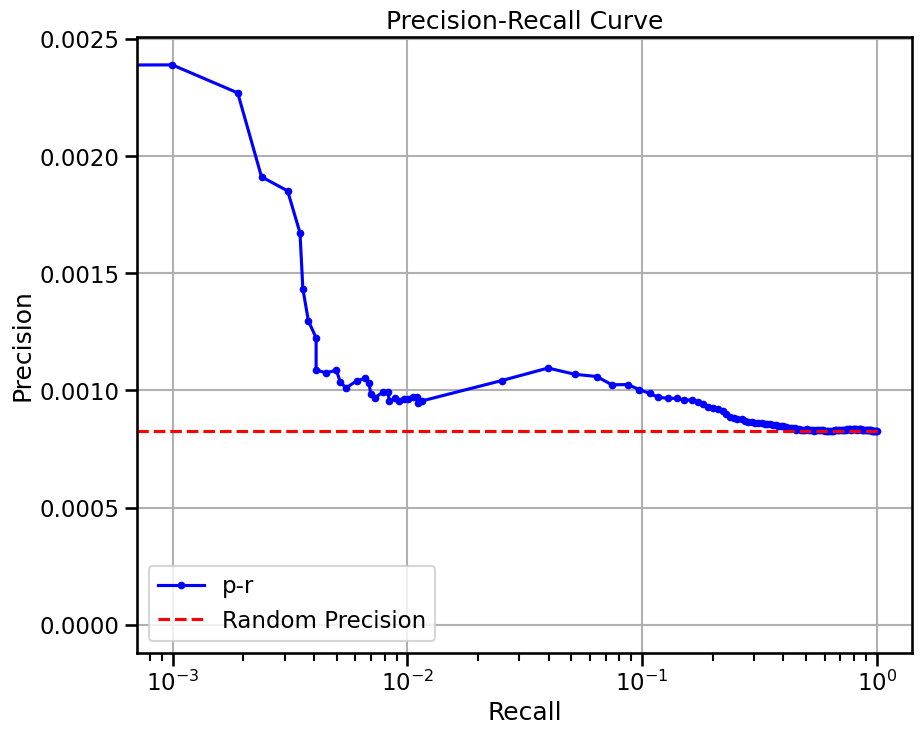

train classifier


true elem 10028 ...


doing classification....


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000


Epoch 2, change: 0.48284715


Epoch 3, change: 0.51247025


Epoch 4, change: 0.27709466


Epoch 5, change: 0.23652263


Epoch 6, change: 0.31884074


Epoch 7, change: 0.14267658


Epoch 8, change: 0.11501621


Epoch 9, change: 0.19253506


Epoch 10, change: 0.13922238


Epoch 11, change: 0.24538219


Epoch 12, change: 0.13317887


Epoch 13, change: 0.29685619


Epoch 14, change: 0.12676790


Epoch 15, change: 0.20142782


Epoch 16, change: 0.15474214


Epoch 17, change: 0.15930633


Epoch 18, change: 0.22991550


Epoch 19, change: 0.26597235


Epoch 20, change: 0.17080033


Epoch 21, change: 0.21290296


Epoch 22, change: 0.26970428


Epoch 23, change: 0.19261728


Epoch 24, change: 0.17902292


Epoch 25, change: 0.18713158


Epoch 26, change: 0.20902357


Epoch 27, change: 0.09076695


Epoch 28, change: 0.21883649


Epoch 29, change: 0.14407642


Epoch 30, change: 0.20486815


Epoch 31, change: 0.17422555


Epoch 32, change: 0.20055179


Epoch 33, change: 0.11470027


Epoch 34, change: 0.23735453


Epoch 35, change: 0.24071209


Epoch 36, change: 0.21666770


Epoch 37, change: 0.18094592


Epoch 38, change: 0.22427207


Epoch 39, change: 0.35282737


Epoch 40, change: 0.20112267


Epoch 41, change: 0.20467126


Epoch 42, change: 0.18911797


Epoch 43, change: 0.11218466


Epoch 44, change: 0.19982167


Epoch 45, change: 0.12650762


Epoch 46, change: 0.25072333


Epoch 47, change: 0.30978468


Epoch 48, change: 0.12090224


Epoch 49, change: 0.23581094


Epoch 50, change: 0.12913443


Epoch 51, change: 0.28718013


Epoch 52, change: 0.15661505


Epoch 53, change: 0.08861452


Epoch 54, change: 0.19730027


Epoch 55, change: 0.24095431


Epoch 56, change: 0.15832083


Epoch 57, change: 0.26656687


Epoch 58, change: 0.27595079


Epoch 59, change: 0.20510174


Epoch 60, change: 0.26097608


Epoch 61, change: 0.10978151


Epoch 62, change: 0.34734893


Epoch 63, change: 0.22758873


Epoch 64, change: 0.20349751


Epoch 65, change: 0.20431143


Epoch 66, change: 0.26029280


Epoch 67, change: 0.07281254


Epoch 68, change: 0.21972884


Epoch 69, change: 0.14345039


Epoch 70, change: 0.18167549


Epoch 71, change: 0.08142214


Epoch 72, change: 0.21067201


Epoch 73, change: 0.14276281


Epoch 74, change: 0.15719655


Epoch 75, change: 0.21246980


Epoch 76, change: 0.27837065


Epoch 77, change: 0.06990947


Epoch 78, change: 0.24885610


Epoch 79, change: 0.21574143


Epoch 80, change: 0.34993920


Epoch 81, change: 0.13136804


Epoch 82, change: 0.21680486


Epoch 83, change: 0.08484731


Epoch 84, change: 0.26089552


Epoch 85, change: 0.24184391


Epoch 86, change: 0.12313765


Epoch 87, change: 0.25823230


Epoch 88, change: 0.19336562


Epoch 89, change: 0.25086018


Epoch 90, change: 0.18475379


Epoch 91, change: 0.23928681


Epoch 92, change: 0.10929611


Epoch 93, change: 0.10722466


Epoch 94, change: 0.17833601


Epoch 95, change: 0.12853743


Epoch 96, change: 0.13189559


Epoch 97, change: 0.18651742


Epoch 98, change: 0.20656820


Epoch 99, change: 0.12441086


Epoch 100, change: 0.37165400


Epoch 101, change: 0.20225878


Epoch 102, change: 0.17900781


Epoch 103, change: 0.14563839


Epoch 104, change: 0.05590504


Epoch 105, change: 0.13781723


Epoch 106, change: 0.26273406


Epoch 107, change: 0.19252844


Epoch 108, change: 0.20376322


Epoch 109, change: 0.17697559


Epoch 110, change: 0.26362029


Epoch 111, change: 0.42709619


Epoch 112, change: 0.22519735


Epoch 113, change: 0.11059567


Epoch 114, change: 0.19985159


Epoch 115, change: 0.22225459


Epoch 116, change: 0.19051950


Epoch 117, change: 0.10221048


Epoch 118, change: 0.17958008


Epoch 119, change: 0.25354147


Epoch 120, change: 0.29037032


Epoch 121, change: 0.09752114


Epoch 122, change: 0.27097487


Epoch 123, change: 0.24728830


Epoch 124, change: 0.22131042


Epoch 125, change: 0.20293151


Epoch 126, change: 0.31299645


Epoch 127, change: 0.17744112


Epoch 128, change: 0.31305423


Epoch 129, change: 0.19715187


Epoch 130, change: 0.29258496


Epoch 131, change: 0.25566918


Epoch 132, change: 0.40536079


Epoch 133, change: 0.25356320


Epoch 134, change: 0.06982400


Epoch 135, change: 0.18590599


Epoch 136, change: 0.21440844


Epoch 137, change: 0.10977004


Epoch 138, change: 0.23814803


Epoch 139, change: 0.09009562


Epoch 140, change: 0.09383670


Epoch 141, change: 0.21816477


Epoch 142, change: 0.21399553


Epoch 143, change: 0.21982148


Epoch 144, change: 0.07073806


Epoch 145, change: 0.22654870


Epoch 146, change: 0.30569804


Epoch 147, change: 0.31625536


Epoch 148, change: 0.08070412


Epoch 149, change: 0.16384491


Epoch 150, change: 0.16326195


Epoch 151, change: 0.11893200


Epoch 152, change: 0.15463015


Epoch 153, change: 0.16563994


Epoch 154, change: 0.15174580


Epoch 155, change: 0.16851103


Epoch 156, change: 0.18080634


Epoch 157, change: 0.14293422


Epoch 158, change: 0.20171151


Epoch 159, change: 0.13859050


Epoch 160, change: 0.17142940


Epoch 161, change: 0.18443754


Epoch 162, change: 0.23952986


Epoch 163, change: 0.24895231


Epoch 164, change: 0.16193622


Epoch 165, change: 0.19556043


Epoch 166, change: 0.20377468


Epoch 167, change: 0.19973223


Epoch 168, change: 0.23784216


Epoch 169, change: 0.23473608


Epoch 170, change: 0.27653271


Epoch 171, change: 0.15486369


Epoch 172, change: 0.17405292


Epoch 173, change: 0.23931985


Epoch 174, change: 0.14039619


Epoch 175, change: 0.14458461


Epoch 176, change: 0.12853244


Epoch 177, change: 0.23535189


Epoch 178, change: 0.19026835


Epoch 179, change: 0.29395679


Epoch 180, change: 0.21813156


Epoch 181, change: 0.13608034


Epoch 182, change: 0.15714121


Epoch 183, change: 0.15694882


Epoch 184, change: 0.14532746


Epoch 185, change: 0.23727849


Epoch 186, change: 0.25506988


Epoch 187, change: 0.21708153


Epoch 188, change: 0.27974033


Epoch 189, change: 0.36337733


Epoch 190, change: 0.20782122


Epoch 191, change: 0.17724046


Epoch 192, change: 0.13075575


Epoch 193, change: 0.23605101


Epoch 194, change: 0.37180793


Epoch 195, change: 0.18704511


Epoch 196, change: 0.12231968


Epoch 197, change: 0.17227323


Epoch 198, change: 0.21163151


Epoch 199, change: 0.16704962


max_iter reached after 2030 seconds
Epoch 200, change: 0.20247728


[Parallel(n_jobs=8)]: Done   1 tasks      | elapsed: 33.9min


metrics {'used_heads': 89, 'precision': 0.0017199514366653178, 'random_precision': 0.0007107006305408492, 'recall': 0.0032843894899536323, 'predicted_true': 9884.0, 'number_of_true': 5176.0, 'epr': 3.546742831007246}


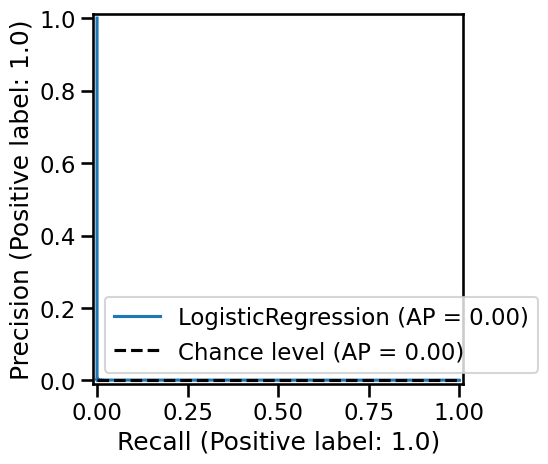

scprint_benchmark2
base enrichment


Top central genes: []


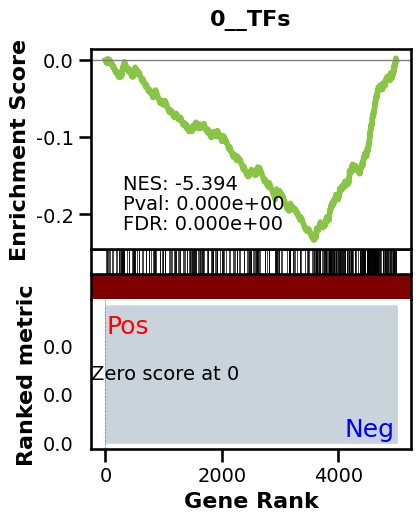

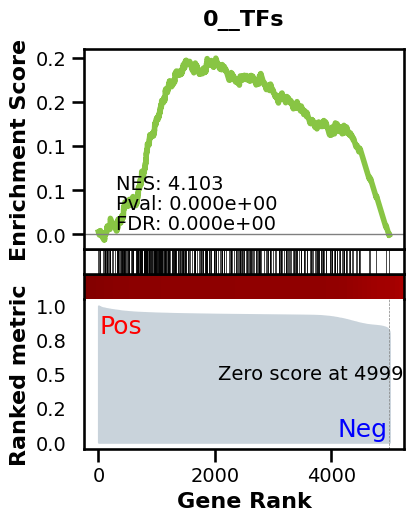

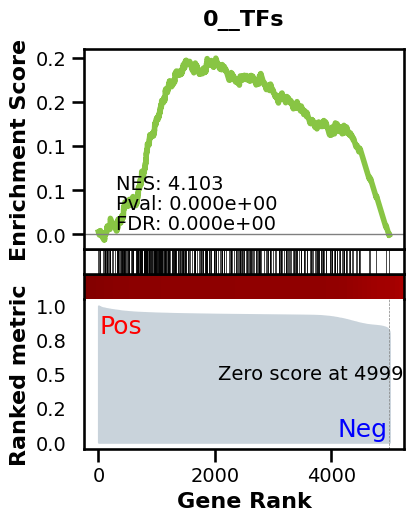

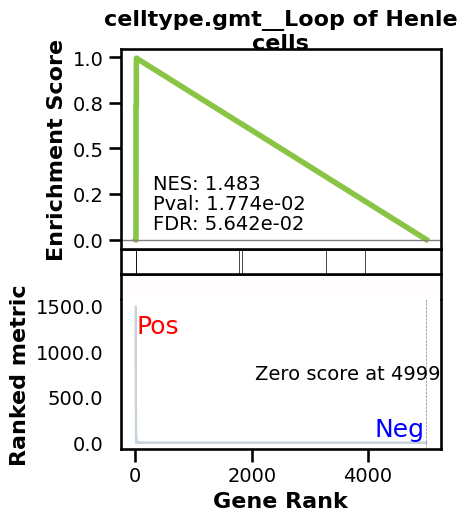

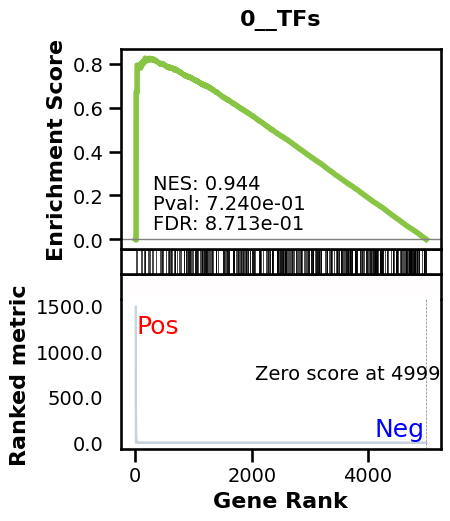

_________________________________________
TF specific enrichment


found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3484 genes
intersection pct: 0.6968
precision:  0.0008261483363013599 
recall:  1.0 
random precision: 0.0008263855307705822



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 58.49it/s]


  9%|▉         | 12/128 [00:00<00:01, 58.35it/s]


 14%|█▍        | 18/128 [00:00<00:01, 58.30it/s]


 19%|█▉        | 24/128 [00:00<00:01, 58.32it/s]


 23%|██▎       | 30/128 [00:00<00:01, 58.39it/s]


 28%|██▊       | 36/128 [00:00<00:01, 58.07it/s]


 33%|███▎      | 42/128 [00:00<00:01, 58.21it/s]


 38%|███▊      | 48/128 [00:00<00:01, 58.34it/s]


 42%|████▏     | 54/128 [00:00<00:01, 58.41it/s]


 47%|████▋     | 60/128 [00:01<00:01, 58.42it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 58.46it/s]


 56%|█████▋    | 72/128 [00:01<00:00, 58.44it/s]


 61%|██████    | 78/128 [00:01<00:00, 58.39it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 58.38it/s]


 70%|███████   | 90/128 [00:01<00:00, 58.42it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 58.45it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 58.51it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 58.52it/s]


 89%|████████▉ | 114/128 [00:01<00:00, 58.51it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 58.49it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 58.41it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 58.36it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008359941895036321


EPR: 1.0861937924291785


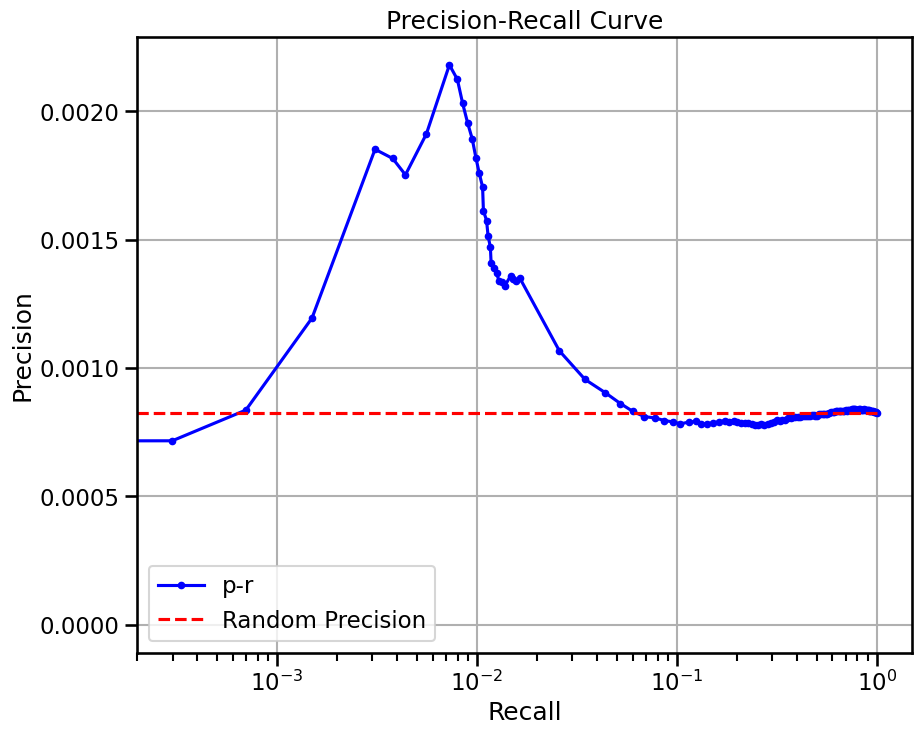

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


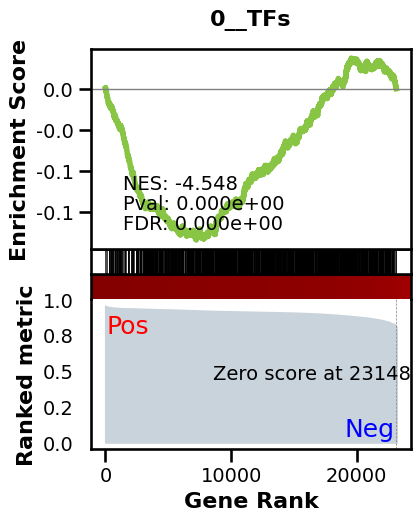

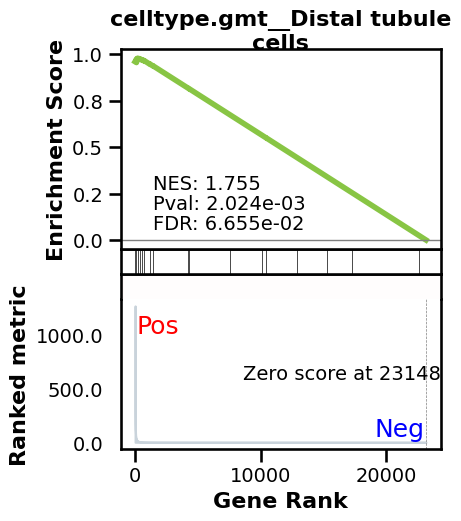

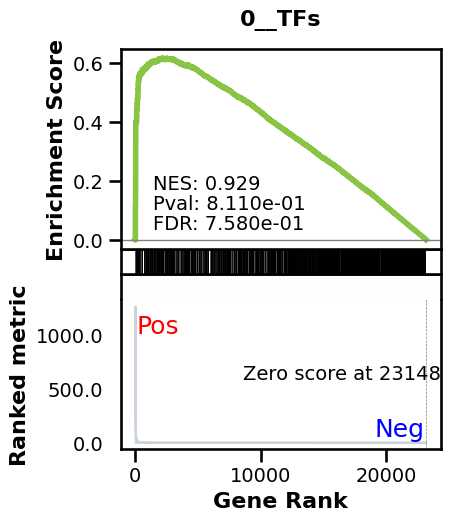

_________________________________________
TF specific enrichment


found some significant results for  65.17857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.45it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.44it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.44it/s]


  3%|▎         | 4/128 [00:00<00:27,  4.44it/s]


  4%|▍         | 5/128 [00:01<00:27,  4.45it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.44it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.44it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.44it/s]


  7%|▋         | 9/128 [00:02<00:26,  4.44it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.44it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.46it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.44it/s]


 10%|█         | 13/128 [00:02<00:25,  4.45it/s]


 11%|█         | 14/128 [00:03<00:25,  4.44it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.45it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.45it/s]


 13%|█▎        | 17/128 [00:03<00:24,  4.45it/s]


 14%|█▍        | 18/128 [00:04<00:24,  4.44it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.45it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.45it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.45it/s]


 17%|█▋        | 22/128 [00:04<00:23,  4.45it/s]


 18%|█▊        | 23/128 [00:05<00:23,  4.45it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.44it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.45it/s]


 20%|██        | 26/128 [00:05<00:23,  4.33it/s]


 21%|██        | 27/128 [00:06<00:23,  4.37it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.39it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.41it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.42it/s]


 24%|██▍       | 31/128 [00:06<00:21,  4.43it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.43it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.44it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.44it/s]


 27%|██▋       | 35/128 [00:07<00:20,  4.45it/s]


 28%|██▊       | 36/128 [00:08<00:20,  4.44it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.45it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.44it/s]


 30%|███       | 39/128 [00:08<00:19,  4.45it/s]


 31%|███▏      | 40/128 [00:09<00:19,  4.44it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.45it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.44it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.45it/s]


 34%|███▍      | 44/128 [00:09<00:18,  4.45it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.45it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.45it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.45it/s]


 38%|███▊      | 48/128 [00:10<00:17,  4.45it/s]


 38%|███▊      | 49/128 [00:11<00:17,  4.46it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.45it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.46it/s]


 41%|████      | 52/128 [00:11<00:17,  4.45it/s]


 41%|████▏     | 53/128 [00:11<00:16,  4.46it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.45it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.45it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.45it/s]


 45%|████▍     | 57/128 [00:12<00:15,  4.46it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.45it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.46it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.45it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.46it/s]


 48%|████▊     | 62/128 [00:13<00:14,  4.45it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.46it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.45it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.46it/s]


 52%|█████▏    | 66/128 [00:14<00:13,  4.45it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.46it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.45it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.46it/s]


 55%|█████▍    | 70/128 [00:15<00:13,  4.45it/s]


 55%|█████▌    | 71/128 [00:15<00:12,  4.45it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.44it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.43it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.43it/s]


 59%|█████▊    | 75/128 [00:16<00:11,  4.43it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.42it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.43it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.43it/s]


 62%|██████▏   | 79/128 [00:17<00:11,  4.43it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.43it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.44it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.43it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.43it/s]


 66%|██████▌   | 84/128 [00:18<00:09,  4.42it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.42it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.43it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.43it/s]


 69%|██████▉   | 88/128 [00:19<00:09,  4.43it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.43it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.42it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.43it/s]


 72%|███████▏  | 92/128 [00:20<00:08,  4.43it/s]


 73%|███████▎  | 93/128 [00:20<00:07,  4.44it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.44it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.45it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.44it/s]


 76%|███████▌  | 97/128 [00:21<00:06,  4.45it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.43it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.34it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.38it/s]


 79%|███████▉  | 101/128 [00:22<00:06,  4.39it/s]


 80%|███████▉  | 102/128 [00:22<00:05,  4.42it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.42it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.43it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.45it/s]


 83%|████████▎ | 106/128 [00:23<00:04,  4.45it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.45it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.45it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.45it/s]


 86%|████████▌ | 110/128 [00:24<00:04,  4.45it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.45it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.45it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.44it/s]


 89%|████████▉ | 114/128 [00:25<00:03,  4.45it/s]


 90%|████████▉ | 115/128 [00:25<00:02,  4.45it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.46it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.46it/s]


 92%|█████████▏| 118/128 [00:26<00:02,  4.46it/s]


 93%|█████████▎| 119/128 [00:26<00:02,  4.45it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.45it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.45it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.45it/s]


 96%|█████████▌| 123/128 [00:27<00:01,  4.45it/s]


 97%|█████████▋| 124/128 [00:27<00:00,  4.45it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.45it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.45it/s]


 99%|█████████▉| 127/128 [00:28<00:00,  4.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:28<00:00,  4.45it/s]


100%|██████████| 128/128 [00:28<00:00,  4.44it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001013783207508379


EPR: 1.761562574348862


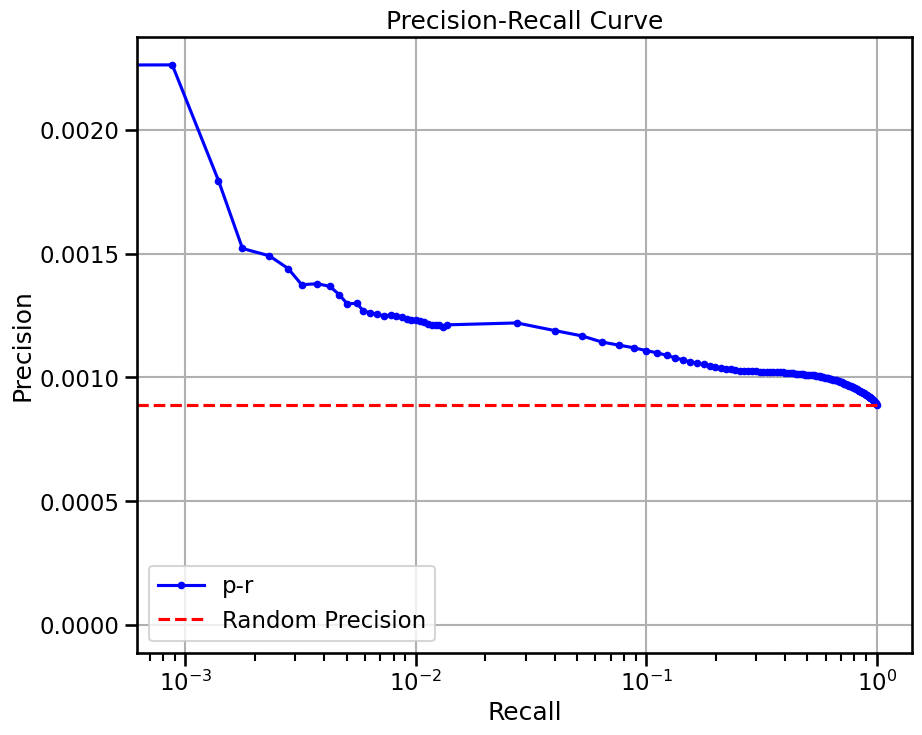

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


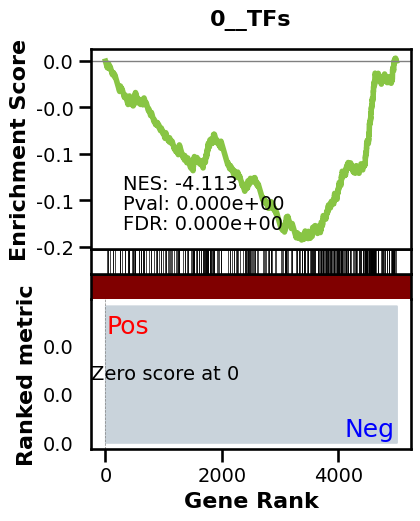

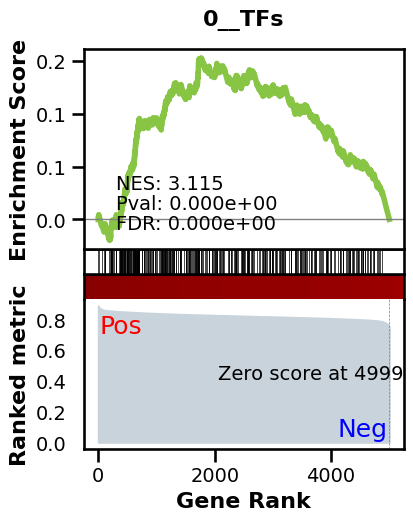

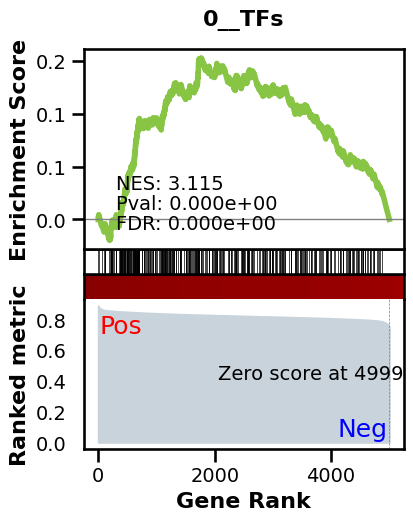

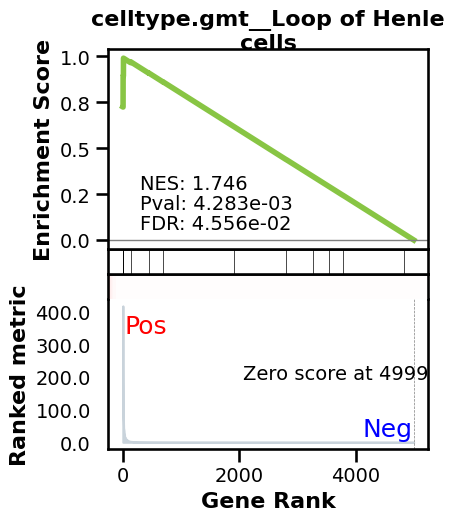

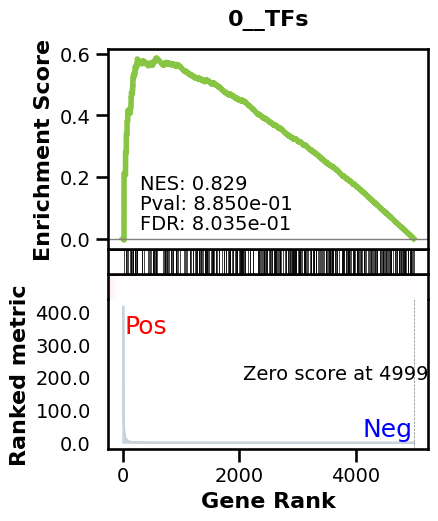

_________________________________________
TF specific enrichment


found some significant results for  11.538461538461538 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 63.32it/s]


 11%|█         | 14/128 [00:00<00:01, 63.46it/s]


 16%|█▋        | 21/128 [00:00<00:01, 63.49it/s]


 22%|██▏       | 28/128 [00:00<00:01, 63.50it/s]


 27%|██▋       | 35/128 [00:00<00:01, 63.33it/s]


 33%|███▎      | 42/128 [00:00<00:01, 63.35it/s]


 38%|███▊      | 49/128 [00:00<00:01, 63.43it/s]


 44%|████▍     | 56/128 [00:00<00:01, 63.45it/s]


 49%|████▉     | 63/128 [00:00<00:01, 63.47it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 63.44it/s]


 60%|██████    | 77/128 [00:01<00:00, 63.42it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 63.45it/s]


 71%|███████   | 91/128 [00:01<00:00, 63.49it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 63.51it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 63.48it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 63.48it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 63.49it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 63.50it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 63.43it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008834425703391215
EPR: 1.7214852038512451


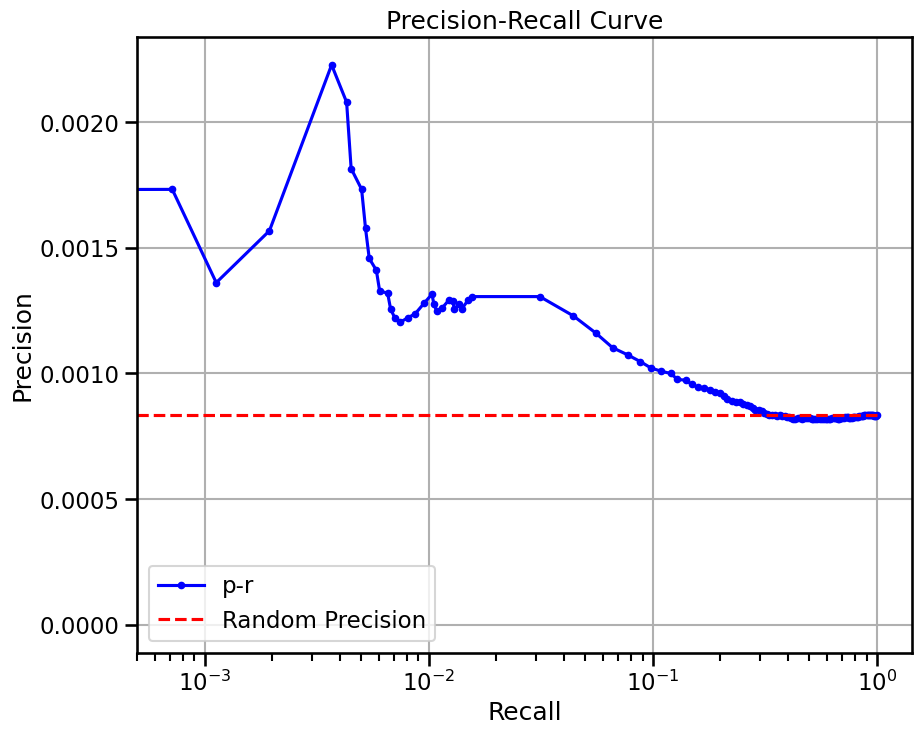

scprint_benchmark2
base enrichment


Top central genes: []


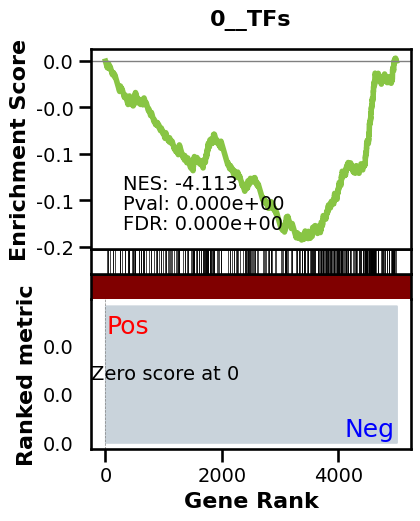

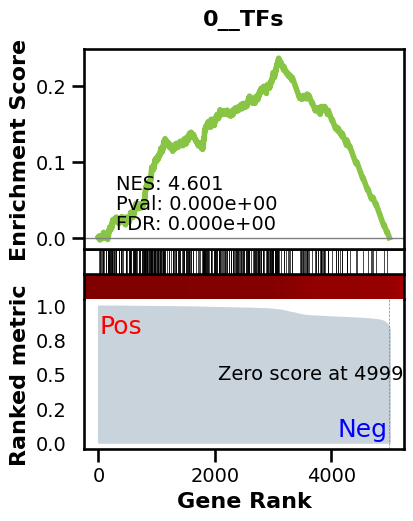

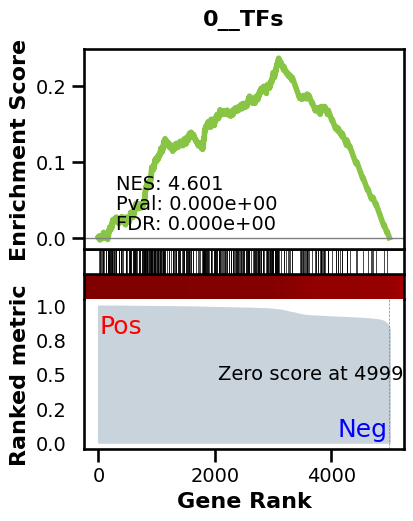

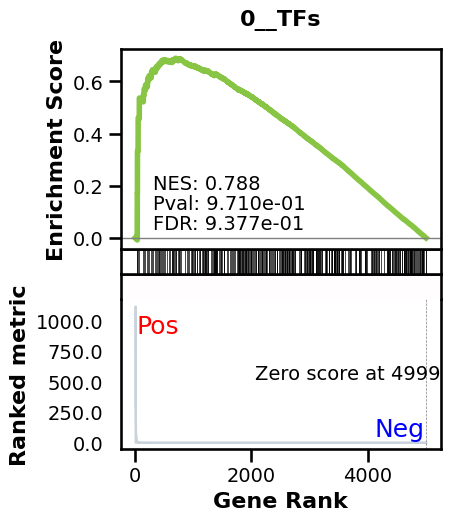

_________________________________________
TF specific enrichment


found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3423 genes
intersection pct: 0.6846
precision:  0.0008334948517653389 
recall:  1.0 
random precision: 0.0008337384212719915



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 62.28it/s]


 11%|█         | 14/128 [00:00<00:01, 62.40it/s]


 16%|█▋        | 21/128 [00:00<00:01, 62.49it/s]


 22%|██▏       | 28/128 [00:00<00:01, 62.54it/s]


 27%|██▋       | 35/128 [00:00<00:01, 62.57it/s]


 33%|███▎      | 42/128 [00:00<00:01, 62.59it/s]


 38%|███▊      | 49/128 [00:00<00:01, 62.58it/s]


 44%|████▍     | 56/128 [00:00<00:01, 62.53it/s]


 49%|████▉     | 63/128 [00:01<00:01, 62.53it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 62.56it/s]


 60%|██████    | 77/128 [00:01<00:00, 62.56it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 62.57it/s]


 71%|███████   | 91/128 [00:01<00:00, 62.43it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 62.47it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 62.49it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 62.39it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 62.38it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 62.42it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 62.45it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0008132665388544986
EPR: 1.2286237663524646


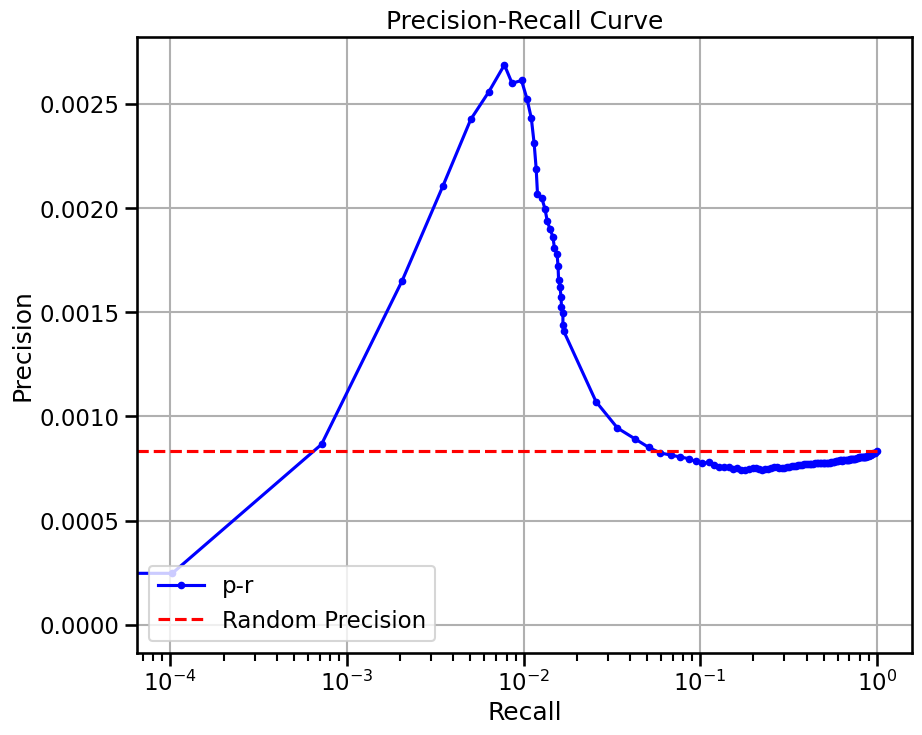

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


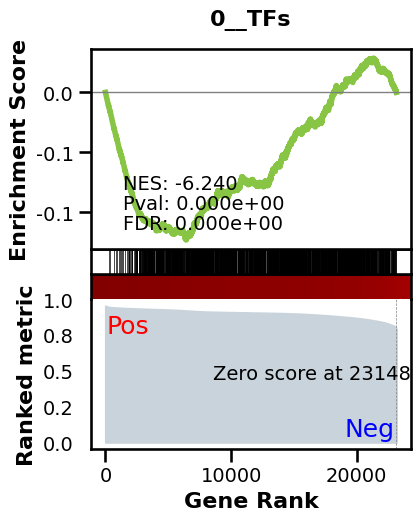

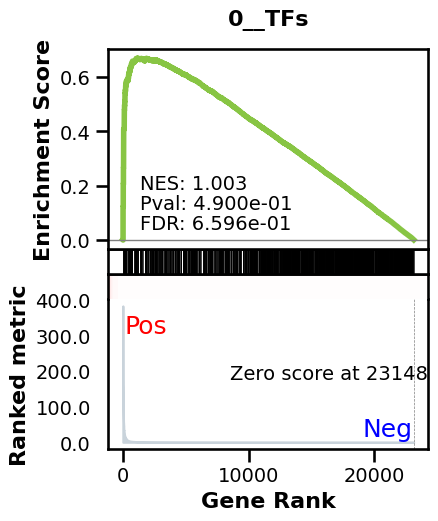

_________________________________________
TF specific enrichment


found some significant results for  63.392857142857146 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.42it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.43it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.45it/s]


  3%|▎         | 4/128 [00:00<00:27,  4.43it/s]


  4%|▍         | 5/128 [00:01<00:27,  4.44it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.43it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.44it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.44it/s]


  7%|▋         | 9/128 [00:02<00:26,  4.44it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.44it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.44it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.44it/s]


 10%|█         | 13/128 [00:02<00:25,  4.45it/s]


 11%|█         | 14/128 [00:03<00:25,  4.44it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.45it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.44it/s]


 13%|█▎        | 17/128 [00:03<00:24,  4.44it/s]


 14%|█▍        | 18/128 [00:04<00:24,  4.44it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.44it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.43it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.44it/s]


 17%|█▋        | 22/128 [00:04<00:24,  4.42it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.35it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.38it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.36it/s]


 20%|██        | 26/128 [00:05<00:23,  4.39it/s]


 21%|██        | 27/128 [00:06<00:22,  4.40it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.27it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.33it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.36it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.39it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.40it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.42it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.42it/s]


 27%|██▋       | 35/128 [00:07<00:20,  4.43it/s]


 28%|██▊       | 36/128 [00:08<00:20,  4.42it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.44it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.43it/s]


 30%|███       | 39/128 [00:08<00:20,  4.44it/s]


 31%|███▏      | 40/128 [00:09<00:19,  4.44it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.44it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.44it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.45it/s]


 34%|███▍      | 44/128 [00:09<00:18,  4.44it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.44it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.44it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.45it/s]


 38%|███▊      | 48/128 [00:10<00:17,  4.45it/s]


 38%|███▊      | 49/128 [00:11<00:17,  4.45it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.44it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.45it/s]


 41%|████      | 52/128 [00:11<00:17,  4.45it/s]


 41%|████▏     | 53/128 [00:11<00:16,  4.45it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.45it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.45it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.45it/s]


 45%|████▍     | 57/128 [00:12<00:15,  4.45it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.44it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.45it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.44it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.44it/s]


 48%|████▊     | 62/128 [00:14<00:14,  4.45it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.44it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.45it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.43it/s]


 52%|█████▏    | 66/128 [00:14<00:13,  4.44it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.43it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.43it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.43it/s]


 55%|█████▍    | 70/128 [00:15<00:13,  4.44it/s]


 55%|█████▌    | 71/128 [00:16<00:12,  4.43it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.44it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.43it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.44it/s]


 59%|█████▊    | 75/128 [00:16<00:11,  4.44it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.44it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.44it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.44it/s]


 62%|██████▏   | 79/128 [00:17<00:11,  4.43it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.44it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.44it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.44it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.43it/s]


 66%|██████▌   | 84/128 [00:18<00:09,  4.44it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.43it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.44it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.43it/s]


 69%|██████▉   | 88/128 [00:19<00:09,  4.44it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.43it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.43it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.43it/s]


 72%|███████▏  | 92/128 [00:20<00:08,  4.43it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.33it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.37it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.38it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.36it/s]


 76%|███████▌  | 97/128 [00:21<00:07,  4.39it/s]


 77%|███████▋  | 98/128 [00:22<00:07,  4.26it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.32it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.35it/s]


 79%|███████▉  | 101/128 [00:22<00:06,  4.38it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.39it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.42it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.41it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.43it/s]


 83%|████████▎ | 106/128 [00:23<00:04,  4.43it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.43it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.43it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.44it/s]


 86%|████████▌ | 110/128 [00:24<00:04,  4.44it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.44it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.44it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.45it/s]


 89%|████████▉ | 114/128 [00:25<00:03,  4.44it/s]


 90%|████████▉ | 115/128 [00:25<00:02,  4.45it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.44it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.45it/s]


 92%|█████████▏| 118/128 [00:26<00:02,  4.44it/s]


 93%|█████████▎| 119/128 [00:26<00:02,  4.44it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.44it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.45it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.44it/s]


 96%|█████████▌| 123/128 [00:27<00:01,  4.44it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.44it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.45it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.44it/s]


 99%|█████████▉| 127/128 [00:28<00:00,  4.45it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:28<00:00,  4.44it/s]


100%|██████████| 128/128 [00:28<00:00,  4.43it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001028423958063223


EPR: 1.917043722682133


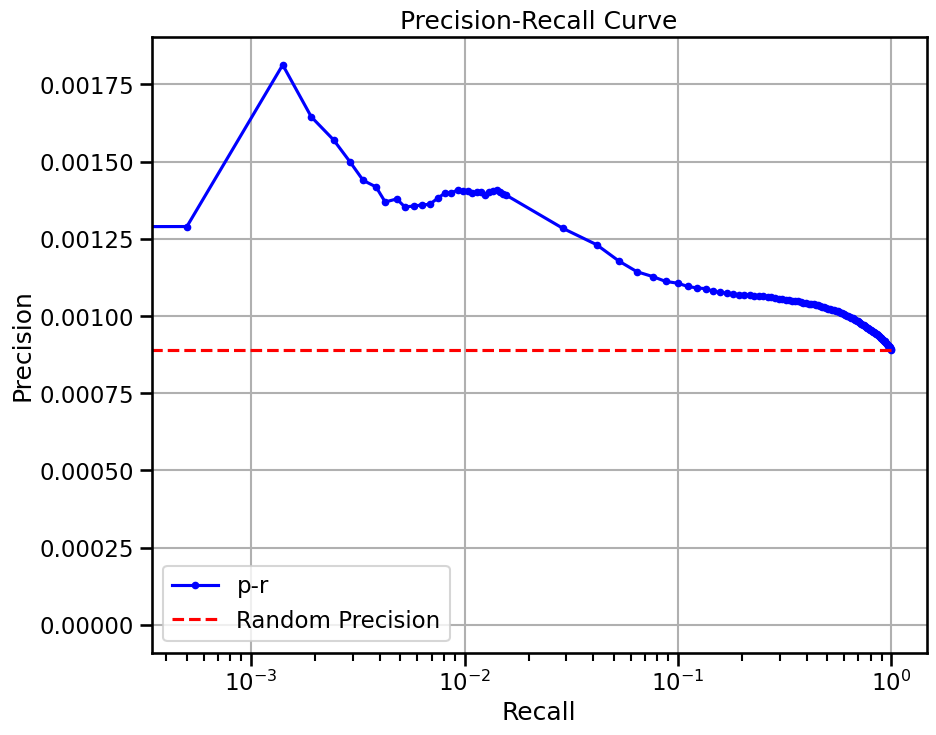

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


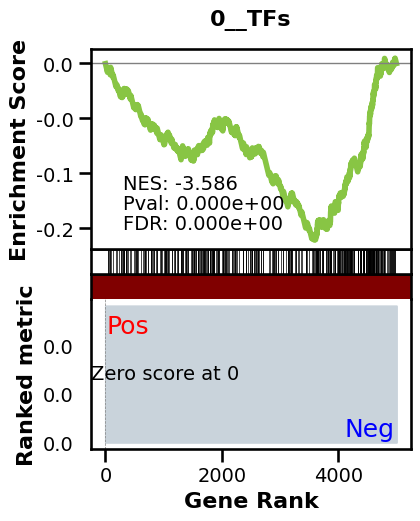

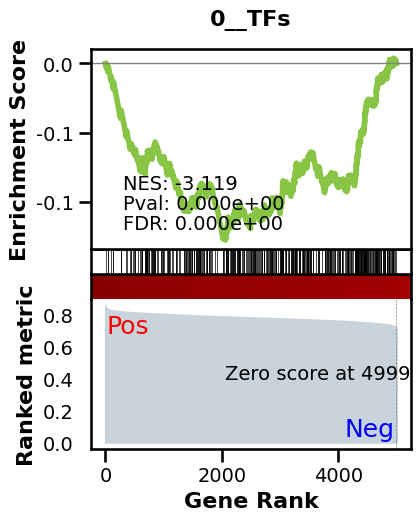

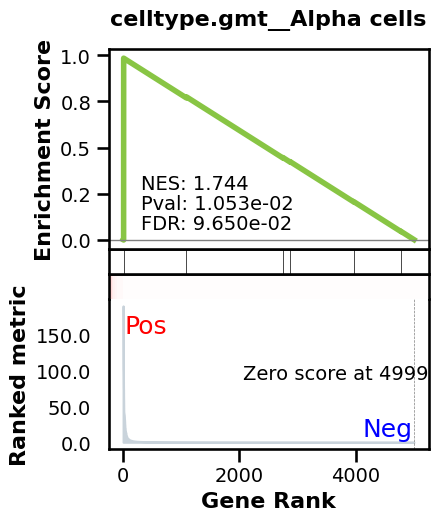

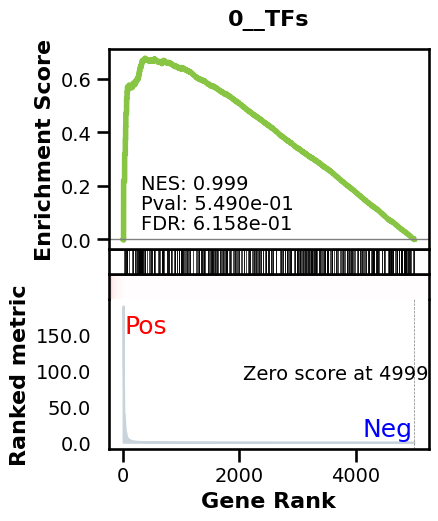

_________________________________________
TF specific enrichment


found some significant results for  15.625 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 55.37it/s]


  9%|▉         | 12/128 [00:00<00:02, 55.22it/s]


 14%|█▍        | 18/128 [00:00<00:01, 55.27it/s]


 19%|█▉        | 24/128 [00:00<00:01, 55.28it/s]


 23%|██▎       | 30/128 [00:00<00:01, 55.19it/s]


 28%|██▊       | 36/128 [00:00<00:01, 55.12it/s]


 33%|███▎      | 42/128 [00:00<00:01, 55.15it/s]


 38%|███▊      | 48/128 [00:00<00:01, 55.19it/s]


 42%|████▏     | 54/128 [00:00<00:01, 55.19it/s]


 47%|████▋     | 60/128 [00:01<00:01, 55.20it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 55.22it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 55.24it/s]


 61%|██████    | 78/128 [00:01<00:00, 55.28it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 55.32it/s]


 70%|███████   | 90/128 [00:01<00:00, 55.37it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 55.37it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.38it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.35it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 55.38it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 55.39it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 55.39it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 55.26it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0013994279508707103


EPR: 0.7134623715815356


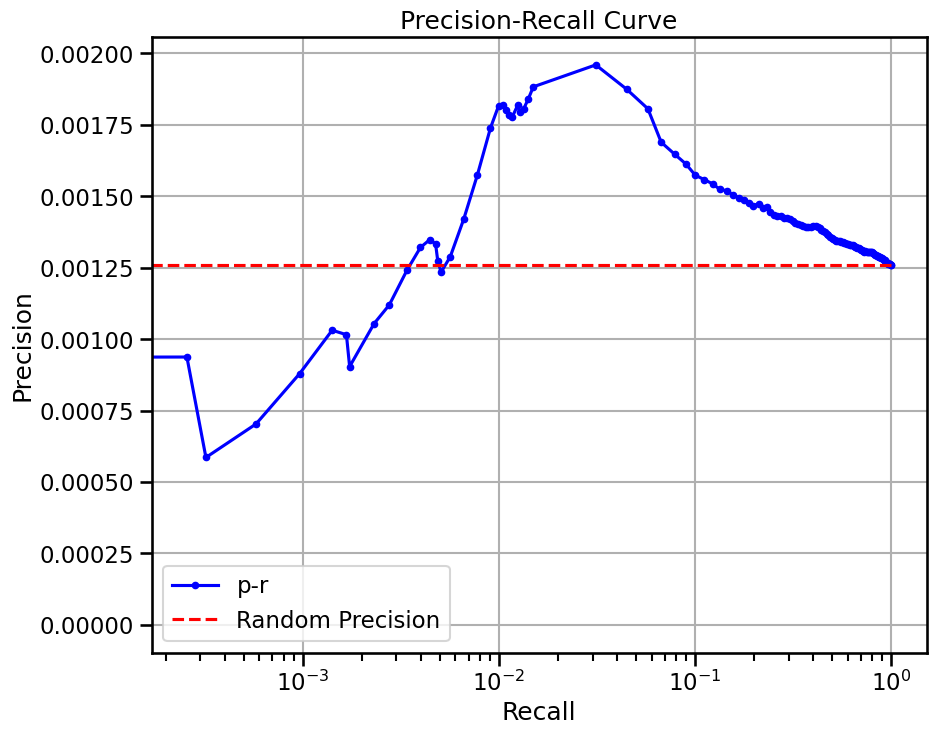

scprint_benchmark2
base enrichment


Top central genes: []


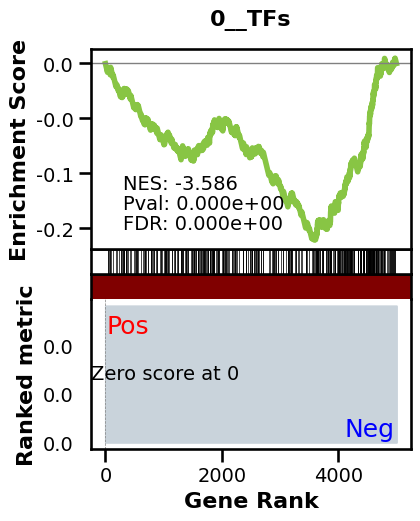

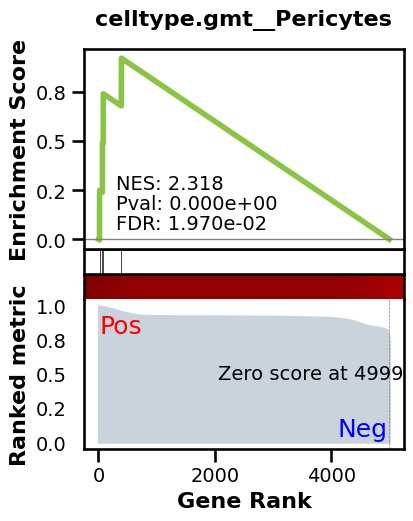

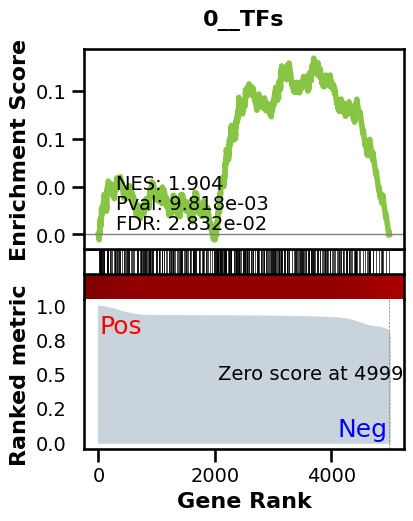

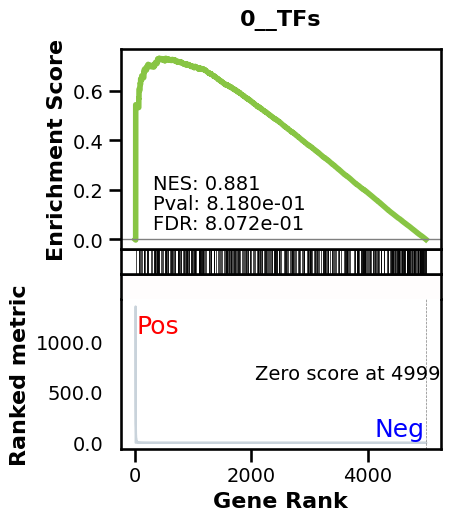

_________________________________________
TF specific enrichment


found some significant results for  9.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3518 genes
intersection pct: 0.7036
precision:  0.0012585320164533508 
recall:  1.0 
random precision: 0.001258889858937415



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 56.94it/s]


  9%|▉         | 12/128 [00:00<00:02, 56.88it/s]


 14%|█▍        | 18/128 [00:00<00:01, 56.91it/s]


 19%|█▉        | 24/128 [00:00<00:01, 56.92it/s]


 23%|██▎       | 30/128 [00:00<00:01, 56.89it/s]


 28%|██▊       | 36/128 [00:00<00:01, 56.91it/s]


 33%|███▎      | 42/128 [00:00<00:01, 56.92it/s]


 38%|███▊      | 48/128 [00:00<00:01, 56.95it/s]


 42%|████▏     | 54/128 [00:00<00:01, 56.97it/s]


 47%|████▋     | 60/128 [00:01<00:01, 56.95it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 45.16it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 48.22it/s]


 61%|██████    | 78/128 [00:01<00:00, 50.54it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 52.29it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.41it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.44it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 55.16it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 55.66it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 56.02it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 56.28it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 56.47it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.67it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001452536411095719
EPR: 1.3782663525203298


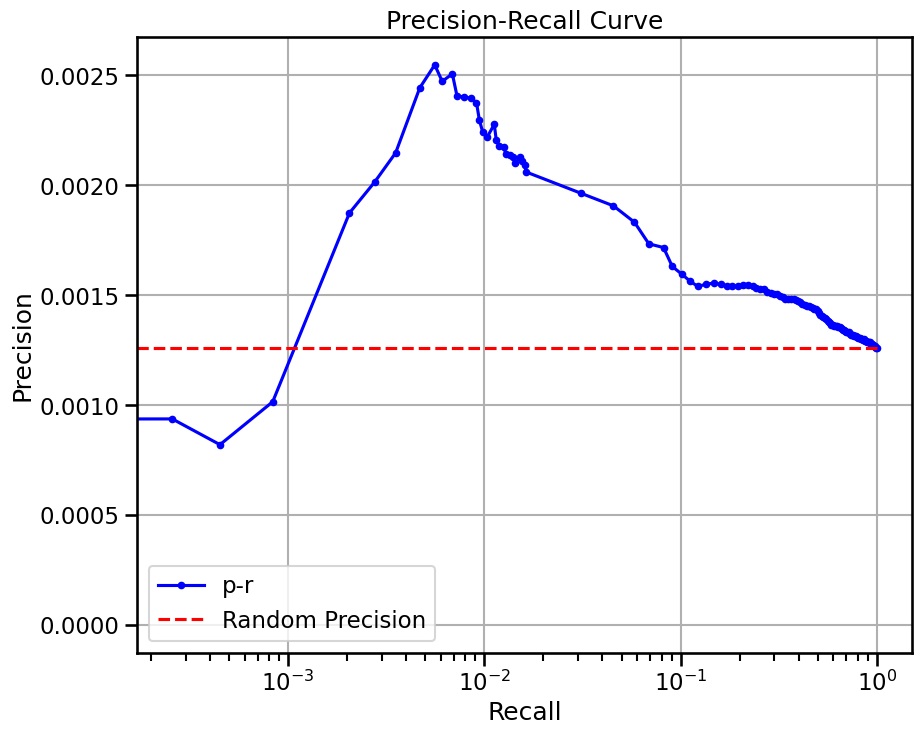

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 101666889, sparsity: 1.0


base enrichment
too many genes for central computation


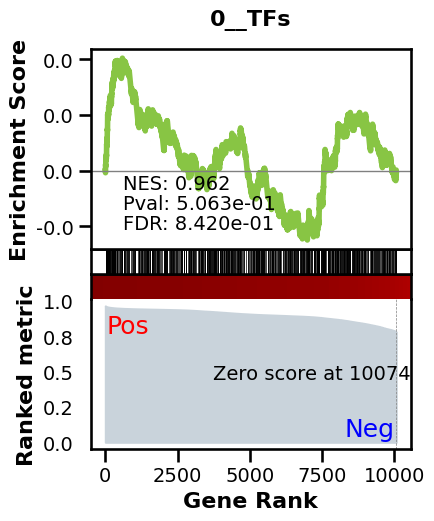

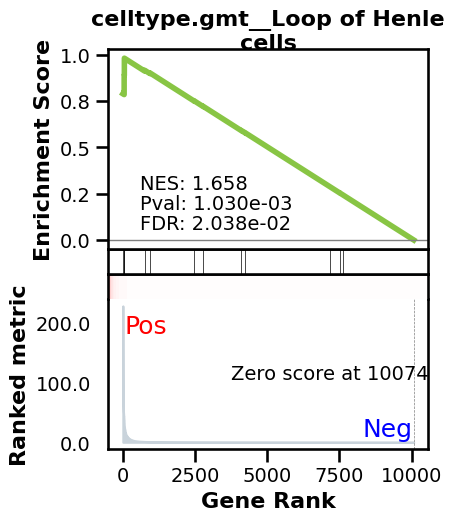

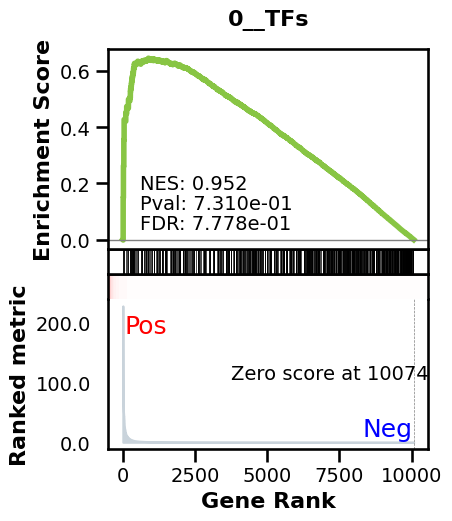

_________________________________________
TF specific enrichment


found some significant results for  34.72222222222222 % TFs

_________________________________________
loading GT,  omnipath


intersection of 5902 genes
intersection pct: 0.5858064516129032
precision:  0.0009428539177284097 
recall:  1.0 
random precision: 0.000943013696396047



  0%|          | 0/128 [00:00<?, ?it/s]


  2%|▏         | 3/128 [00:00<00:06, 20.18it/s]


  5%|▍         | 6/128 [00:00<00:06, 20.16it/s]


  7%|▋         | 9/128 [00:00<00:05, 20.07it/s]


  9%|▉         | 12/128 [00:00<00:05, 20.07it/s]


 12%|█▏        | 15/128 [00:00<00:05, 20.11it/s]


 14%|█▍        | 18/128 [00:00<00:05, 20.08it/s]


 16%|█▋        | 21/128 [00:01<00:05, 20.10it/s]


 19%|█▉        | 24/128 [00:01<00:05, 20.07it/s]


 21%|██        | 27/128 [00:01<00:05, 20.09it/s]


 23%|██▎       | 30/128 [00:01<00:04, 20.07it/s]


 26%|██▌       | 33/128 [00:01<00:04, 20.08it/s]


 28%|██▊       | 36/128 [00:01<00:04, 20.08it/s]


 30%|███       | 39/128 [00:01<00:04, 20.08it/s]


 33%|███▎      | 42/128 [00:02<00:04, 20.09it/s]


 35%|███▌      | 45/128 [00:02<00:04, 20.08it/s]


 38%|███▊      | 48/128 [00:02<00:03, 20.11it/s]


 40%|███▉      | 51/128 [00:02<00:03, 20.08it/s]


 42%|████▏     | 54/128 [00:02<00:03, 19.95it/s]


 45%|████▍     | 57/128 [00:02<00:03, 20.02it/s]


 47%|████▋     | 60/128 [00:02<00:03, 20.06it/s]


 49%|████▉     | 63/128 [00:03<00:03, 20.06it/s]


 52%|█████▏    | 66/128 [00:03<00:03, 20.10it/s]


 54%|█████▍    | 69/128 [00:03<00:02, 20.08it/s]


 56%|█████▋    | 72/128 [00:03<00:02, 20.12it/s]


 59%|█████▊    | 75/128 [00:03<00:02, 20.06it/s]


 61%|██████    | 78/128 [00:03<00:02, 20.07it/s]


 63%|██████▎   | 81/128 [00:04<00:02, 20.10it/s]


 66%|██████▌   | 84/128 [00:04<00:02, 20.07it/s]


 68%|██████▊   | 87/128 [00:04<00:02, 20.13it/s]


 70%|███████   | 90/128 [00:04<00:01, 20.12it/s]


 73%|███████▎  | 93/128 [00:04<00:01, 20.11it/s]


 75%|███████▌  | 96/128 [00:04<00:01, 20.07it/s]


 77%|███████▋  | 99/128 [00:04<00:01, 20.06it/s]


 80%|███████▉  | 102/128 [00:05<00:01, 20.05it/s]


 82%|████████▏ | 105/128 [00:05<00:01, 20.09it/s]


 84%|████████▍ | 108/128 [00:05<00:00, 20.10it/s]


 87%|████████▋ | 111/128 [00:05<00:00, 20.02it/s]


 89%|████████▉ | 114/128 [00:05<00:00, 20.08it/s]


 91%|█████████▏| 117/128 [00:05<00:00, 20.08it/s]


 94%|█████████▍| 120/128 [00:05<00:00, 20.06it/s]


 96%|█████████▌| 123/128 [00:06<00:00, 20.08it/s]


 98%|█████████▊| 126/128 [00:06<00:00, 20.07it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:06<00:00, 20.08it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001062465043921977


EPR: 1.3893966918872696


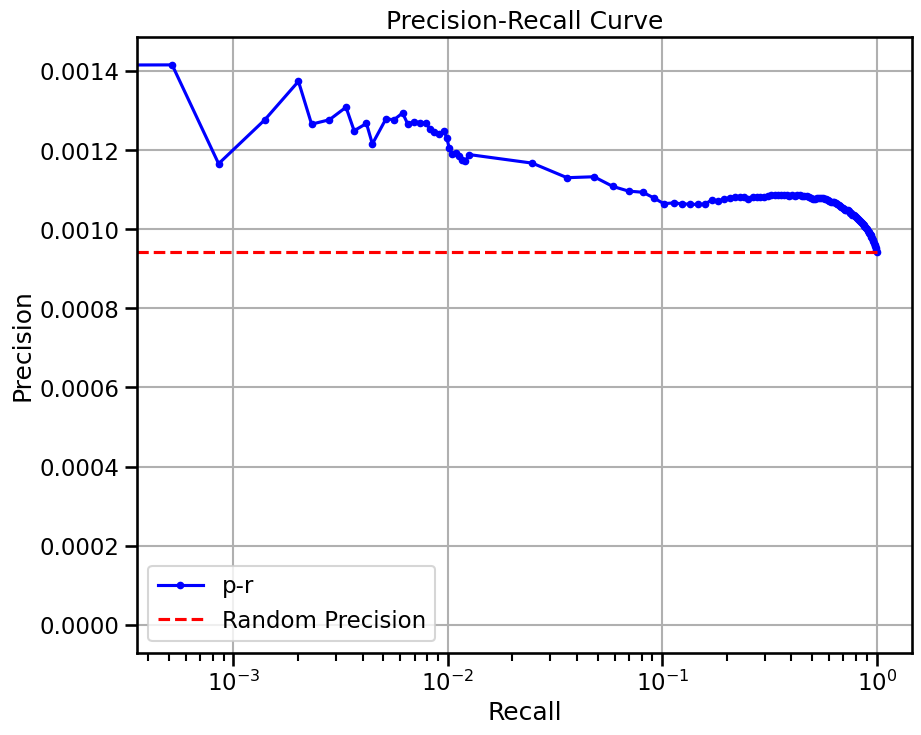

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


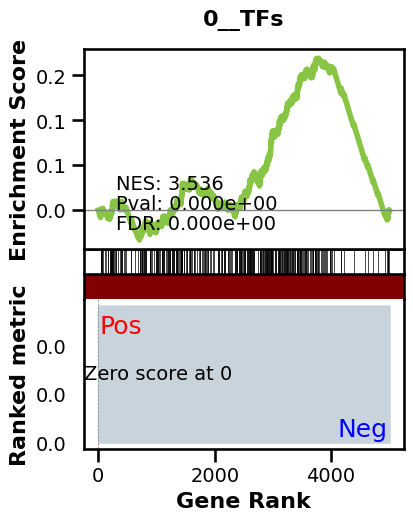

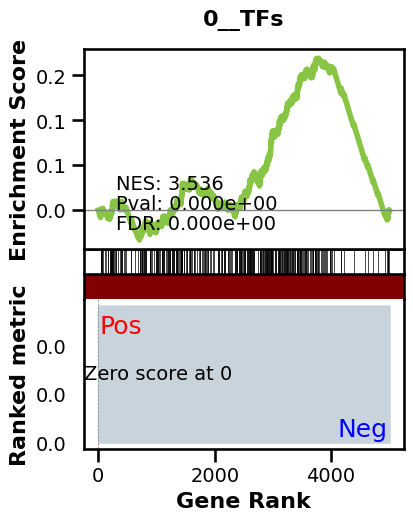

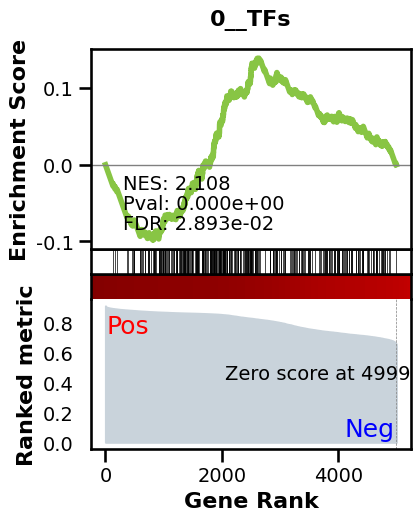

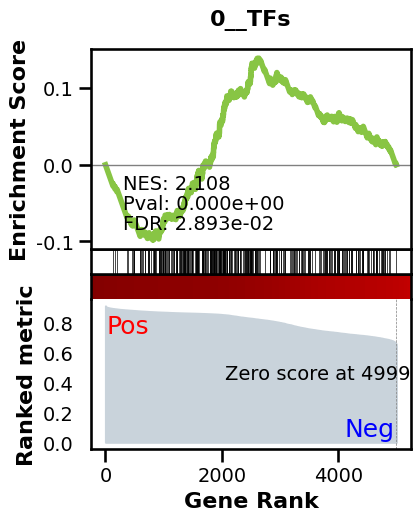

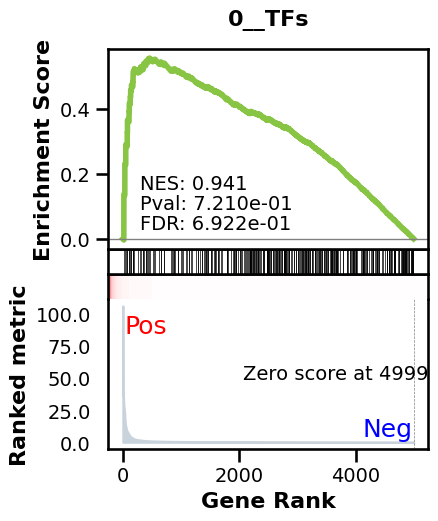

_________________________________________
TF specific enrichment


found some significant results for  34.375 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 90.34it/s]


 16%|█▌        | 20/128 [00:00<00:01, 90.23it/s]


 23%|██▎       | 30/128 [00:00<00:01, 90.21it/s]


 31%|███▏      | 40/128 [00:00<00:00, 90.72it/s]


 39%|███▉      | 50/128 [00:00<00:00, 90.75it/s]


 47%|████▋     | 60/128 [00:00<00:00, 91.14it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 91.46it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 91.27it/s]


 70%|███████   | 90/128 [00:00<00:00, 91.63it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 91.71it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 91.86it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 91.86it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 91.37it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001294134691136309
EPR: 0.579328785979101


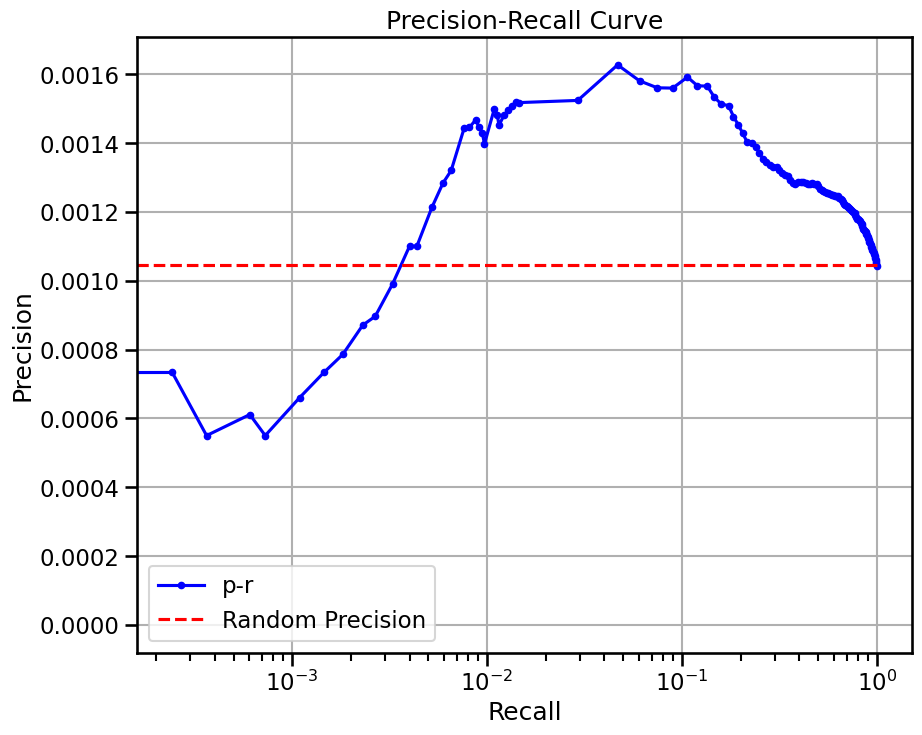

scprint_benchmark2
base enrichment


Top central genes: []


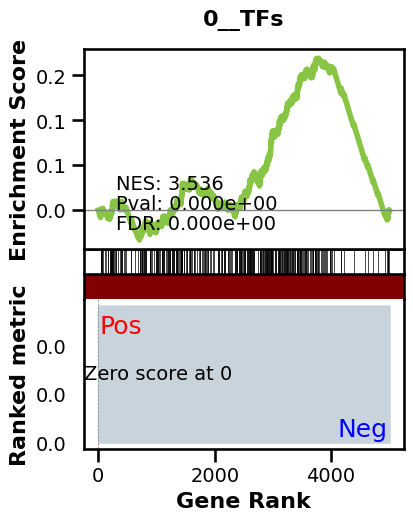

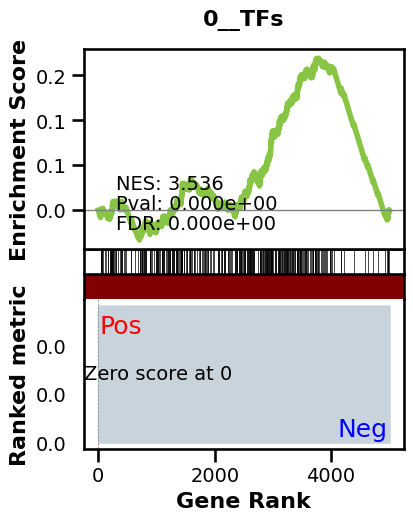

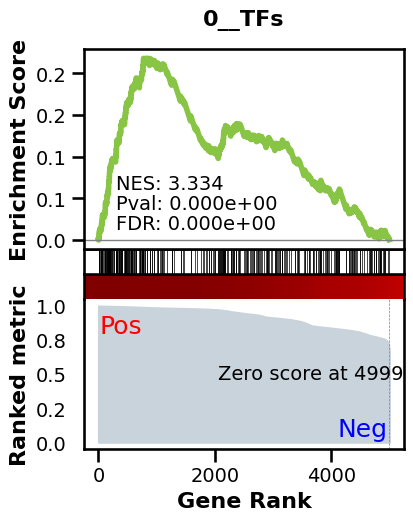

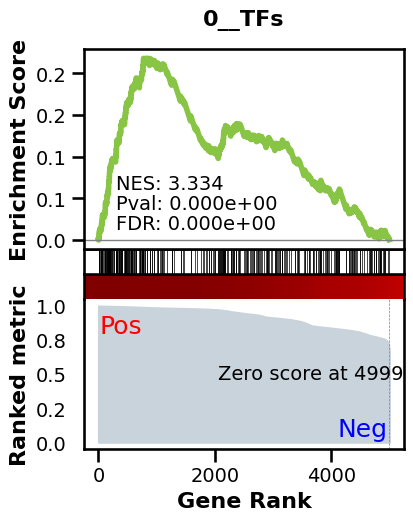

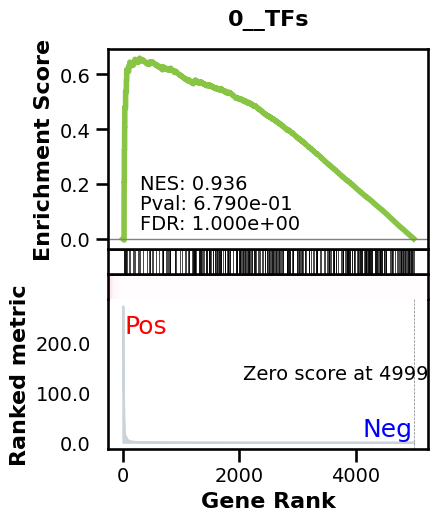

_________________________________________
TF specific enrichment


found some significant results for  18.75 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2812 genes
intersection pct: 0.5624
precision:  0.0010440926814363964 
recall:  1.0 
random precision: 0.0010444641124863559



  0%|          | 0/128 [00:00<?, ?it/s]


  7%|▋         | 9/128 [00:00<00:01, 89.34it/s]


 14%|█▍        | 18/128 [00:00<00:01, 89.40it/s]


 21%|██        | 27/128 [00:00<00:01, 89.39it/s]


 28%|██▊       | 36/128 [00:00<00:01, 88.87it/s]


 35%|███▌      | 45/128 [00:00<00:00, 89.02it/s]


 42%|████▏     | 54/128 [00:00<00:00, 89.17it/s]


 50%|█████     | 64/128 [00:00<00:00, 89.63it/s]


 58%|█████▊    | 74/128 [00:00<00:00, 89.98it/s]


 65%|██████▍   | 83/128 [00:00<00:00, 89.56it/s]


 72%|███████▏  | 92/128 [00:01<00:00, 89.57it/s]


 79%|███████▉  | 101/128 [00:01<00:00, 89.53it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 89.56it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 89.95it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 89.50it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001269859775983884
EPR: 1.3927524900999855


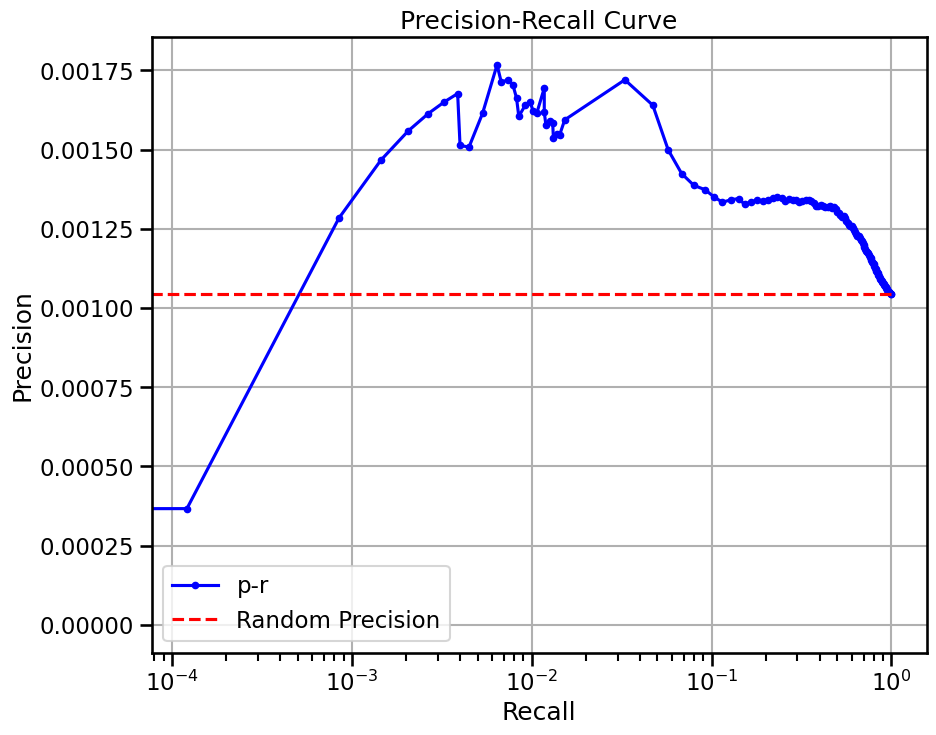

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


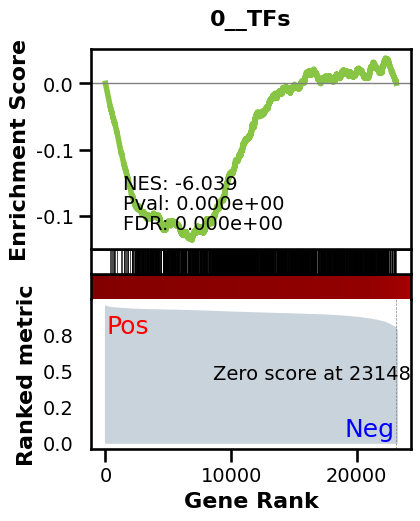

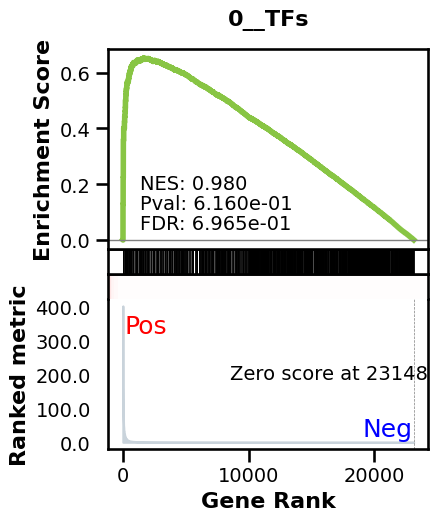

_________________________________________
TF specific enrichment


found some significant results for  67.85714285714286 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.38it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.37it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.37it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.37it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.37it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.36it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.36it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.36it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.36it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.36it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.36it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.36it/s]


 10%|█         | 13/128 [00:02<00:26,  4.36it/s]


 11%|█         | 14/128 [00:03<00:26,  4.36it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.36it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.36it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.37it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.37it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.36it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.37it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.37it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.36it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.36it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.37it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.37it/s]


 20%|██        | 26/128 [00:05<00:23,  4.37it/s]


 21%|██        | 27/128 [00:06<00:23,  4.37it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.36it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.37it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.36it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.36it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.36it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.35it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.35it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.36it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.36it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.36it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.36it/s]


 30%|███       | 39/128 [00:08<00:20,  4.36it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.36it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.36it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.36it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.36it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.36it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.36it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.36it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.37it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.36it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.36it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.36it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.36it/s]


 41%|████      | 52/128 [00:11<00:17,  4.36it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.36it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.36it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.36it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.36it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.36it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.36it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.36it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.36it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.36it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.36it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.36it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.36it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.36it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.36it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.36it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.36it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.36it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.36it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.36it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.36it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.36it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.36it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.36it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.36it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.36it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.36it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.36it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.36it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.36it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.36it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.36it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.36it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.36it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.36it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.36it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.36it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.35it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.35it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.35it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.35it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.34it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.34it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.35it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.35it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.35it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.36it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.36it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.36it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.36it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.36it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.36it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.36it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.36it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.36it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.36it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.36it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.36it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.36it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.36it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.36it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.36it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.36it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.36it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.36it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.36it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.35it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.36it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.36it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.36it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.36it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.36it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.36it/s]


100%|██████████| 128/128 [00:29<00:00,  4.36it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010604204623923155


EPR: 1.6388748416699654


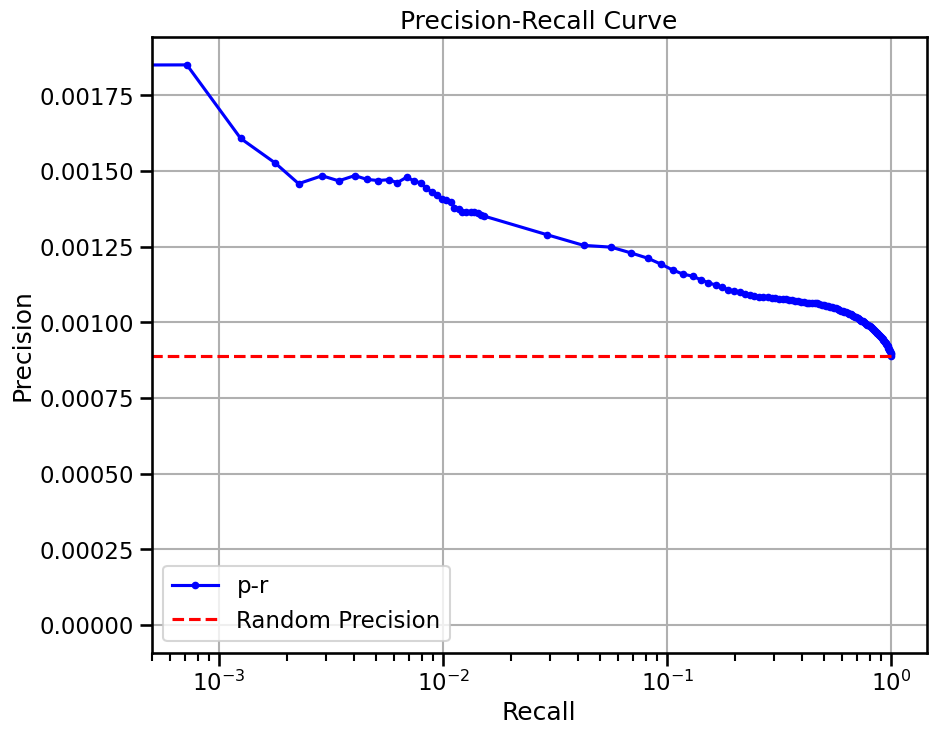

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


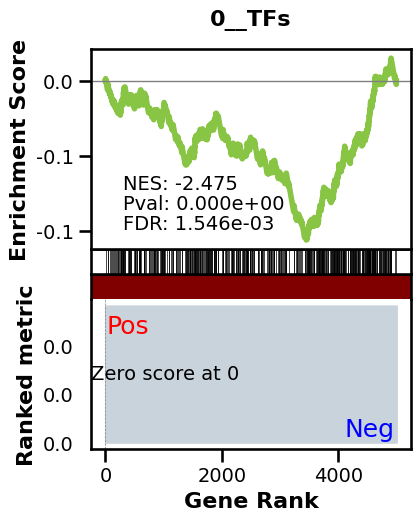

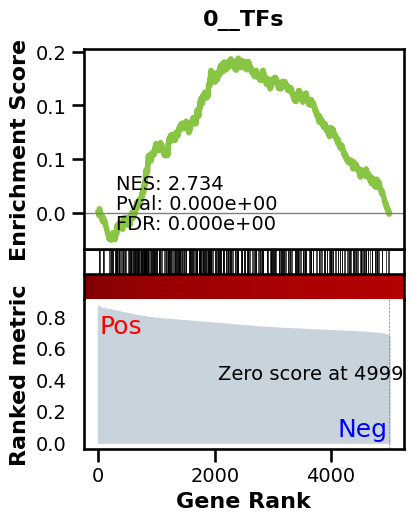

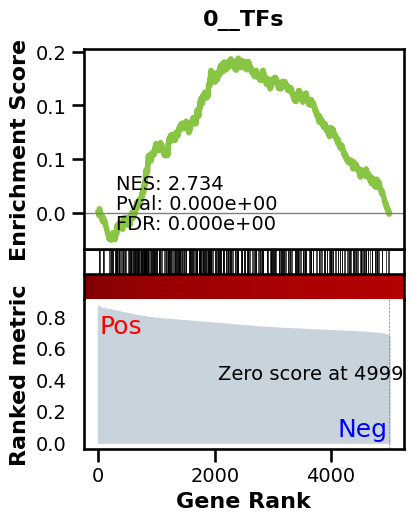

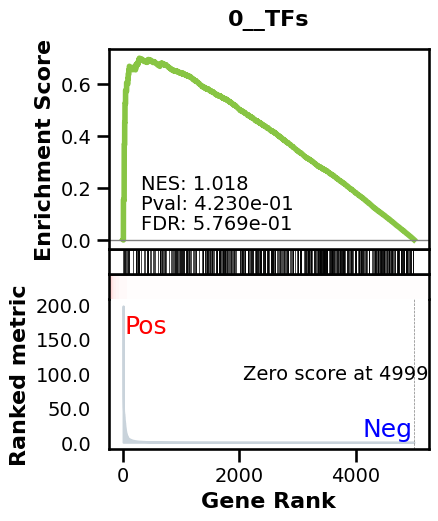

_________________________________________
TF specific enrichment


found some significant results for  29.09090909090909 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 53.58it/s]


  9%|▉         | 12/128 [00:00<00:02, 53.65it/s]


 14%|█▍        | 18/128 [00:00<00:02, 53.66it/s]


 19%|█▉        | 24/128 [00:00<00:01, 53.67it/s]


 23%|██▎       | 30/128 [00:00<00:01, 53.69it/s]


 28%|██▊       | 36/128 [00:00<00:01, 53.70it/s]


 33%|███▎      | 42/128 [00:00<00:01, 53.68it/s]


 38%|███▊      | 48/128 [00:00<00:01, 53.69it/s]


 42%|████▏     | 54/128 [00:01<00:01, 53.65it/s]


 47%|████▋     | 60/128 [00:01<00:01, 53.50it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 53.52it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 53.55it/s]


 61%|██████    | 78/128 [00:01<00:00, 53.42it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 53.44it/s]


 70%|███████   | 90/128 [00:01<00:00, 53.49it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 53.47it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 53.55it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 53.58it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 53.63it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 53.64it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 53.65it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 53.56it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001736668534407967
EPR: 1.618165553046366


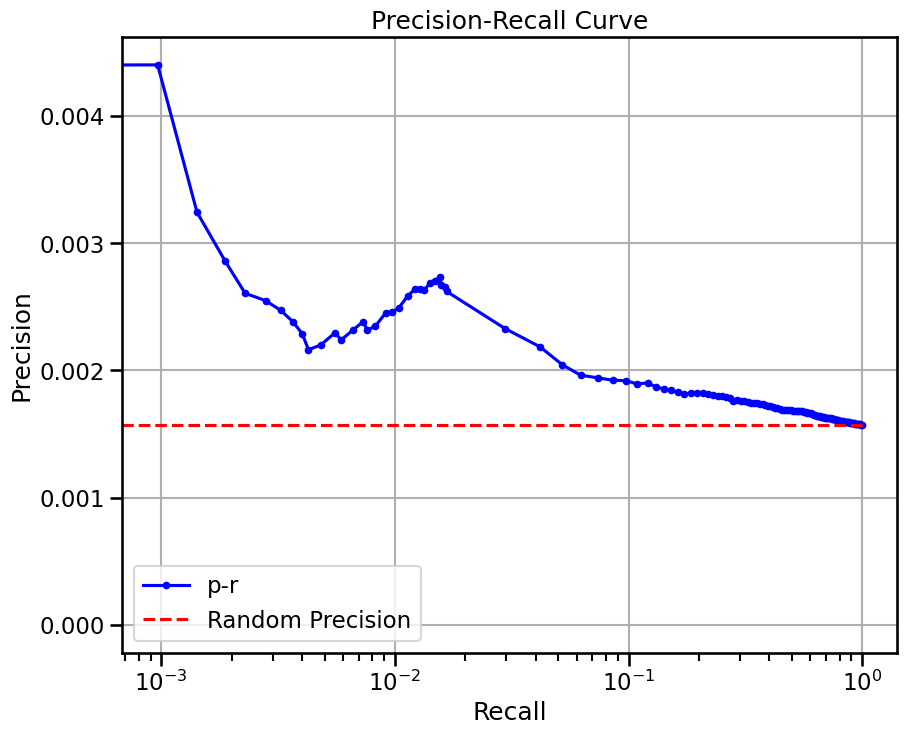

scprint_benchmark2
base enrichment


Top central genes: []


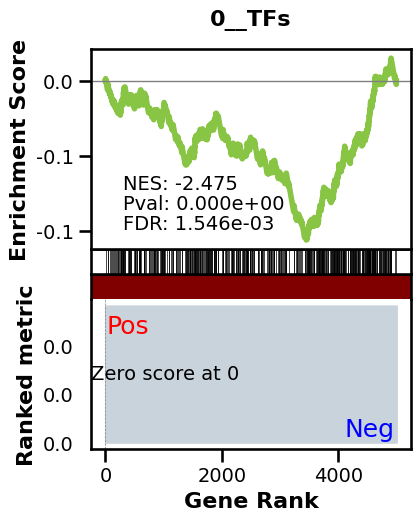

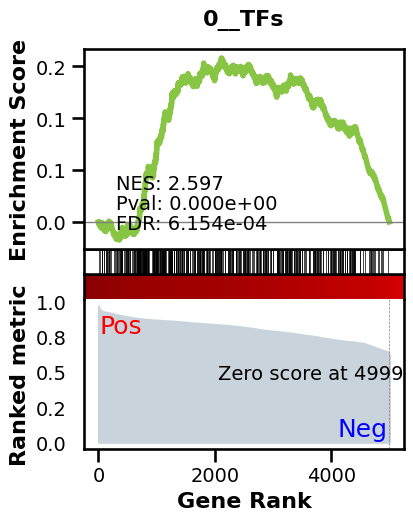

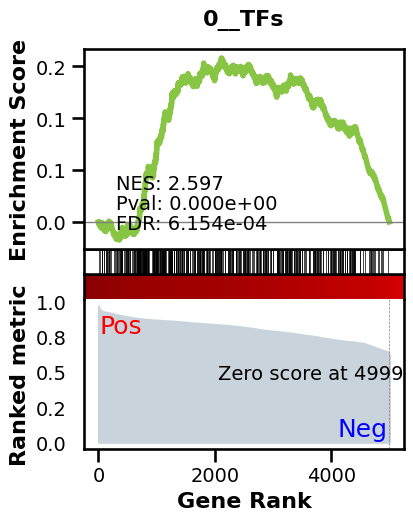

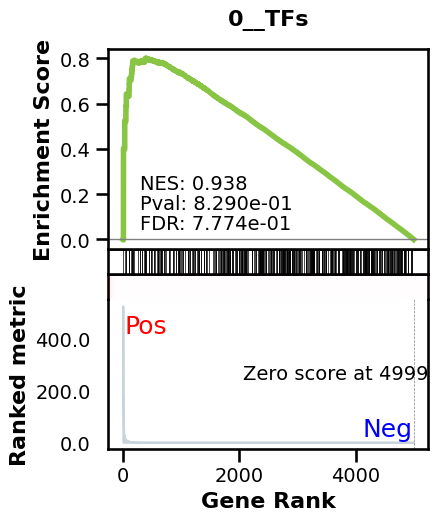

_________________________________________
TF specific enrichment


found some significant results for  10.909090909090908 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3538 genes
intersection pct: 0.7076
precision:  0.0015724456206874184 
recall:  1.0 
random precision: 0.0015728901911201826



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.63it/s]


  9%|▉         | 12/128 [00:00<00:02, 51.78it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.75it/s]


 19%|█▉        | 24/128 [00:00<00:02, 51.87it/s]


 23%|██▎       | 30/128 [00:00<00:01, 51.73it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.80it/s]


 33%|███▎      | 42/128 [00:00<00:01, 51.79it/s]


 38%|███▊      | 48/128 [00:00<00:01, 51.84it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.83it/s]


 47%|████▋     | 60/128 [00:01<00:01, 51.91it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 51.96it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 52.00it/s]


 61%|██████    | 78/128 [00:01<00:00, 52.00it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 52.05it/s]


 70%|███████   | 90/128 [00:01<00:00, 52.13it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 52.14it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 52.16it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 52.23it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 52.26it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 52.27it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 52.18it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.97it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017219200110534408


EPR: 1.3256791035660924


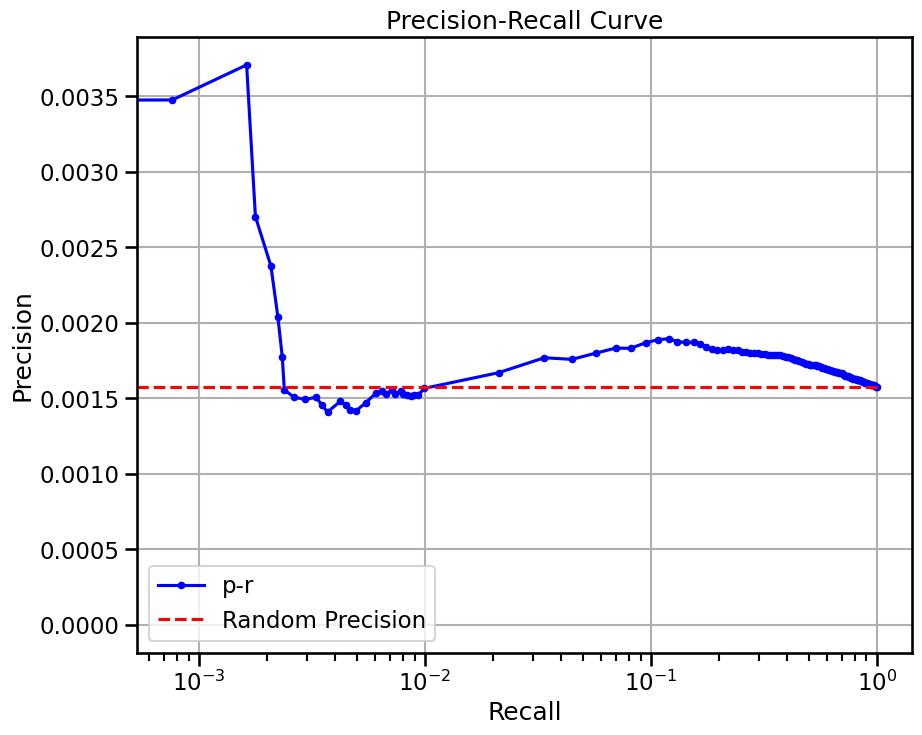

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


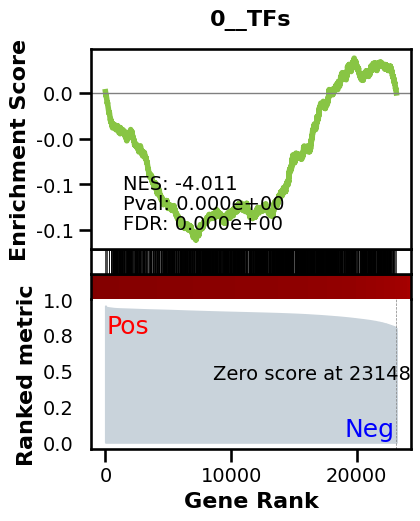

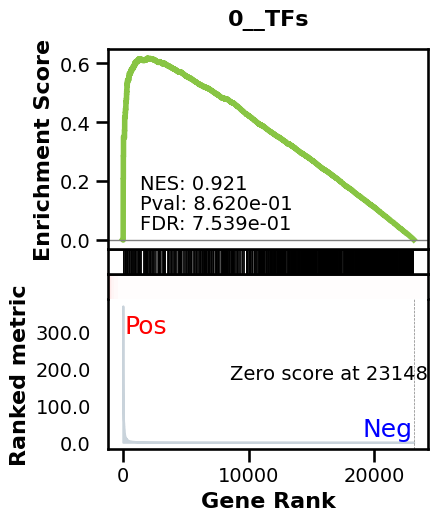

_________________________________________
TF specific enrichment


found some significant results for  65.17857142857143 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:29,  4.37it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.37it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.36it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.36it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.36it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.36it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.36it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.35it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.36it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.36it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.36it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.36it/s]


 10%|█         | 13/128 [00:02<00:26,  4.36it/s]


 11%|█         | 14/128 [00:03<00:26,  4.36it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.36it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.36it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.36it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.36it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.36it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.36it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.36it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.36it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.36it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.36it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.35it/s]


 20%|██        | 26/128 [00:05<00:23,  4.35it/s]


 21%|██        | 27/128 [00:06<00:23,  4.35it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.35it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.34it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.34it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.35it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.35it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.35it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.35it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.36it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.35it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.36it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.35it/s]


 30%|███       | 39/128 [00:08<00:20,  4.35it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.35it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.36it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.36it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.36it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.36it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.36it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.36it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.36it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.36it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.36it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.36it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.36it/s]


 41%|████      | 52/128 [00:11<00:17,  4.36it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.36it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.35it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.36it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.36it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.36it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.36it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.36it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.36it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.36it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.36it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.36it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.36it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.36it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.36it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.36it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.36it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.36it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.35it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.36it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.36it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.36it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.36it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.36it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.36it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.36it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.36it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.36it/s]


 62%|██████▎   | 80/128 [00:18<00:11,  4.36it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.36it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.36it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.36it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.36it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.36it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.35it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.35it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.34it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.34it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.34it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.34it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.35it/s]


 73%|███████▎  | 93/128 [00:21<00:08,  4.35it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.36it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.36it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.36it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.36it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.35it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.35it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.35it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.35it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.35it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.35it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.35it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.35it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.35it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.35it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.35it/s]


 85%|████████▌ | 109/128 [00:25<00:04,  4.35it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.35it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.35it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.35it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.35it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.35it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.35it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.35it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.36it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.35it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.35it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.35it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.36it/s]


 95%|█████████▌| 122/128 [00:28<00:01,  4.35it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.36it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.36it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.36it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.36it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.36it/s]


100%|██████████| 128/128 [00:29<00:00,  4.35it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001028149729019675


EPR: 1.818835128617717


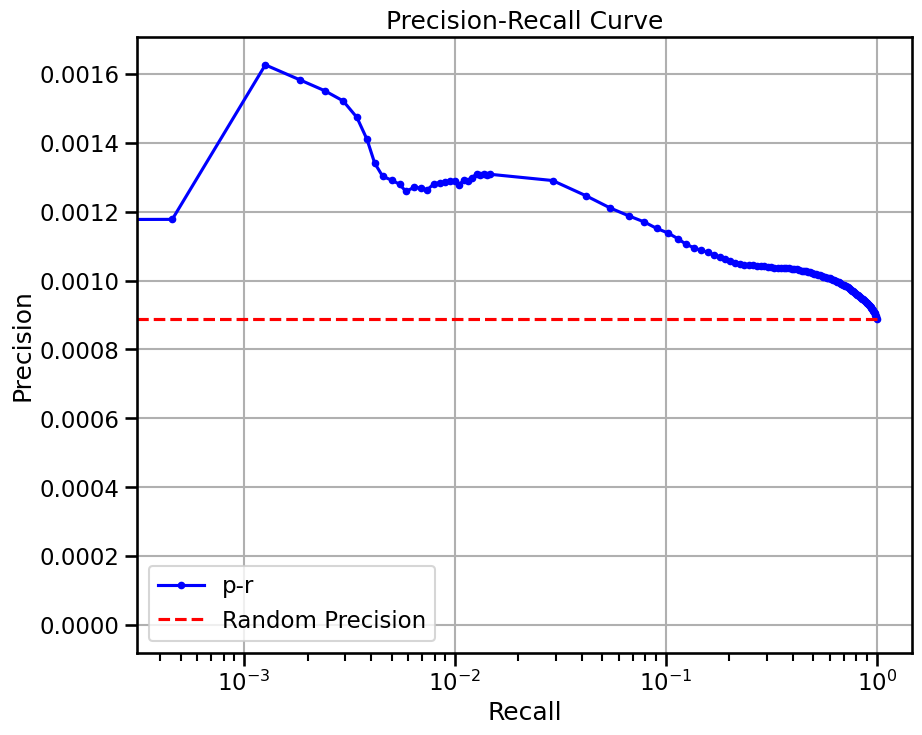

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


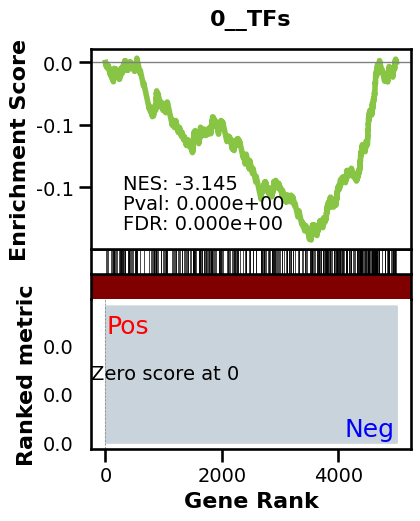

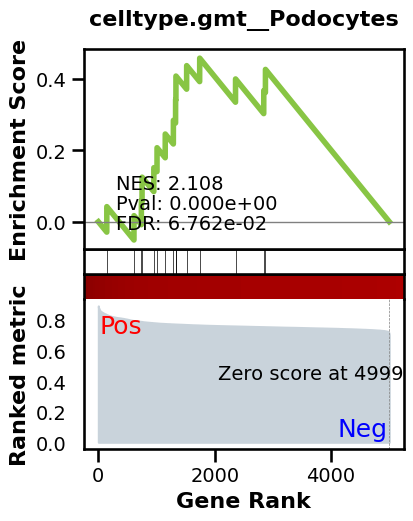

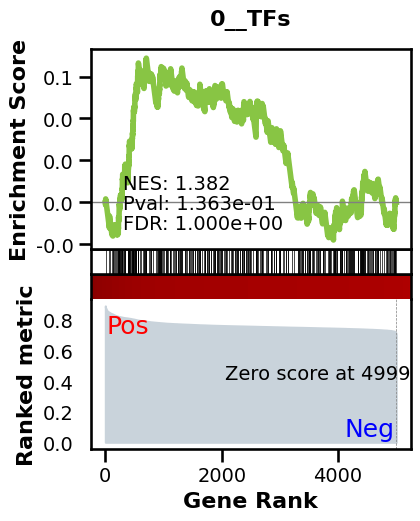

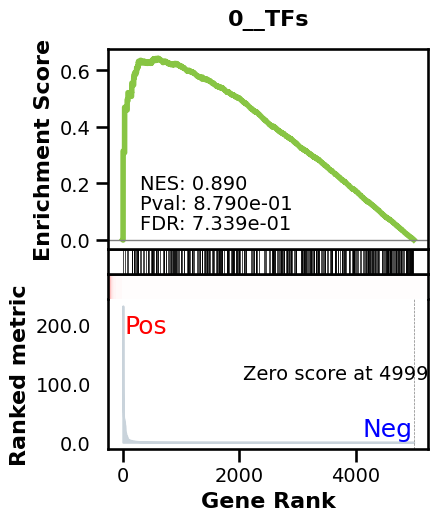

_________________________________________
TF specific enrichment


found some significant results for  22.916666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.37it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.31it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.27it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.34it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.34it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.31it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.31it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.28it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.36it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.32it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.27it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.29it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.27it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.30it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.33it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.32it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.29it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.26it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.24it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.19it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.25it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.25it/s]

Area Under Precision-Recall Curve (AUPRC):  0.00152182807740365


EPR: 1.1764091504742658


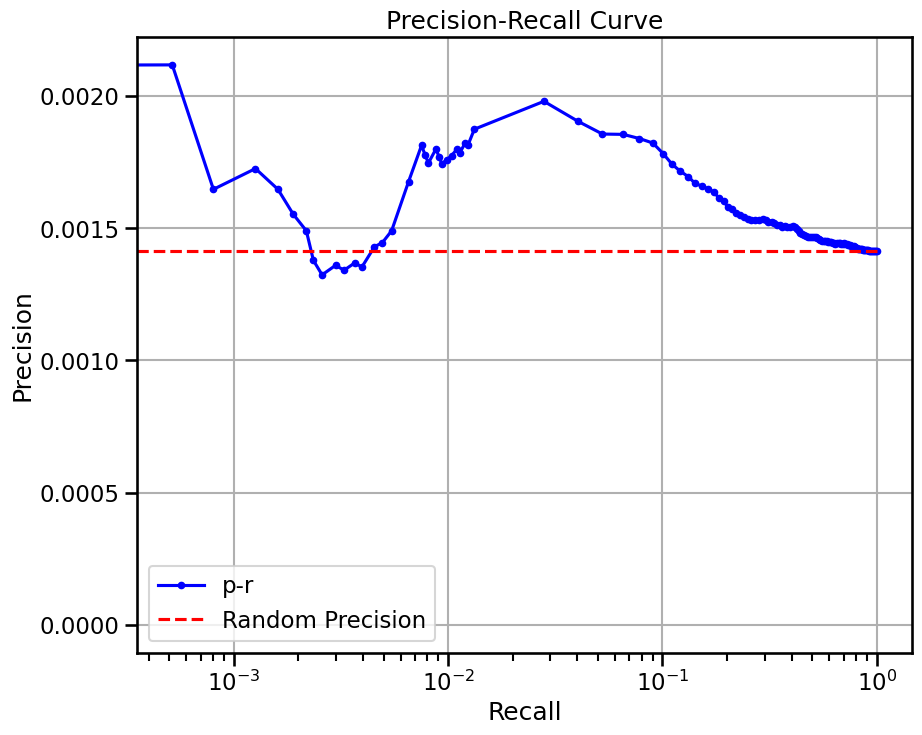

scprint_benchmark2
base enrichment


Top central genes: []


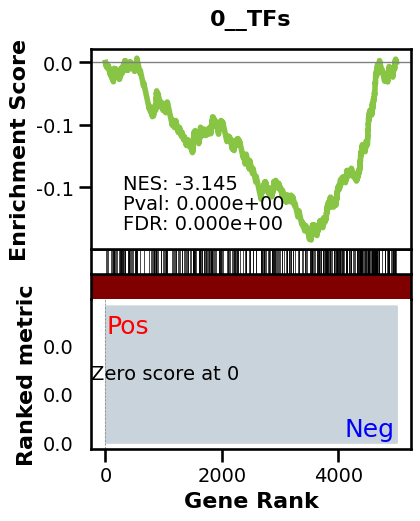

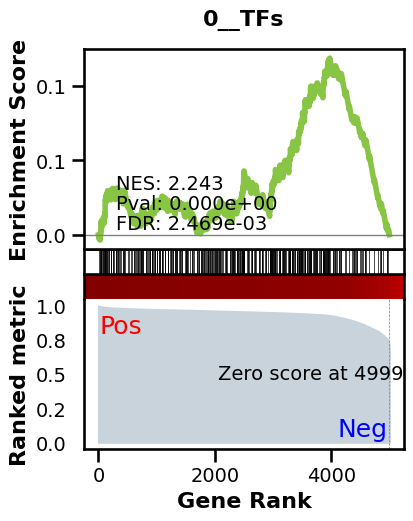

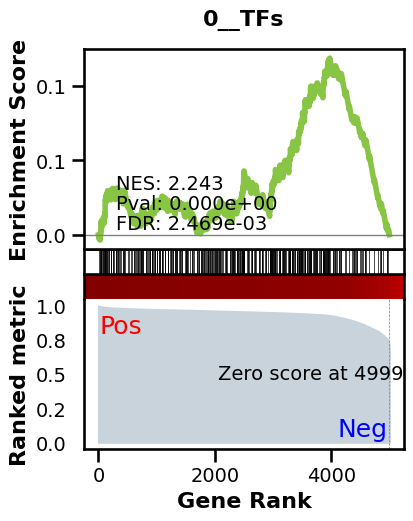

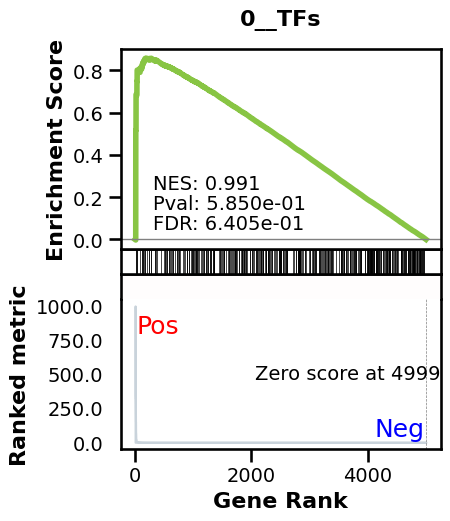

_________________________________________
TF specific enrichment


found some significant results for  6.25 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3511 genes
intersection pct: 0.7022
precision:  0.0014142799441978382 
recall:  1.0 
random precision: 0.001414682872956869



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 51.28it/s]


  9%|▉         | 12/128 [00:00<00:02, 51.37it/s]


 14%|█▍        | 18/128 [00:00<00:02, 51.39it/s]


 19%|█▉        | 24/128 [00:00<00:02, 51.18it/s]


 23%|██▎       | 30/128 [00:00<00:01, 51.27it/s]


 28%|██▊       | 36/128 [00:00<00:01, 51.39it/s]


 33%|███▎      | 42/128 [00:00<00:01, 51.43it/s]


 38%|███▊      | 48/128 [00:00<00:01, 51.35it/s]


 42%|████▏     | 54/128 [00:01<00:01, 51.39it/s]


 47%|████▋     | 60/128 [00:01<00:01, 51.41it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 51.46it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 51.37it/s]


 61%|██████    | 78/128 [00:01<00:00, 51.37it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 51.36it/s]


 70%|███████   | 90/128 [00:01<00:00, 51.41it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 51.37it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 51.38it/s]


 84%|████████▍ | 108/128 [00:02<00:00, 51.36it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 51.38it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 51.29it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 51.30it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 51.32it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001630526837355517


EPR: 1.4207842412168388


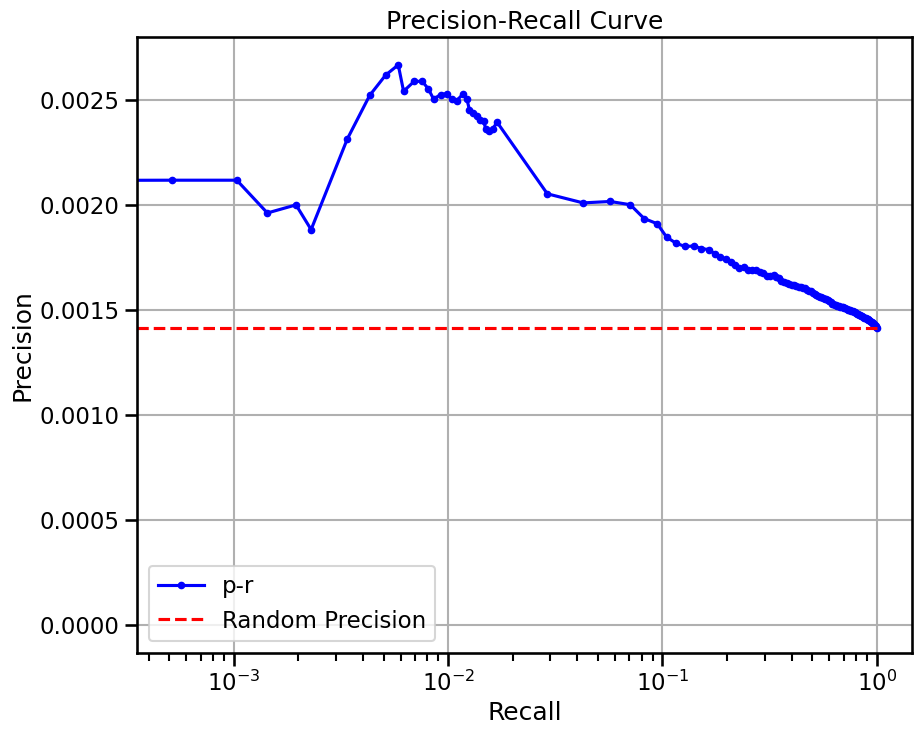

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 488807881, sparsity: 1.0


base enrichment


too many genes for central computation


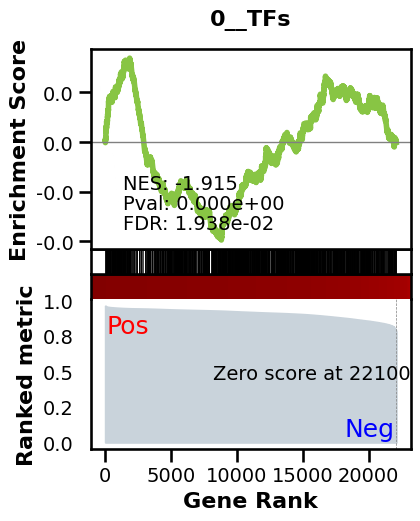

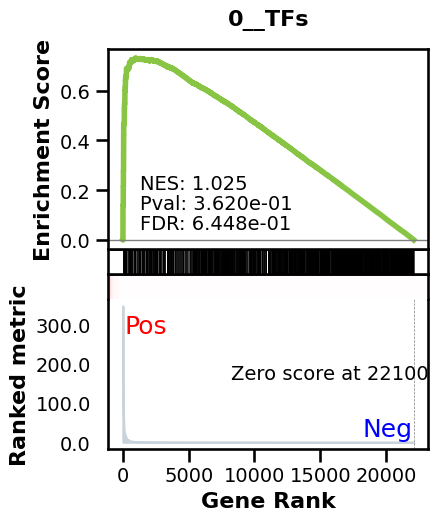

_________________________________________
TF specific enrichment


found some significant results for  58.55855855855856 % TFs

_________________________________________
loading GT,  omnipath


intersection of 11990 genes
intersection pct: 0.5425093887154427


precision:  0.0009095639193350589 
recall:  1.0 
random precision: 0.0009096397858726629



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:31,  3.99it/s]


  2%|▏         | 2/128 [00:00<00:29,  4.23it/s]


  2%|▏         | 3/128 [00:00<00:29,  4.30it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.34it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.37it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.38it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.40it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.40it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.40it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.41it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.40it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.41it/s]


 10%|█         | 13/128 [00:02<00:26,  4.41it/s]


 11%|█         | 14/128 [00:03<00:25,  4.42it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.42it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.42it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.42it/s]


 14%|█▍        | 18/128 [00:04<00:24,  4.43it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.42it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.43it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.42it/s]


 17%|█▋        | 22/128 [00:05<00:23,  4.42it/s]


 18%|█▊        | 23/128 [00:05<00:23,  4.42it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.43it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.42it/s]


 20%|██        | 26/128 [00:05<00:23,  4.41it/s]


 21%|██        | 27/128 [00:06<00:22,  4.42it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.42it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.43it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.42it/s]


 24%|██▍       | 31/128 [00:07<00:21,  4.41it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.42it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.41it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.41it/s]


 27%|██▋       | 35/128 [00:07<00:21,  4.40it/s]


 28%|██▊       | 36/128 [00:08<00:20,  4.41it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.41it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.40it/s]


 30%|███       | 39/128 [00:08<00:20,  4.40it/s]


 31%|███▏      | 40/128 [00:09<00:19,  4.41it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.41it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.42it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.41it/s]


 34%|███▍      | 44/128 [00:09<00:19,  4.41it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.41it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.42it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.41it/s]


 38%|███▊      | 48/128 [00:10<00:18,  4.42it/s]


 38%|███▊      | 49/128 [00:11<00:17,  4.41it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.42it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.42it/s]


 41%|████      | 52/128 [00:11<00:17,  4.42it/s]


 41%|████▏     | 53/128 [00:12<00:16,  4.42it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.42it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.42it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.42it/s]


 45%|████▍     | 57/128 [00:12<00:16,  4.41it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.41it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.42it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.42it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.27it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.31it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.35it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.36it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.39it/s]


 52%|█████▏    | 66/128 [00:14<00:14,  4.40it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.41it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.42it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.42it/s]


 55%|█████▍    | 70/128 [00:15<00:13,  4.41it/s]


 55%|█████▌    | 71/128 [00:16<00:12,  4.42it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.42it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.42it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.43it/s]


 59%|█████▊    | 75/128 [00:17<00:11,  4.42it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.41it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.41it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.40it/s]


 62%|██████▏   | 79/128 [00:17<00:11,  4.41it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.41it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.42it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.41it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.41it/s]


 66%|██████▌   | 84/128 [00:19<00:09,  4.42it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.42it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.43it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.42it/s]


 69%|██████▉   | 88/128 [00:19<00:09,  4.43it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.43it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.42it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.43it/s]


 72%|███████▏  | 92/128 [00:20<00:08,  4.42it/s]


 73%|███████▎  | 93/128 [00:21<00:07,  4.43it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.43it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.43it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.43it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.43it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.42it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.42it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.42it/s]


 79%|███████▉  | 101/128 [00:22<00:06,  4.42it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.42it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.41it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.41it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.42it/s]


 83%|████████▎ | 106/128 [00:24<00:04,  4.41it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.41it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.42it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.42it/s]


 86%|████████▌ | 110/128 [00:24<00:04,  4.43it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.42it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.42it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.41it/s]


 89%|████████▉ | 114/128 [00:25<00:03,  4.40it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.41it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.41it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.42it/s]


 92%|█████████▏| 118/128 [00:26<00:02,  4.42it/s]


 93%|█████████▎| 119/128 [00:26<00:02,  4.43it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.42it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.43it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.41it/s]


 96%|█████████▌| 123/128 [00:27<00:01,  4.41it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.42it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.42it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.27it/s]


 99%|█████████▉| 127/128 [00:28<00:00,  4.32it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.34it/s]


100%|██████████| 128/128 [00:29<00:00,  4.41it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010504634485890415


EPR: 1.5316159716308944


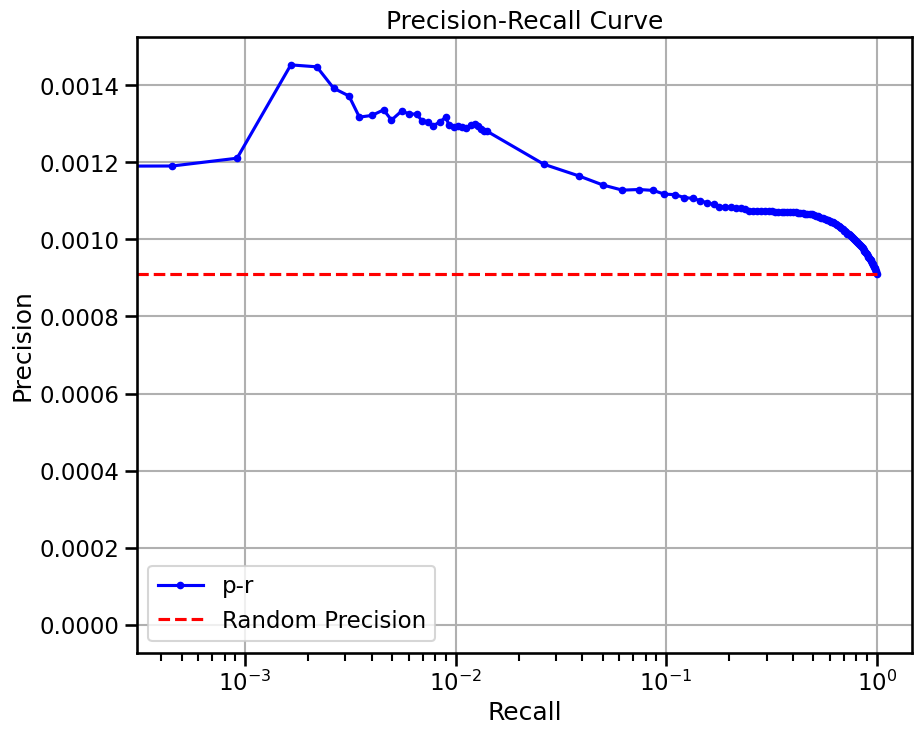

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


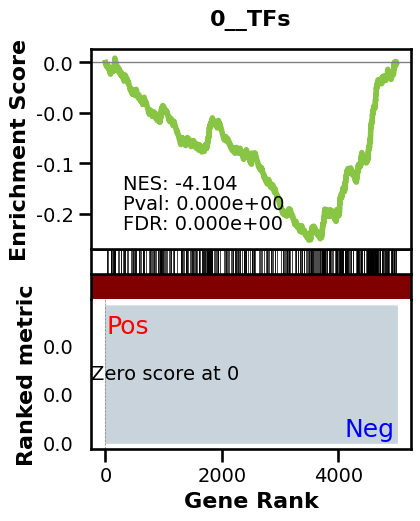

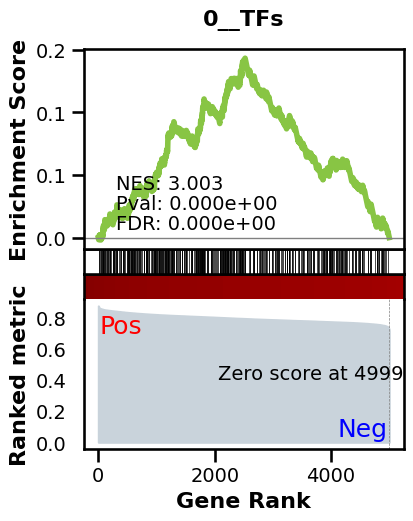

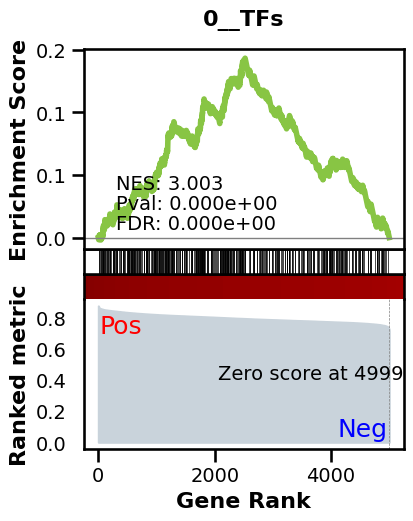

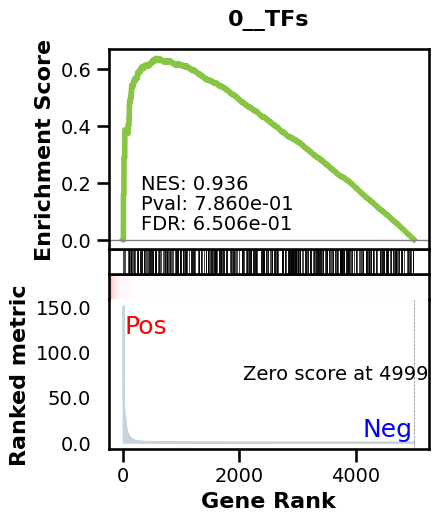

_________________________________________
TF specific enrichment


found some significant results for  28.571428571428573 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 52.86it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.09it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.47it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.67it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.85it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.88it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.98it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.99it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.99it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.87it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.91it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.98it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.96it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.98it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.97it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.93it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.95it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.69it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.78it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.86it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.91it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.81it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0015010808477868317


EPR: 0.7007539009125866


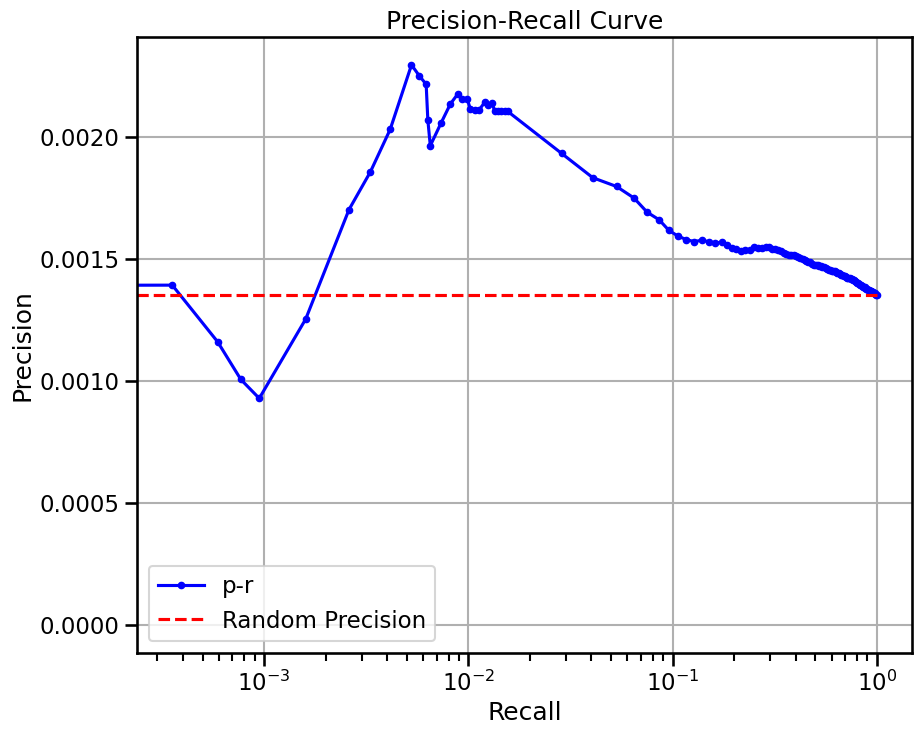

scprint_benchmark2
base enrichment


Top central genes: []


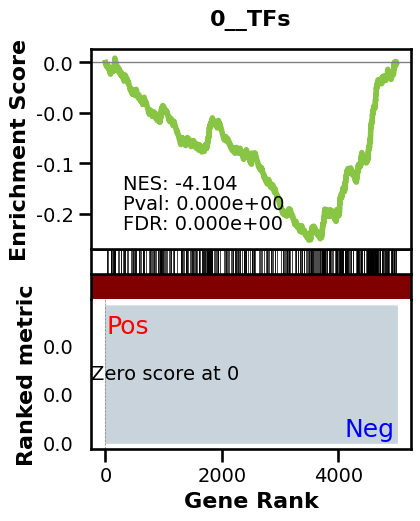

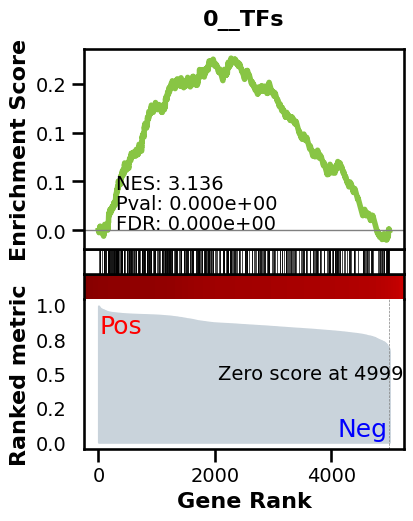

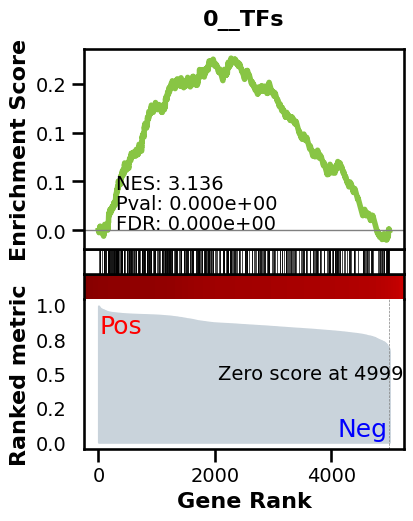

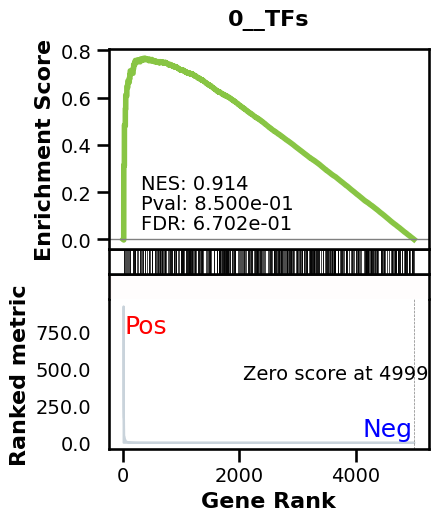

_________________________________________
TF specific enrichment


found some significant results for  9.523809523809524 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3536 genes
intersection pct: 0.7072
precision:  0.0013506038727708277 
recall:  1.0 
random precision: 0.0013509859389300276



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▍         | 6/128 [00:00<00:02, 54.63it/s]


  9%|▉         | 12/128 [00:00<00:02, 54.59it/s]


 14%|█▍        | 18/128 [00:00<00:02, 54.58it/s]


 19%|█▉        | 24/128 [00:00<00:01, 54.60it/s]


 23%|██▎       | 30/128 [00:00<00:01, 54.60it/s]


 28%|██▊       | 36/128 [00:00<00:01, 54.54it/s]


 33%|███▎      | 42/128 [00:00<00:01, 54.54it/s]


 38%|███▊      | 48/128 [00:00<00:01, 54.47it/s]


 42%|████▏     | 54/128 [00:00<00:01, 54.47it/s]


 47%|████▋     | 60/128 [00:01<00:01, 54.48it/s]


 52%|█████▏    | 66/128 [00:01<00:01, 54.52it/s]


 56%|█████▋    | 72/128 [00:01<00:01, 54.50it/s]


 61%|██████    | 78/128 [00:01<00:00, 54.46it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 54.45it/s]


 70%|███████   | 90/128 [00:01<00:00, 54.43it/s]


 75%|███████▌  | 96/128 [00:01<00:00, 54.42it/s]


 80%|███████▉  | 102/128 [00:01<00:00, 54.46it/s]


 84%|████████▍ | 108/128 [00:01<00:00, 54.49it/s]


 89%|████████▉ | 114/128 [00:02<00:00, 54.53it/s]


 94%|█████████▍| 120/128 [00:02<00:00, 54.53it/s]


 98%|█████████▊| 126/128 [00:02<00:00, 54.49it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:02<00:00, 54.48it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001670473596330315
EPR: 2.198715091261281


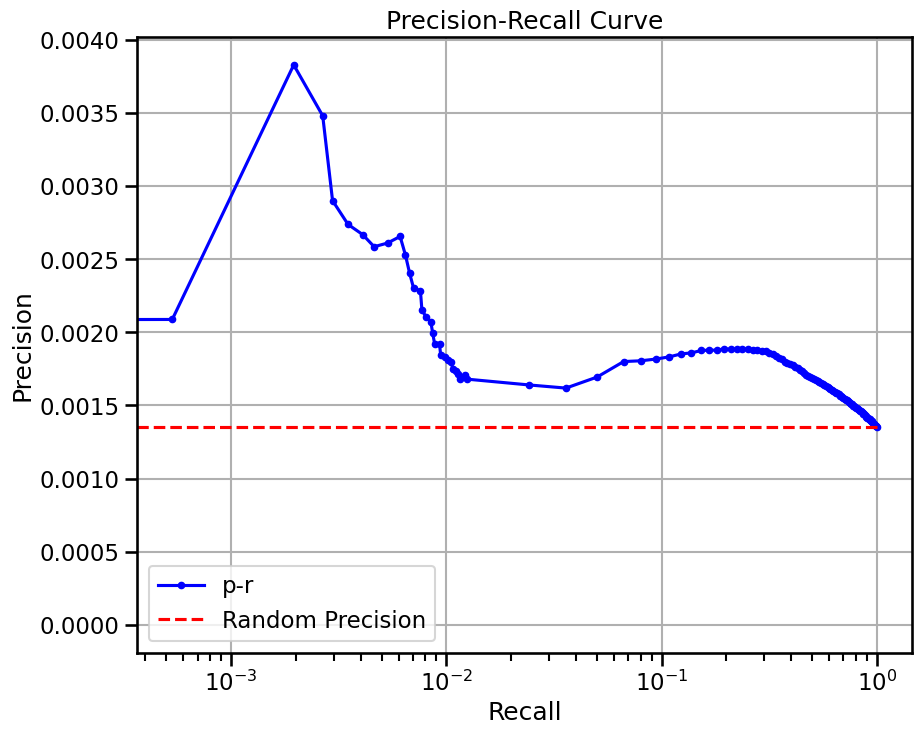

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


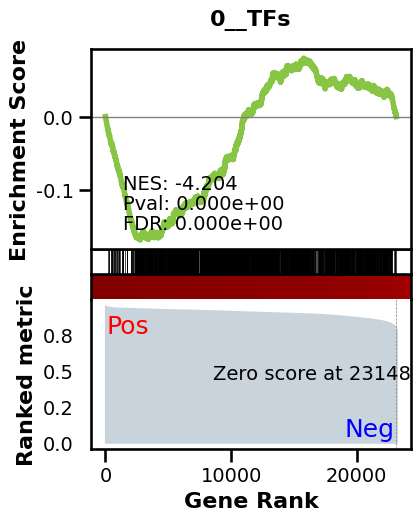

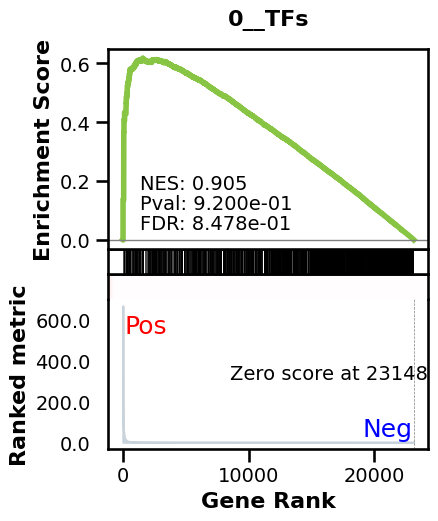

_________________________________________
TF specific enrichment


found some significant results for  66.96428571428571 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.41it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.39it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.38it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.28it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.32it/s]


  5%|▍         | 6/128 [00:01<00:28,  4.33it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.34it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.34it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.34it/s]


  8%|▊         | 10/128 [00:02<00:27,  4.35it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.35it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.36it/s]


 10%|█         | 13/128 [00:02<00:26,  4.36it/s]


 11%|█         | 14/128 [00:03<00:26,  4.36it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.36it/s]


 12%|█▎        | 16/128 [00:03<00:27,  4.06it/s]


 13%|█▎        | 17/128 [00:03<00:26,  4.15it/s]


 14%|█▍        | 18/128 [00:04<00:26,  4.21it/s]


 15%|█▍        | 19/128 [00:04<00:25,  4.25it/s]


 16%|█▌        | 20/128 [00:04<00:25,  4.28it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.30it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.32it/s]


 18%|█▊        | 23/128 [00:05<00:24,  4.33it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.34it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.34it/s]


 20%|██        | 26/128 [00:06<00:23,  4.35it/s]


 21%|██        | 27/128 [00:06<00:23,  4.35it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.36it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.36it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.36it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.36it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.36it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.36it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.36it/s]


 27%|██▋       | 35/128 [00:08<00:21,  4.37it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.37it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.37it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.37it/s]


 30%|███       | 39/128 [00:09<00:20,  4.37it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.37it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.37it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.38it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.38it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.38it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.38it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.38it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.38it/s]


 38%|███▊      | 48/128 [00:11<00:18,  4.38it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.38it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.37it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.38it/s]


 41%|████      | 52/128 [00:11<00:17,  4.38it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.38it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.38it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.38it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.38it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.38it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.38it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.38it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.38it/s]


 48%|████▊     | 61/128 [00:14<00:15,  4.38it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.38it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.38it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.37it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.37it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.37it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.37it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.37it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.37it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.38it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.38it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.38it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.38it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.38it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.38it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.38it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.38it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.37it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.37it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.37it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.37it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.37it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.38it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.38it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.38it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.38it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.38it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.38it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.37it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.37it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.37it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.38it/s]


 73%|███████▎  | 93/128 [00:21<00:07,  4.38it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.38it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.38it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.38it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.38it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.38it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.38it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.38it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.38it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.38it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.38it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.38it/s]


 82%|████████▏ | 105/128 [00:24<00:05,  4.38it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.38it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.38it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.38it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.38it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.38it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.38it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.38it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.38it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.38it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.38it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.37it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.37it/s]


 92%|█████████▏| 118/128 [00:27<00:02,  4.38it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.37it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.38it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.37it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.37it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.37it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.37it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.37it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.37it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.37it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.38it/s]


100%|██████████| 128/128 [00:29<00:00,  4.36it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010514346326797577


EPR: 2.2282633477713802


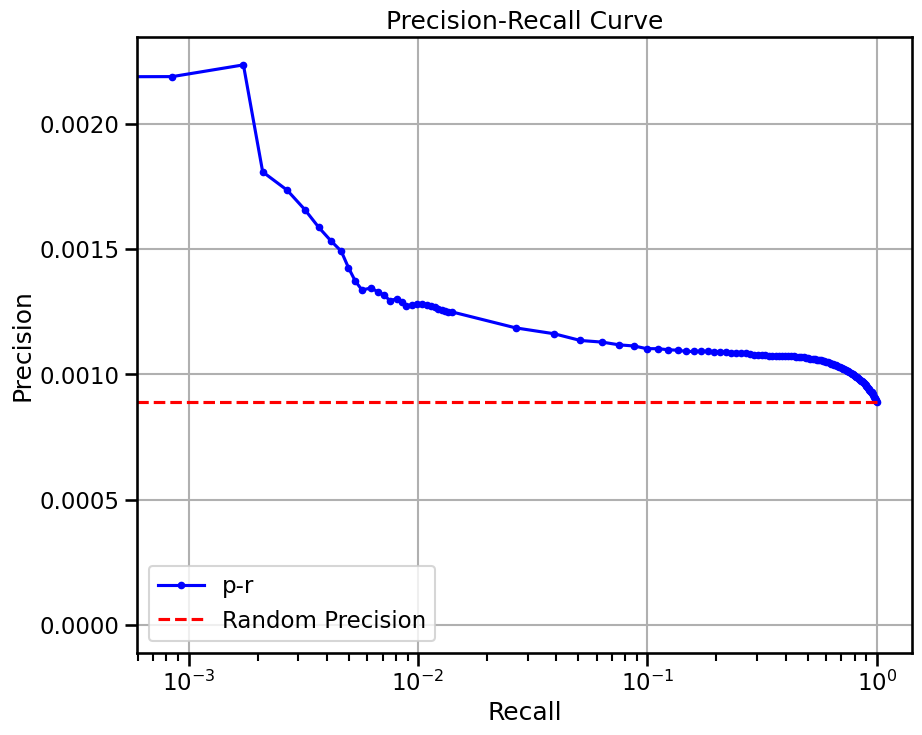

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


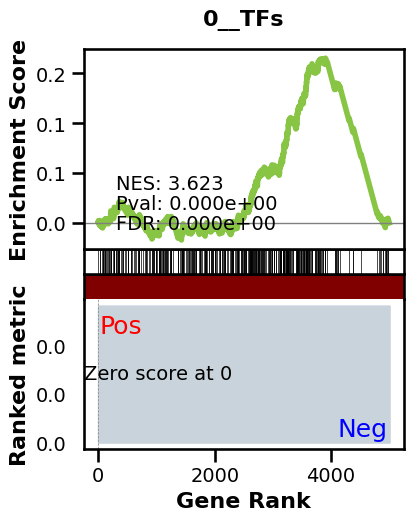

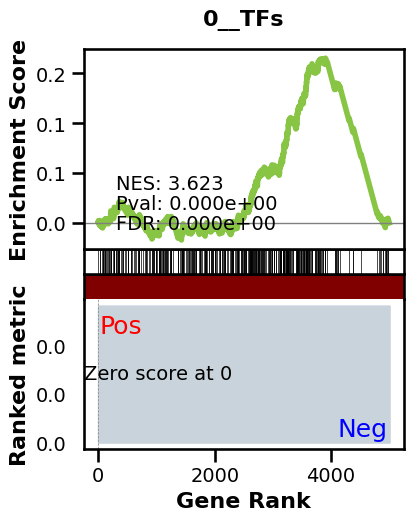

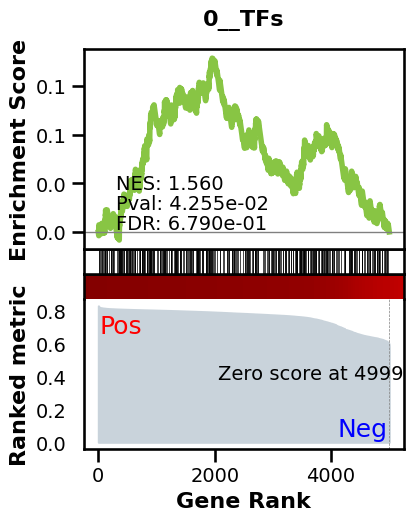

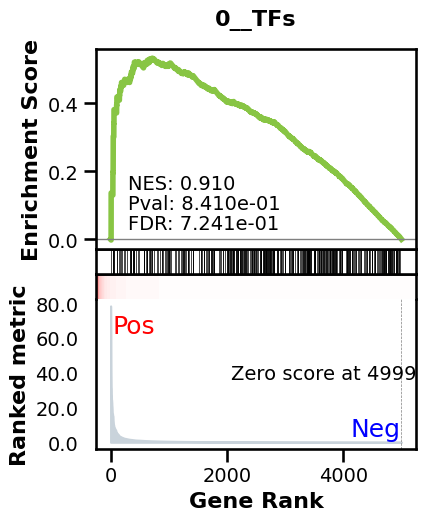

_________________________________________
TF specific enrichment


found some significant results for  45.833333333333336 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 92.16it/s]


 16%|█▌        | 20/128 [00:00<00:01, 92.34it/s]


 23%|██▎       | 30/128 [00:00<00:01, 92.26it/s]


 31%|███▏      | 40/128 [00:00<00:00, 92.26it/s]


 39%|███▉      | 50/128 [00:00<00:00, 92.28it/s]


 47%|████▋     | 60/128 [00:00<00:00, 92.29it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 92.30it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 92.32it/s]


 70%|███████   | 90/128 [00:00<00:00, 92.31it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 92.30it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 92.26it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 92.28it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 92.25it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0016117640288171066
EPR: 1.2380216095418752


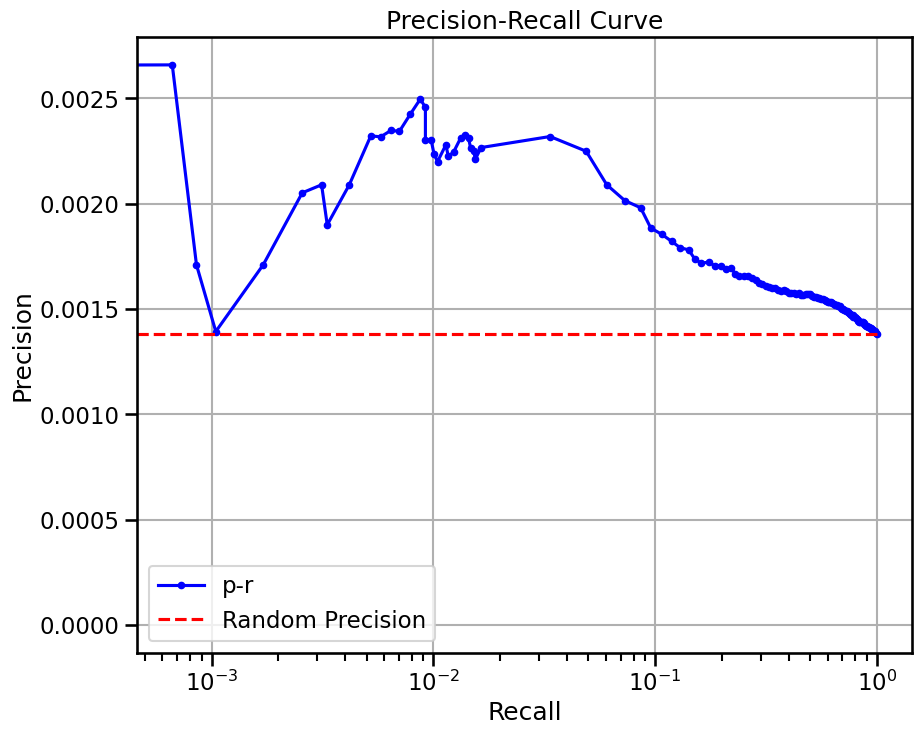

scprint_benchmark2
base enrichment


Top central genes: []


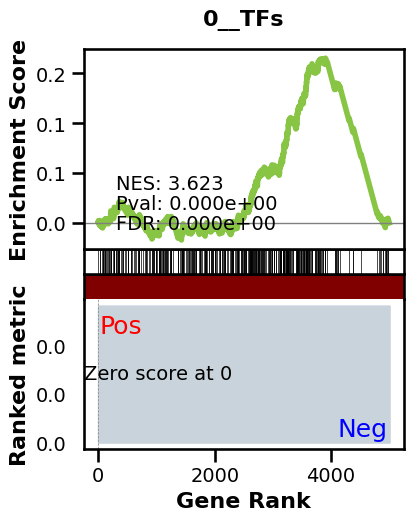

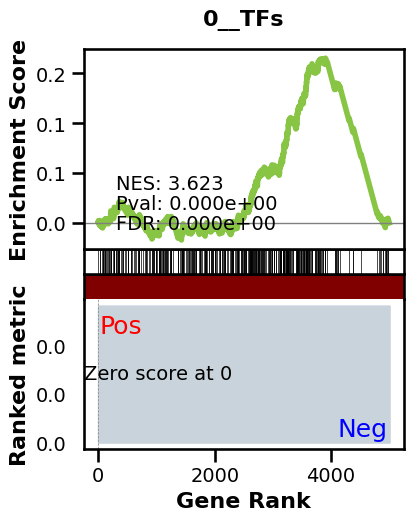

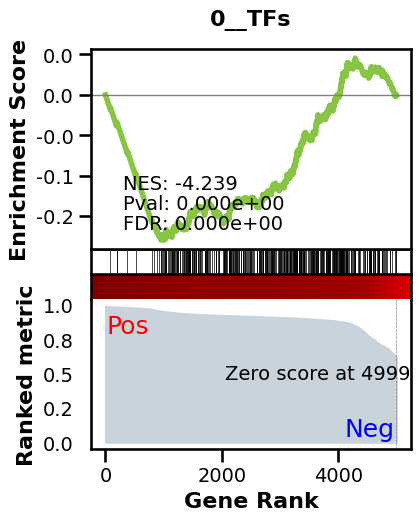

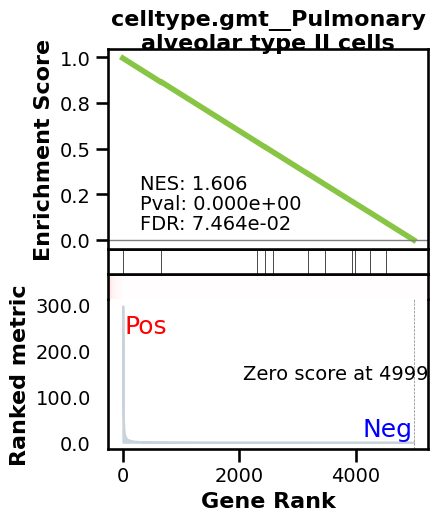

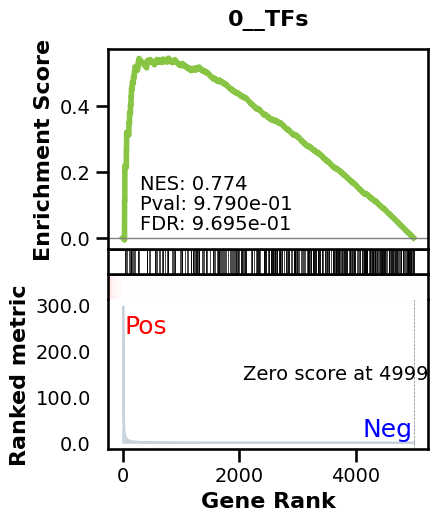

_________________________________________
TF specific enrichment


found some significant results for  20.833333333333332 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2763 genes
intersection pct: 0.5526
precision:  0.0013802419097612326 
recall:  1.0 
random precision: 0.0013807416352897488



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 91.34it/s]


 16%|█▌        | 20/128 [00:00<00:01, 91.33it/s]


 23%|██▎       | 30/128 [00:00<00:01, 91.39it/s]


 31%|███▏      | 40/128 [00:00<00:00, 91.33it/s]


 39%|███▉      | 50/128 [00:00<00:00, 91.28it/s]


 47%|████▋     | 60/128 [00:00<00:00, 91.29it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 91.26it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 91.27it/s]


 70%|███████   | 90/128 [00:00<00:00, 91.30it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 91.35it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 91.37it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 91.34it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 91.29it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0014471201929469085
EPR: 2.345620397318688


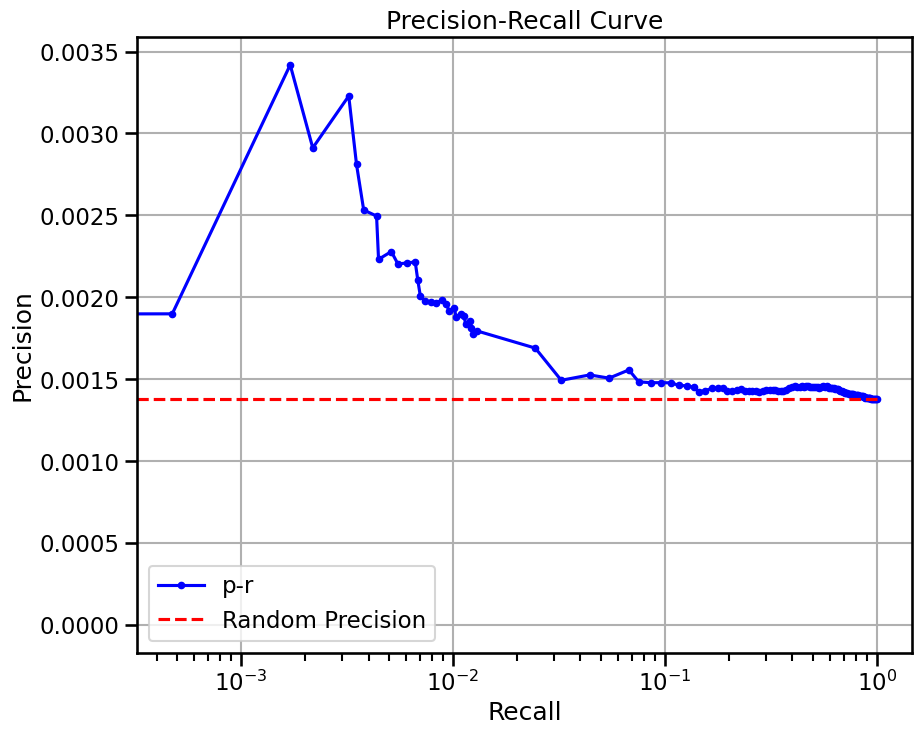

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


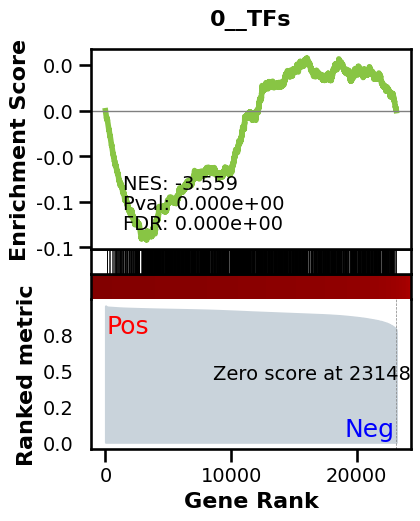

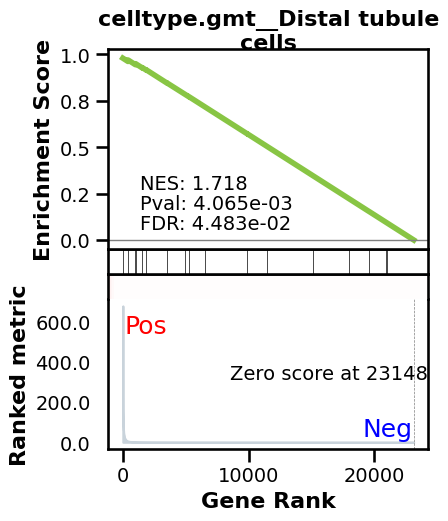

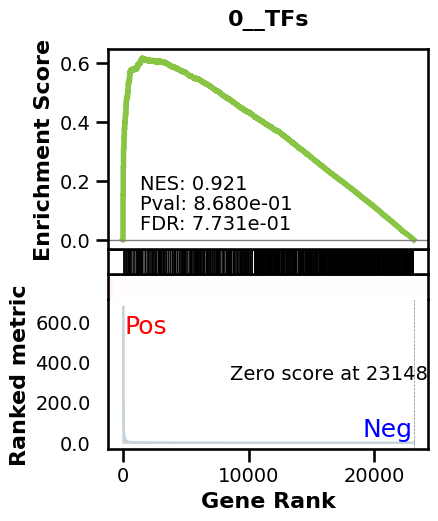

_________________________________________
TF specific enrichment


found some significant results for  64.28571428571429 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:33,  3.83it/s]


  2%|▏         | 2/128 [00:00<00:31,  4.03it/s]


  2%|▏         | 3/128 [00:00<00:30,  4.07it/s]


  3%|▎         | 4/128 [00:00<00:30,  4.12it/s]


  4%|▍         | 5/128 [00:01<00:29,  4.14it/s]


  5%|▍         | 6/128 [00:01<00:29,  4.15it/s]


  5%|▌         | 7/128 [00:01<00:29,  4.17it/s]


  6%|▋         | 8/128 [00:01<00:28,  4.16it/s]


  7%|▋         | 9/128 [00:02<00:28,  4.17it/s]


  8%|▊         | 10/128 [00:02<00:28,  4.17it/s]


  9%|▊         | 11/128 [00:02<00:27,  4.18it/s]


  9%|▉         | 12/128 [00:02<00:27,  4.18it/s]


 10%|█         | 13/128 [00:03<00:27,  4.18it/s]


 11%|█         | 14/128 [00:03<00:27,  4.19it/s]


 12%|█▏        | 15/128 [00:03<00:27,  4.18it/s]


 12%|█▎        | 16/128 [00:03<00:26,  4.19it/s]


 13%|█▎        | 17/128 [00:04<00:26,  4.19it/s]


 14%|█▍        | 18/128 [00:04<00:26,  4.18it/s]


 15%|█▍        | 19/128 [00:04<00:26,  4.18it/s]


 16%|█▌        | 20/128 [00:04<00:25,  4.19it/s]


 16%|█▋        | 21/128 [00:05<00:25,  4.18it/s]


 17%|█▋        | 22/128 [00:05<00:25,  4.18it/s]


 18%|█▊        | 23/128 [00:05<00:25,  4.18it/s]


 19%|█▉        | 24/128 [00:05<00:24,  4.18it/s]


 20%|█▉        | 25/128 [00:06<00:24,  4.18it/s]


 20%|██        | 26/128 [00:06<00:24,  4.18it/s]


 21%|██        | 27/128 [00:06<00:24,  4.18it/s]


 22%|██▏       | 28/128 [00:06<00:23,  4.18it/s]


 23%|██▎       | 29/128 [00:06<00:23,  4.18it/s]


 23%|██▎       | 30/128 [00:07<00:23,  4.18it/s]


 24%|██▍       | 31/128 [00:07<00:23,  4.18it/s]


 25%|██▌       | 32/128 [00:07<00:22,  4.18it/s]


 26%|██▌       | 33/128 [00:07<00:22,  4.19it/s]


 27%|██▋       | 34/128 [00:08<00:22,  4.19it/s]


 27%|██▋       | 35/128 [00:08<00:22,  4.18it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.18it/s]


 29%|██▉       | 37/128 [00:08<00:21,  4.18it/s]


 30%|██▉       | 38/128 [00:09<00:21,  4.18it/s]


 30%|███       | 39/128 [00:09<00:21,  4.18it/s]


 31%|███▏      | 40/128 [00:09<00:21,  4.18it/s]


 32%|███▏      | 41/128 [00:09<00:20,  4.18it/s]


 33%|███▎      | 42/128 [00:10<00:20,  4.18it/s]


 34%|███▎      | 43/128 [00:10<00:20,  4.19it/s]


 34%|███▍      | 44/128 [00:10<00:20,  4.18it/s]


 35%|███▌      | 45/128 [00:10<00:19,  4.18it/s]


 36%|███▌      | 46/128 [00:11<00:19,  4.18it/s]


 37%|███▋      | 47/128 [00:11<00:19,  4.19it/s]


 38%|███▊      | 48/128 [00:11<00:19,  4.19it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.18it/s]


 39%|███▉      | 50/128 [00:11<00:18,  4.19it/s]


 40%|███▉      | 51/128 [00:12<00:18,  4.19it/s]


 41%|████      | 52/128 [00:12<00:18,  4.19it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.19it/s]


 42%|████▏     | 54/128 [00:12<00:17,  4.19it/s]


 43%|████▎     | 55/128 [00:13<00:17,  4.18it/s]


 44%|████▍     | 56/128 [00:13<00:17,  4.19it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.19it/s]


 45%|████▌     | 58/128 [00:13<00:16,  4.18it/s]


 46%|████▌     | 59/128 [00:14<00:16,  4.18it/s]


 47%|████▋     | 60/128 [00:14<00:16,  4.18it/s]


 48%|████▊     | 61/128 [00:14<00:16,  4.18it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.18it/s]


 49%|████▉     | 63/128 [00:15<00:15,  4.19it/s]


 50%|█████     | 64/128 [00:15<00:15,  4.18it/s]


 51%|█████     | 65/128 [00:15<00:15,  4.18it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.18it/s]


 52%|█████▏    | 67/128 [00:16<00:14,  4.19it/s]


 53%|█████▎    | 68/128 [00:16<00:14,  4.18it/s]


 54%|█████▍    | 69/128 [00:16<00:14,  4.18it/s]


 55%|█████▍    | 70/128 [00:16<00:13,  4.18it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.18it/s]


 56%|█████▋    | 72/128 [00:17<00:13,  4.18it/s]


 57%|█████▋    | 73/128 [00:17<00:13,  4.18it/s]


 58%|█████▊    | 74/128 [00:17<00:12,  4.18it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.18it/s]


 59%|█████▉    | 76/128 [00:18<00:12,  4.18it/s]


 60%|██████    | 77/128 [00:18<00:12,  4.18it/s]


 61%|██████    | 78/128 [00:18<00:11,  4.19it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.19it/s]


 62%|██████▎   | 80/128 [00:19<00:11,  4.18it/s]


 63%|██████▎   | 81/128 [00:19<00:11,  4.18it/s]


 64%|██████▍   | 82/128 [00:19<00:10,  4.18it/s]


 65%|██████▍   | 83/128 [00:19<00:10,  4.18it/s]


 66%|██████▌   | 84/128 [00:20<00:10,  4.18it/s]


 66%|██████▋   | 85/128 [00:20<00:10,  4.18it/s]


 67%|██████▋   | 86/128 [00:20<00:10,  4.18it/s]


 68%|██████▊   | 87/128 [00:20<00:09,  4.18it/s]


 69%|██████▉   | 88/128 [00:21<00:09,  4.19it/s]


 70%|██████▉   | 89/128 [00:21<00:09,  4.20it/s]


 70%|███████   | 90/128 [00:21<00:09,  4.20it/s]


 71%|███████   | 91/128 [00:21<00:08,  4.21it/s]


 72%|███████▏  | 92/128 [00:22<00:08,  4.21it/s]


 73%|███████▎  | 93/128 [00:22<00:08,  4.21it/s]


 73%|███████▎  | 94/128 [00:22<00:08,  4.21it/s]


 74%|███████▍  | 95/128 [00:22<00:07,  4.21it/s]


 75%|███████▌  | 96/128 [00:22<00:07,  4.21it/s]


 76%|███████▌  | 97/128 [00:23<00:07,  4.21it/s]


 77%|███████▋  | 98/128 [00:23<00:07,  4.21it/s]


 77%|███████▋  | 99/128 [00:23<00:06,  4.21it/s]


 78%|███████▊  | 100/128 [00:23<00:06,  4.21it/s]


 79%|███████▉  | 101/128 [00:24<00:06,  4.21it/s]


 80%|███████▉  | 102/128 [00:24<00:06,  4.21it/s]


 80%|████████  | 103/128 [00:24<00:05,  4.21it/s]


 81%|████████▏ | 104/128 [00:24<00:05,  4.21it/s]


 82%|████████▏ | 105/128 [00:25<00:05,  4.21it/s]


 83%|████████▎ | 106/128 [00:25<00:05,  4.21it/s]


 84%|████████▎ | 107/128 [00:25<00:04,  4.21it/s]


 84%|████████▍ | 108/128 [00:25<00:04,  4.21it/s]


 85%|████████▌ | 109/128 [00:26<00:04,  4.22it/s]


 86%|████████▌ | 110/128 [00:26<00:04,  4.21it/s]


 87%|████████▋ | 111/128 [00:26<00:04,  4.21it/s]


 88%|████████▊ | 112/128 [00:26<00:03,  4.21it/s]


 88%|████████▊ | 113/128 [00:26<00:03,  4.21it/s]


 89%|████████▉ | 114/128 [00:27<00:03,  4.21it/s]


 90%|████████▉ | 115/128 [00:27<00:03,  4.21it/s]


 91%|█████████ | 116/128 [00:27<00:02,  4.21it/s]


 91%|█████████▏| 117/128 [00:27<00:02,  4.21it/s]


 92%|█████████▏| 118/128 [00:28<00:02,  4.21it/s]


 93%|█████████▎| 119/128 [00:28<00:02,  4.21it/s]


 94%|█████████▍| 120/128 [00:28<00:01,  4.21it/s]


 95%|█████████▍| 121/128 [00:28<00:01,  4.21it/s]


 95%|█████████▌| 122/128 [00:29<00:01,  4.21it/s]


 96%|█████████▌| 123/128 [00:29<00:01,  4.21it/s]


 97%|█████████▋| 124/128 [00:29<00:00,  4.21it/s]


 98%|█████████▊| 125/128 [00:29<00:00,  4.21it/s]


 98%|█████████▊| 126/128 [00:30<00:00,  4.21it/s]


 99%|█████████▉| 127/128 [00:30<00:00,  4.22it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:30<00:00,  4.21it/s]


100%|██████████| 128/128 [00:30<00:00,  4.19it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010777211637363654


EPR: 2.0398525723044805


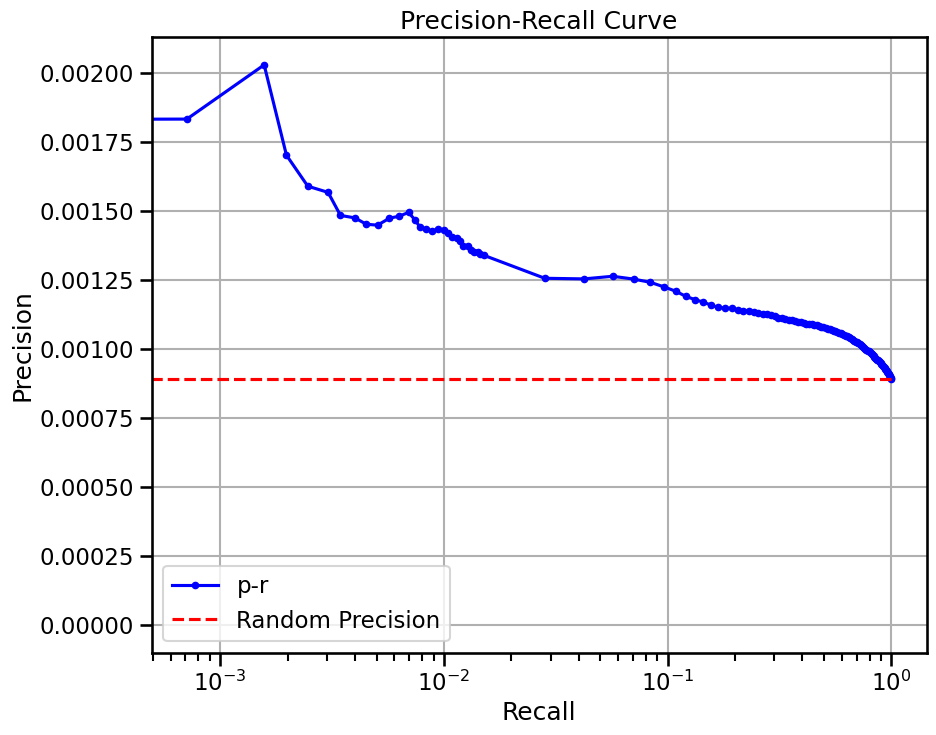

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


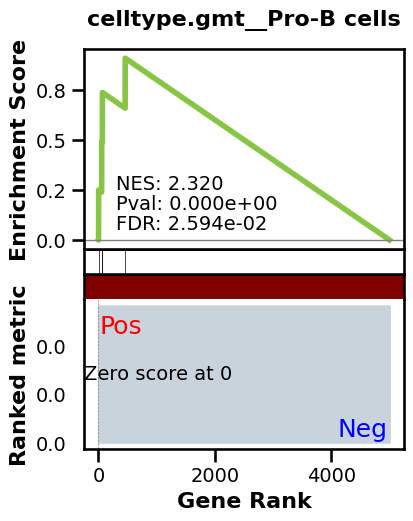

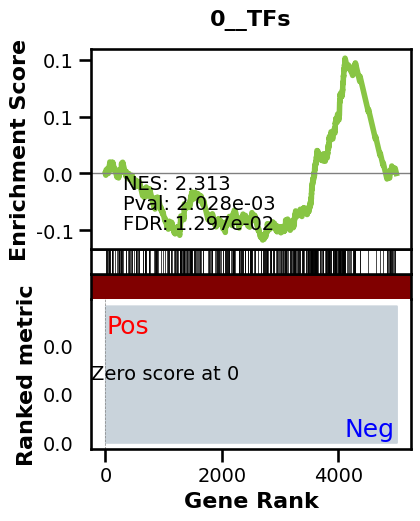

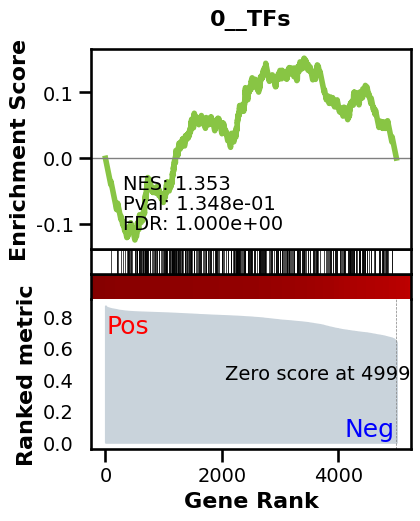

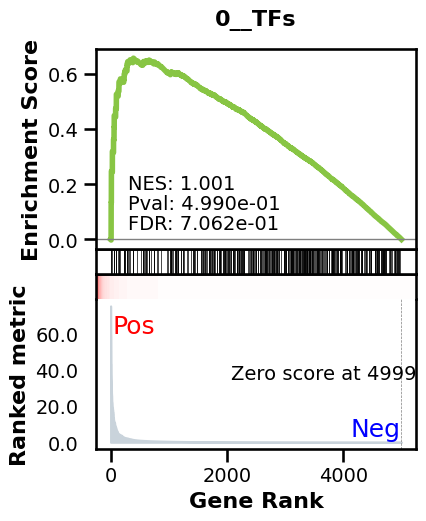

_________________________________________
TF specific enrichment


found some significant results for  16.666666666666668 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.00it/s]


 11%|█         | 14/128 [00:00<00:01, 67.99it/s]


 16%|█▋        | 21/128 [00:00<00:01, 67.98it/s]


 22%|██▏       | 28/128 [00:00<00:01, 67.99it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.02it/s]


 33%|███▎      | 42/128 [00:00<00:01, 67.99it/s]


 38%|███▊      | 49/128 [00:00<00:01, 67.99it/s]


 44%|████▍     | 56/128 [00:00<00:01, 67.97it/s]


 49%|████▉     | 63/128 [00:00<00:00, 67.96it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 67.97it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.00it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 67.97it/s]


 71%|███████   | 91/128 [00:01<00:00, 67.93it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 67.92it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 67.91it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 67.93it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 67.94it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 67.97it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 67.93it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017304579596870758
EPR: 1.043394828548237


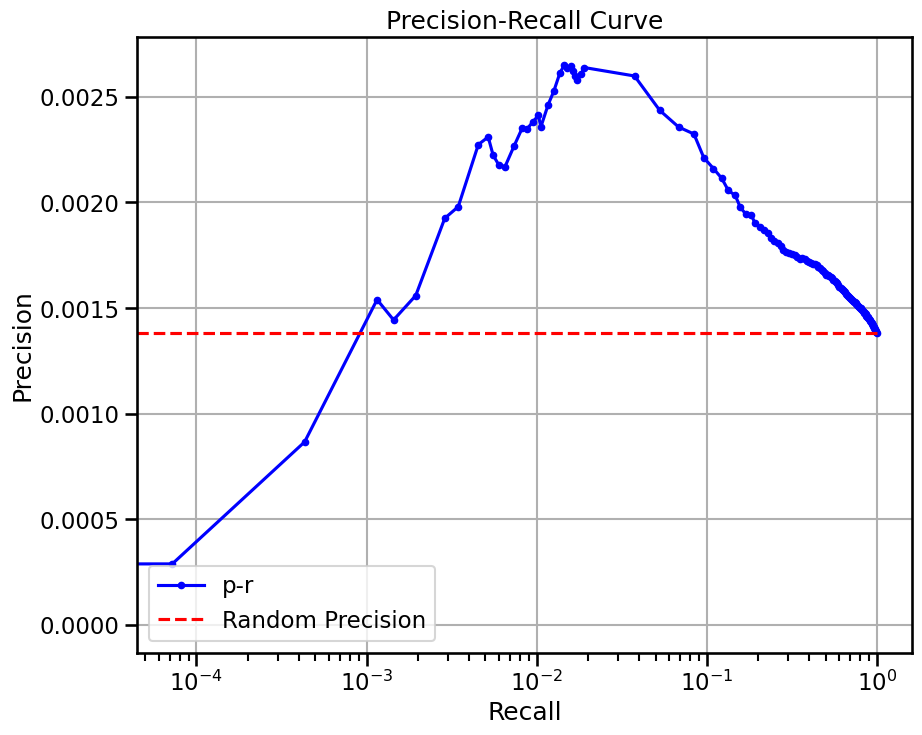

scprint_benchmark2
base enrichment


Top central genes: []


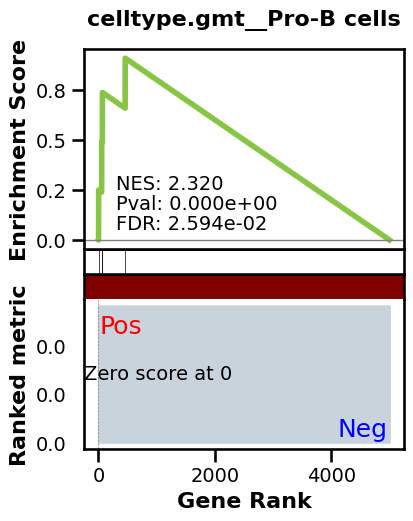

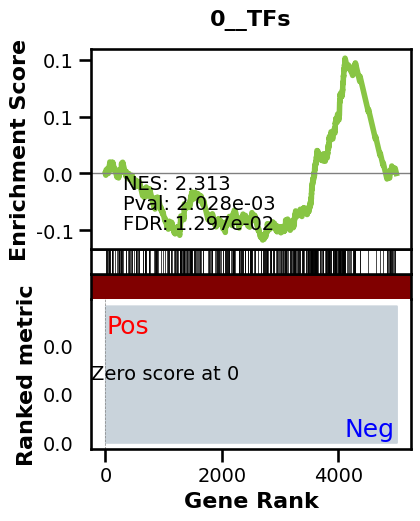

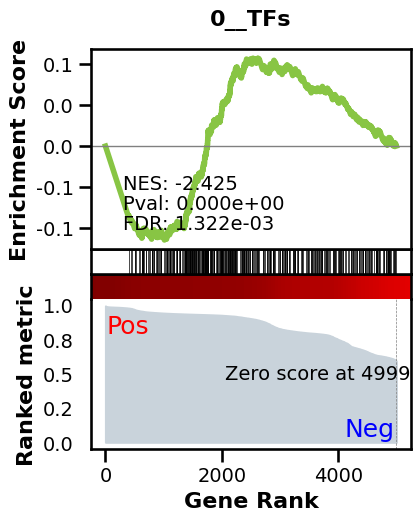

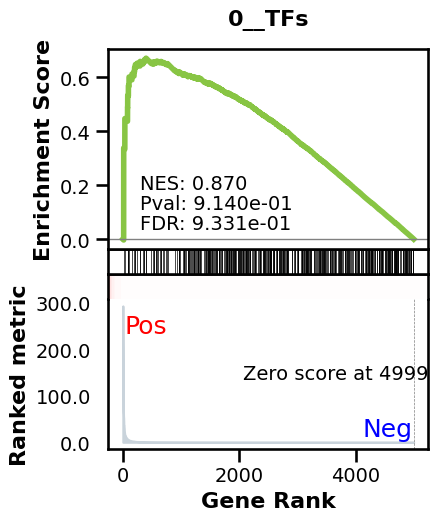

_________________________________________
TF specific enrichment


found some significant results for  18.51851851851852 % TFs

_________________________________________
loading GT,  omnipath


intersection of 3169 genes
intersection pct: 0.6338
precision:  0.00138142053605649 
recall:  1.0 
random precision: 0.001381856590518629



  0%|          | 0/128 [00:00<?, ?it/s]


  5%|▌         | 7/128 [00:00<00:01, 68.15it/s]


 11%|█         | 14/128 [00:00<00:01, 68.06it/s]


 16%|█▋        | 21/128 [00:00<00:01, 67.94it/s]


 22%|██▏       | 28/128 [00:00<00:01, 68.06it/s]


 27%|██▋       | 35/128 [00:00<00:01, 68.14it/s]


 33%|███▎      | 42/128 [00:00<00:01, 68.17it/s]


 38%|███▊      | 49/128 [00:00<00:01, 68.15it/s]


 44%|████▍     | 56/128 [00:00<00:01, 68.14it/s]


 49%|████▉     | 63/128 [00:00<00:00, 68.16it/s]


 55%|█████▍    | 70/128 [00:01<00:00, 68.16it/s]


 60%|██████    | 77/128 [00:01<00:00, 68.13it/s]


 66%|██████▌   | 84/128 [00:01<00:00, 68.17it/s]


 71%|███████   | 91/128 [00:01<00:00, 68.21it/s]


 77%|███████▋  | 98/128 [00:01<00:00, 68.25it/s]


 82%|████████▏ | 105/128 [00:01<00:00, 68.18it/s]


 88%|████████▊ | 112/128 [00:01<00:00, 68.21it/s]


 93%|█████████▎| 119/128 [00:01<00:00, 68.22it/s]


 98%|█████████▊| 126/128 [00:01<00:00, 68.16it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 68.10it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0017919130129962233
EPR: 0.9910818974231654


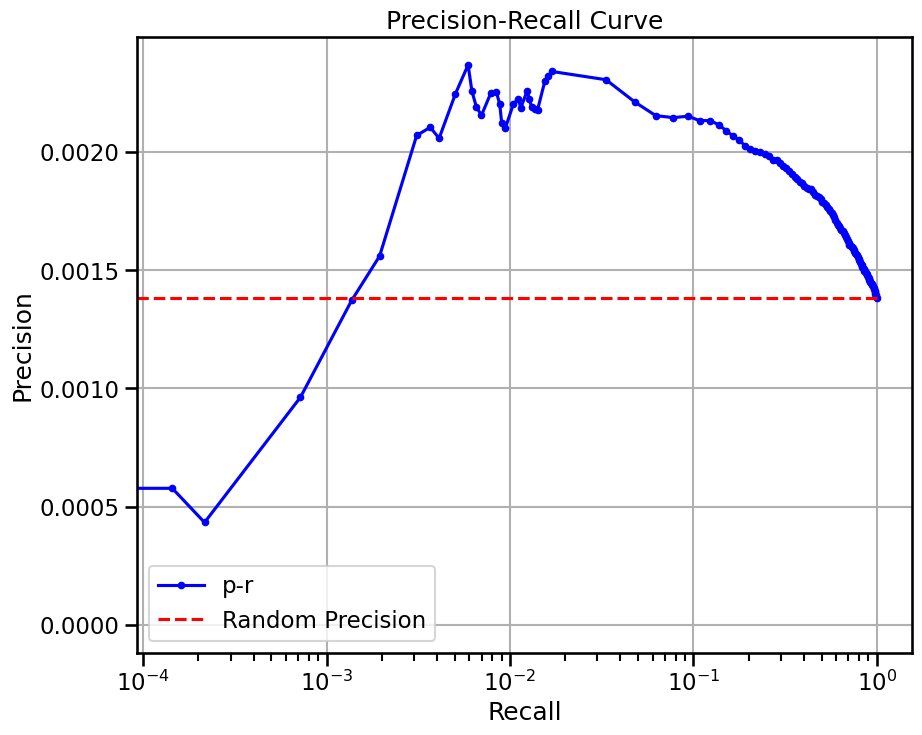

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

avg link count: 536246649, sparsity: 1.0


base enrichment


too many genes for central computation


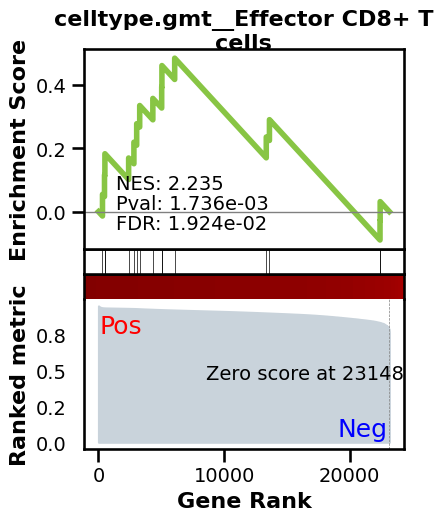

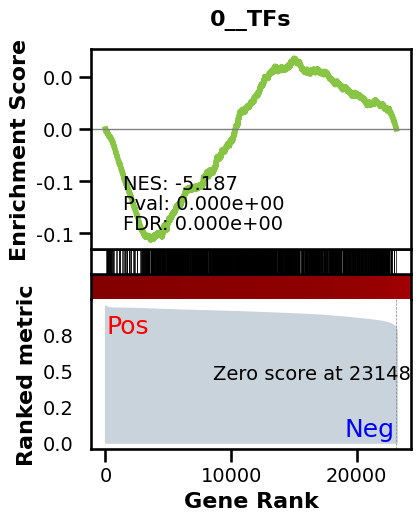

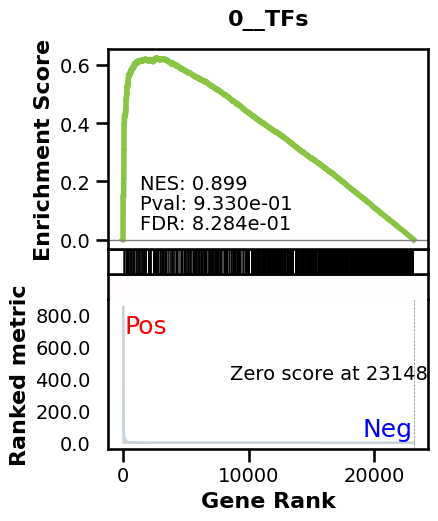

_________________________________________
TF specific enrichment


found some significant results for  66.96428571428571 % TFs

_________________________________________
loading GT,  omnipath


intersection of 12455 genes
intersection pct: 0.5380362002678302


precision:  0.0008896322223674437 
recall:  1.0 
random precision: 0.0008897036558203398



  0%|          | 0/128 [00:00<?, ?it/s]


  1%|          | 1/128 [00:00<00:28,  4.41it/s]


  2%|▏         | 2/128 [00:00<00:28,  4.38it/s]


  2%|▏         | 3/128 [00:00<00:28,  4.38it/s]


  3%|▎         | 4/128 [00:00<00:28,  4.38it/s]


  4%|▍         | 5/128 [00:01<00:28,  4.38it/s]


  5%|▍         | 6/128 [00:01<00:27,  4.38it/s]


  5%|▌         | 7/128 [00:01<00:27,  4.38it/s]


  6%|▋         | 8/128 [00:01<00:27,  4.37it/s]


  7%|▋         | 9/128 [00:02<00:27,  4.37it/s]


  8%|▊         | 10/128 [00:02<00:26,  4.37it/s]


  9%|▊         | 11/128 [00:02<00:26,  4.37it/s]


  9%|▉         | 12/128 [00:02<00:26,  4.37it/s]


 10%|█         | 13/128 [00:02<00:26,  4.37it/s]


 11%|█         | 14/128 [00:03<00:26,  4.37it/s]


 12%|█▏        | 15/128 [00:03<00:25,  4.37it/s]


 12%|█▎        | 16/128 [00:03<00:25,  4.37it/s]


 13%|█▎        | 17/128 [00:03<00:25,  4.37it/s]


 14%|█▍        | 18/128 [00:04<00:25,  4.37it/s]


 15%|█▍        | 19/128 [00:04<00:24,  4.38it/s]


 16%|█▌        | 20/128 [00:04<00:24,  4.38it/s]


 16%|█▋        | 21/128 [00:04<00:24,  4.38it/s]


 17%|█▋        | 22/128 [00:05<00:24,  4.38it/s]


 18%|█▊        | 23/128 [00:05<00:23,  4.38it/s]


 19%|█▉        | 24/128 [00:05<00:23,  4.38it/s]


 20%|█▉        | 25/128 [00:05<00:23,  4.38it/s]


 20%|██        | 26/128 [00:05<00:23,  4.38it/s]


 21%|██        | 27/128 [00:06<00:23,  4.38it/s]


 22%|██▏       | 28/128 [00:06<00:22,  4.38it/s]


 23%|██▎       | 29/128 [00:06<00:22,  4.38it/s]


 23%|██▎       | 30/128 [00:06<00:22,  4.38it/s]


 24%|██▍       | 31/128 [00:07<00:22,  4.38it/s]


 25%|██▌       | 32/128 [00:07<00:21,  4.38it/s]


 26%|██▌       | 33/128 [00:07<00:21,  4.38it/s]


 27%|██▋       | 34/128 [00:07<00:21,  4.38it/s]


 27%|██▋       | 35/128 [00:07<00:21,  4.38it/s]


 28%|██▊       | 36/128 [00:08<00:21,  4.38it/s]


 29%|██▉       | 37/128 [00:08<00:20,  4.38it/s]


 30%|██▉       | 38/128 [00:08<00:20,  4.37it/s]


 30%|███       | 39/128 [00:08<00:20,  4.37it/s]


 31%|███▏      | 40/128 [00:09<00:20,  4.38it/s]


 32%|███▏      | 41/128 [00:09<00:19,  4.38it/s]


 33%|███▎      | 42/128 [00:09<00:19,  4.38it/s]


 34%|███▎      | 43/128 [00:09<00:19,  4.38it/s]


 34%|███▍      | 44/128 [00:10<00:19,  4.38it/s]


 35%|███▌      | 45/128 [00:10<00:18,  4.37it/s]


 36%|███▌      | 46/128 [00:10<00:18,  4.37it/s]


 37%|███▋      | 47/128 [00:10<00:18,  4.37it/s]


 38%|███▊      | 48/128 [00:10<00:18,  4.37it/s]


 38%|███▊      | 49/128 [00:11<00:18,  4.37it/s]


 39%|███▉      | 50/128 [00:11<00:17,  4.37it/s]


 40%|███▉      | 51/128 [00:11<00:17,  4.38it/s]


 41%|████      | 52/128 [00:11<00:17,  4.38it/s]


 41%|████▏     | 53/128 [00:12<00:17,  4.38it/s]


 42%|████▏     | 54/128 [00:12<00:16,  4.38it/s]


 43%|████▎     | 55/128 [00:12<00:16,  4.38it/s]


 44%|████▍     | 56/128 [00:12<00:16,  4.38it/s]


 45%|████▍     | 57/128 [00:13<00:16,  4.38it/s]


 45%|████▌     | 58/128 [00:13<00:15,  4.38it/s]


 46%|████▌     | 59/128 [00:13<00:15,  4.38it/s]


 47%|████▋     | 60/128 [00:13<00:15,  4.38it/s]


 48%|████▊     | 61/128 [00:13<00:15,  4.38it/s]


 48%|████▊     | 62/128 [00:14<00:15,  4.38it/s]


 49%|████▉     | 63/128 [00:14<00:14,  4.38it/s]


 50%|█████     | 64/128 [00:14<00:14,  4.38it/s]


 51%|█████     | 65/128 [00:14<00:14,  4.38it/s]


 52%|█████▏    | 66/128 [00:15<00:14,  4.38it/s]


 52%|█████▏    | 67/128 [00:15<00:13,  4.38it/s]


 53%|█████▎    | 68/128 [00:15<00:13,  4.38it/s]


 54%|█████▍    | 69/128 [00:15<00:13,  4.38it/s]


 55%|█████▍    | 70/128 [00:15<00:13,  4.38it/s]


 55%|█████▌    | 71/128 [00:16<00:13,  4.38it/s]


 56%|█████▋    | 72/128 [00:16<00:12,  4.38it/s]


 57%|█████▋    | 73/128 [00:16<00:12,  4.38it/s]


 58%|█████▊    | 74/128 [00:16<00:12,  4.38it/s]


 59%|█████▊    | 75/128 [00:17<00:12,  4.38it/s]


 59%|█████▉    | 76/128 [00:17<00:11,  4.38it/s]


 60%|██████    | 77/128 [00:17<00:11,  4.38it/s]


 61%|██████    | 78/128 [00:17<00:11,  4.38it/s]


 62%|██████▏   | 79/128 [00:18<00:11,  4.38it/s]


 62%|██████▎   | 80/128 [00:18<00:10,  4.38it/s]


 63%|██████▎   | 81/128 [00:18<00:10,  4.38it/s]


 64%|██████▍   | 82/128 [00:18<00:10,  4.38it/s]


 65%|██████▍   | 83/128 [00:18<00:10,  4.38it/s]


 66%|██████▌   | 84/128 [00:19<00:10,  4.38it/s]


 66%|██████▋   | 85/128 [00:19<00:09,  4.38it/s]


 67%|██████▋   | 86/128 [00:19<00:09,  4.38it/s]


 68%|██████▊   | 87/128 [00:19<00:09,  4.38it/s]


 69%|██████▉   | 88/128 [00:20<00:09,  4.37it/s]


 70%|██████▉   | 89/128 [00:20<00:08,  4.37it/s]


 70%|███████   | 90/128 [00:20<00:08,  4.38it/s]


 71%|███████   | 91/128 [00:20<00:08,  4.38it/s]


 72%|███████▏  | 92/128 [00:21<00:08,  4.38it/s]


 73%|███████▎  | 93/128 [00:21<00:07,  4.38it/s]


 73%|███████▎  | 94/128 [00:21<00:07,  4.38it/s]


 74%|███████▍  | 95/128 [00:21<00:07,  4.38it/s]


 75%|███████▌  | 96/128 [00:21<00:07,  4.38it/s]


 76%|███████▌  | 97/128 [00:22<00:07,  4.38it/s]


 77%|███████▋  | 98/128 [00:22<00:06,  4.38it/s]


 77%|███████▋  | 99/128 [00:22<00:06,  4.38it/s]


 78%|███████▊  | 100/128 [00:22<00:06,  4.38it/s]


 79%|███████▉  | 101/128 [00:23<00:06,  4.38it/s]


 80%|███████▉  | 102/128 [00:23<00:05,  4.38it/s]


 80%|████████  | 103/128 [00:23<00:05,  4.38it/s]


 81%|████████▏ | 104/128 [00:23<00:05,  4.38it/s]


 82%|████████▏ | 105/128 [00:23<00:05,  4.37it/s]


 83%|████████▎ | 106/128 [00:24<00:05,  4.37it/s]


 84%|████████▎ | 107/128 [00:24<00:04,  4.37it/s]


 84%|████████▍ | 108/128 [00:24<00:04,  4.37it/s]


 85%|████████▌ | 109/128 [00:24<00:04,  4.37it/s]


 86%|████████▌ | 110/128 [00:25<00:04,  4.38it/s]


 87%|████████▋ | 111/128 [00:25<00:03,  4.37it/s]


 88%|████████▊ | 112/128 [00:25<00:03,  4.37it/s]


 88%|████████▊ | 113/128 [00:25<00:03,  4.37it/s]


 89%|████████▉ | 114/128 [00:26<00:03,  4.38it/s]


 90%|████████▉ | 115/128 [00:26<00:02,  4.38it/s]


 91%|█████████ | 116/128 [00:26<00:02,  4.38it/s]


 91%|█████████▏| 117/128 [00:26<00:02,  4.37it/s]


 92%|█████████▏| 118/128 [00:26<00:02,  4.37it/s]


 93%|█████████▎| 119/128 [00:27<00:02,  4.37it/s]


 94%|█████████▍| 120/128 [00:27<00:01,  4.37it/s]


 95%|█████████▍| 121/128 [00:27<00:01,  4.37it/s]


 95%|█████████▌| 122/128 [00:27<00:01,  4.37it/s]


 96%|█████████▌| 123/128 [00:28<00:01,  4.37it/s]


 97%|█████████▋| 124/128 [00:28<00:00,  4.37it/s]


 98%|█████████▊| 125/128 [00:28<00:00,  4.37it/s]


 98%|█████████▊| 126/128 [00:28<00:00,  4.37it/s]


 99%|█████████▉| 127/128 [00:29<00:00,  4.38it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()



100%|██████████| 128/128 [00:29<00:00,  4.38it/s]


100%|██████████| 128/128 [00:29<00:00,  4.38it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0010795538924544199


EPR: 2.105372489804468


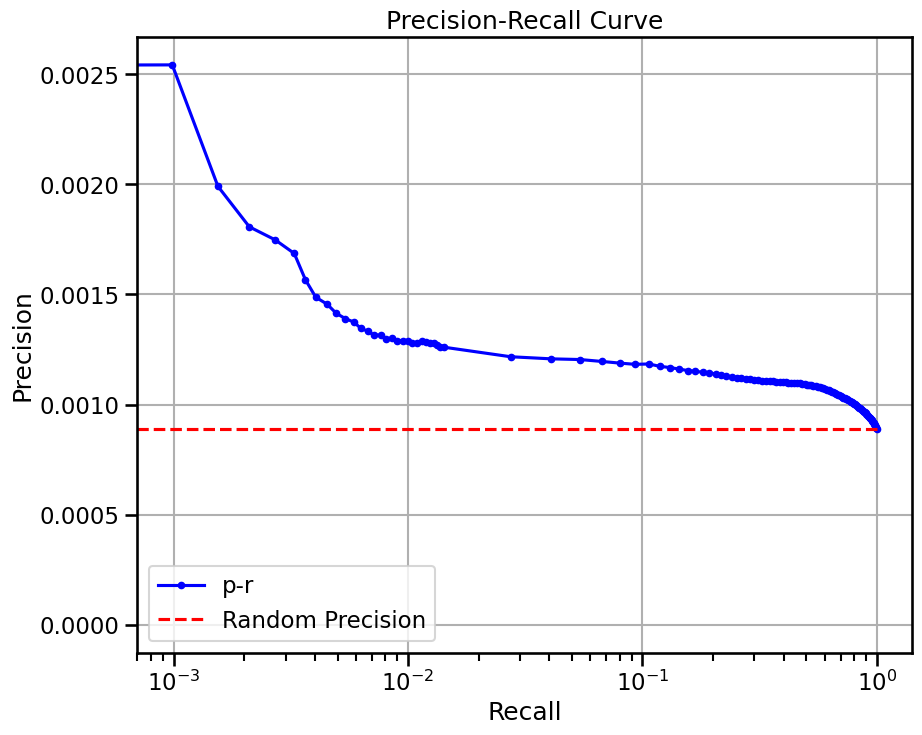

Using 16bit Automatic Mixed Precision (AMP)


GPU available: True (cuda), used: True


TPU available: False, using: 0 TPU cores


IPU available: False, using: 0 IPUs


HPU available: False, using: 0 HPUs


/pasteur/appa/homes/jkalfon/scPRINT/scprint/tasks/grn.py:172: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  organisms=[subadata.obs["organism_ontology_term_id"][0]],


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


SLURM auto-requeueing enabled. Setting signal handlers.


Predicting: |          | 0/? [00:00<?, ?it/s]

base enrichment


Top central genes: []


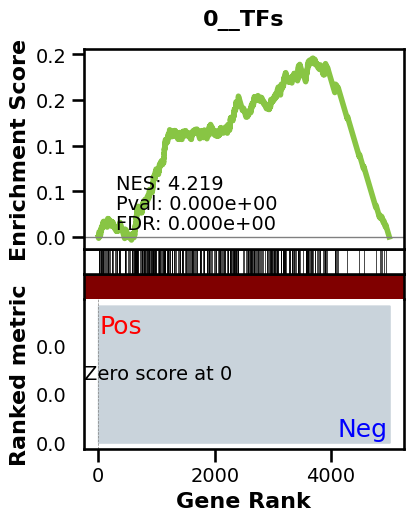

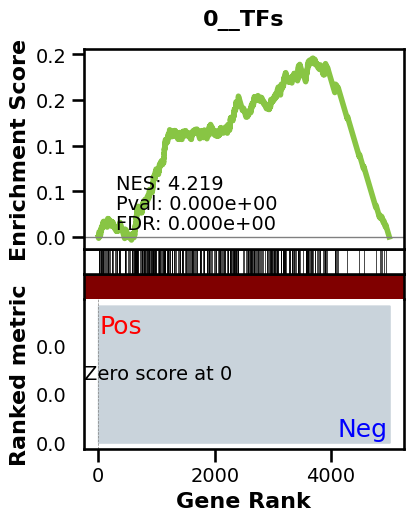

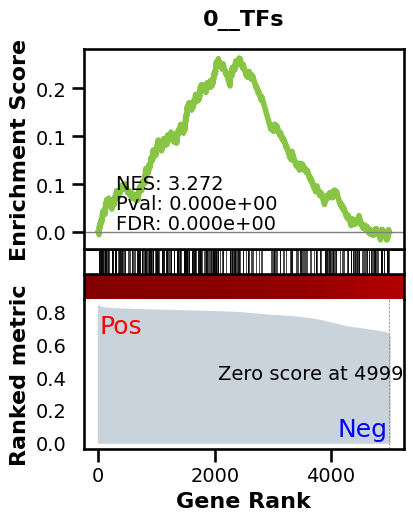

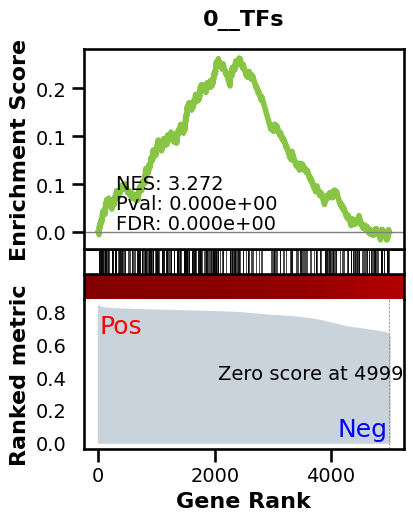

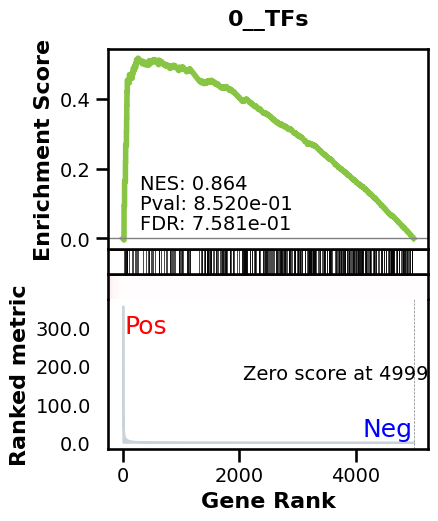

_________________________________________
TF specific enrichment


found some significant results for  36.36363636363637 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 95.28it/s]


 16%|█▌        | 20/128 [00:00<00:01, 95.40it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.49it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.43it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.56it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.53it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.50it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.44it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.39it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.38it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.35it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.33it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.37it/s]

Area Under Precision-Recall Curve (AUPRC):  0.001366047064516947
EPR: 0.6575809985125273


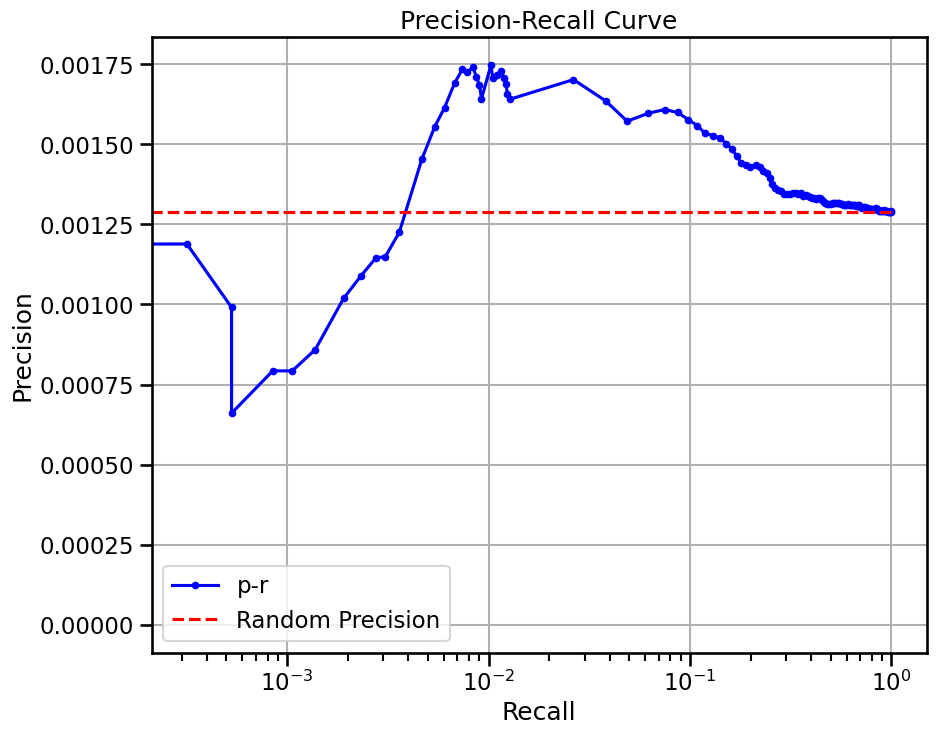

scprint_benchmark2
base enrichment


Top central genes: []


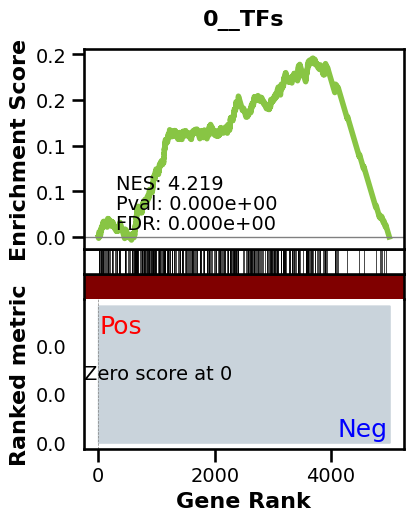

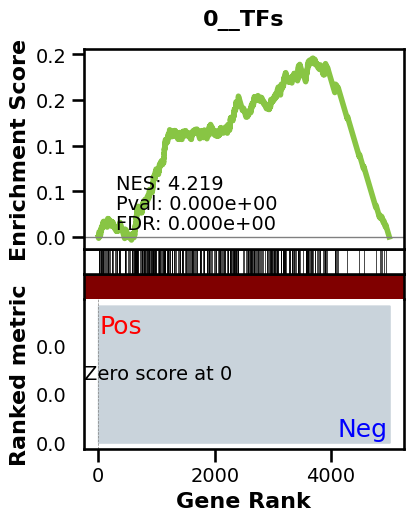

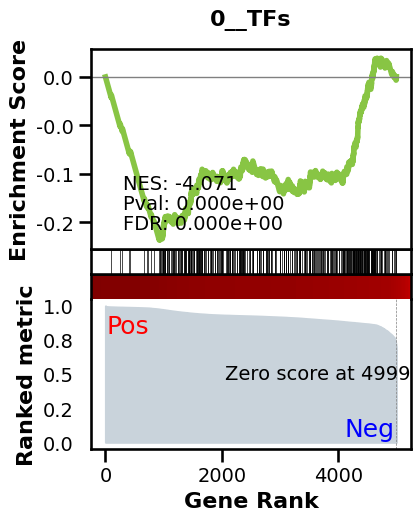

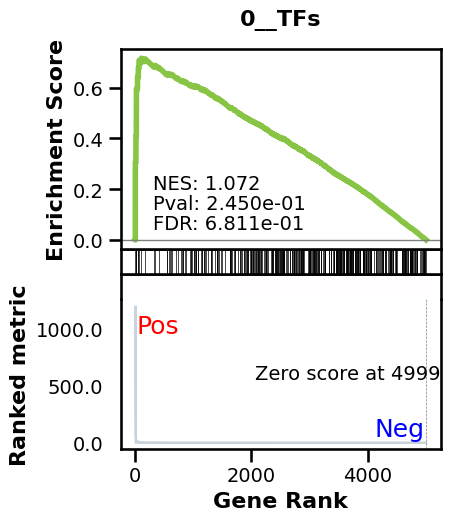

_________________________________________
TF specific enrichment


found some significant results for  27.272727272727273 % TFs

_________________________________________
loading GT,  omnipath


intersection of 2705 genes
intersection pct: 0.541
precision:  0.0012886384835366833 
recall:  1.0 
random precision: 0.0012891150510231984



  0%|          | 0/128 [00:00<?, ?it/s]


  8%|▊         | 10/128 [00:00<00:01, 95.56it/s]


 16%|█▌        | 20/128 [00:00<00:01, 95.53it/s]


 23%|██▎       | 30/128 [00:00<00:01, 95.52it/s]


 31%|███▏      | 40/128 [00:00<00:00, 95.19it/s]


 39%|███▉      | 50/128 [00:00<00:00, 95.27it/s]


 47%|████▋     | 60/128 [00:00<00:00, 95.37it/s]


 55%|█████▍    | 70/128 [00:00<00:00, 95.45it/s]


 62%|██████▎   | 80/128 [00:00<00:00, 95.05it/s]


 70%|███████   | 90/128 [00:00<00:00, 95.19it/s]


 78%|███████▊  | 100/128 [00:01<00:00, 95.34it/s]


 86%|████████▌ | 110/128 [00:01<00:00, 95.40it/s]


 94%|█████████▍| 120/128 [00:01<00:00, 95.51it/s]

/pasteur/appa/homes/jkalfon/benGRN/bengrn/base.py:753: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()

100%|██████████| 128/128 [00:01<00:00, 95.22it/s]

Area Under Precision-Recall Curve (AUPRC):  0.0012531357597336235
EPR: 1.2347998377313367


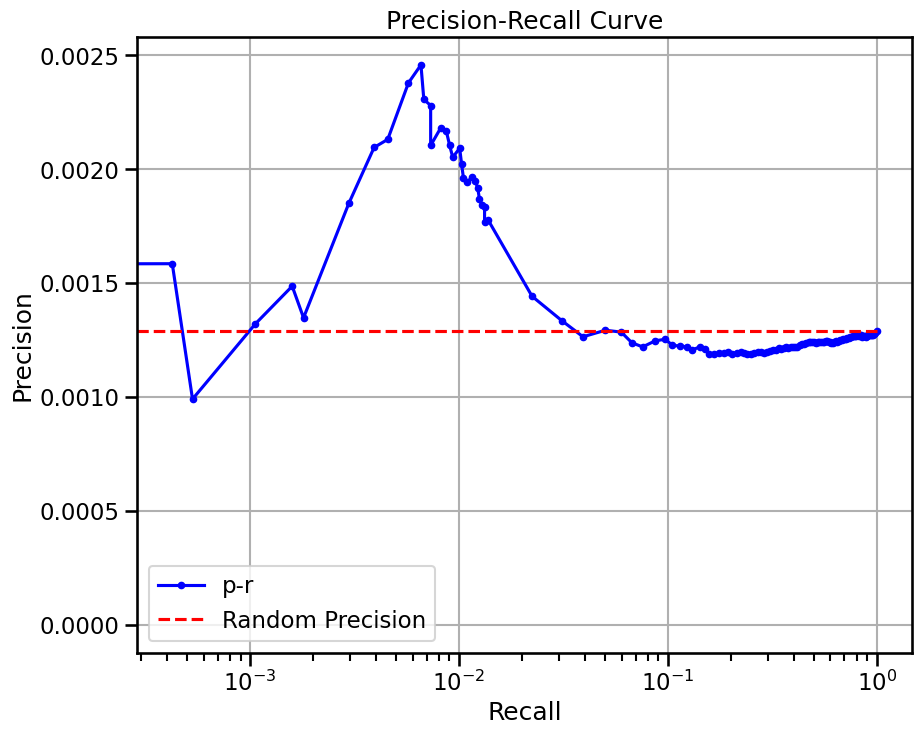

In [5]:
metrics = {}
clf_omni = None
for celltype in CELLTYPES:
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="random expr",
                         preprocess="softmax",
                         head_agg='mean',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=2200,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    metrics[celltype+'_scprint_full'] = BenGRN(grn).scprint_benchmark()
    del grn
    grn_inferer = GRNfer(model, adata[adata.X.sum(1) > 500],
                         how="most var across",
                         preprocess="softmax",
                         head_agg='none',
                         filtration="none",
                         forward_mode="none",
                         organisms=['NCBITaxon:9606','NCBITaxon:10090'],
                         num_genes=NUM_GENES,
                         max_cells=MAXCELLS,
                         doplot=False,
                         batch_size=32,
                         )
    grn = grn_inferer(layer=list(range(model.nlayers))[:], cell_type=celltype)
    grn.var.index = make_index_unique(grn.var['symbol'].astype(str))
    grn.varp['all'] = grn.varp['GRN']
    grn.varp['GRN'] = grn.varp['GRN'].mean(-1)
    metrics[celltype+'_scprint'] = BenGRN(grn).scprint_benchmark()
    
    if clf_omni == None:
        grn.varp['GRN'] = grn.varp['all']
        print("train classifier")
        _, m, clf_omni = train_classifier(grn, C=0.01, train_size=0.4, class_weight={
                                        1: 200, 0: 1}, shuffle=False, max_iter=200, return_full=False)
        joblib.dump(clf_omni, 'clf_omni.pkl')
    grn.varp['GRN'] = grn.varp['all'][:,:,clf_omni.coef_[0] > 0].mean(-1)
    print("scprint_benchmark2")
    metrics[celltype+'_scprint_class'] = BenGRN(grn).scprint_benchmark()
    del grn

In [6]:
m

{'used_heads': 89,
 'precision': 0.0017199514366653178,
 'random_precision': 0.0007107006305408492,
 'recall': 0.0032843894899536323,
 'predicted_true': 9884.0,
 'number_of_true': 5176.0,
 'epr': 3.546742831007246}

In [7]:
mmetrics

{'kidney distal convoluted tubule epithelial cell_scprint_full': {'TF_enr': True,
  'significant_enriched_TFtargets': 64.28571428571429,
  'precision': 0.0008896322223674437,
  'recall': 1.0,
  'rand_precision': 0.0008897036558203398,
  'auprc': 0.001010693005564139,
  'epr': 1.8024703544760803},
 'kidney distal convoluted tubule epithelial cell_scprint': {'TF_enr': True,
  'enriched_terms_Targets': ['celltype.gmt__Acinar cells',
   'celltype.gmt__Distal tubule cells'],
  'enriched_terms_Regulators': ['celltype.gmt__Distal tubule cells',
   'celltype.gmt__Beta cells',
   'celltype.gmt__Cholangiocytes',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Gamma (PP) cells'],
  'significant_enriched_TFtargets': 11.764705882352942,
  'precision': 0.0008261483363013599,
  'recall': 1.0,
  'rand_precision': 0.0008263855307705822,
  'auprc': 0.000876341582078115,
  'epr': 2.6620469453287052},
 'kidney distal conv

### we have 50% of the omnipath coming from protein interaction type stuff. the model doesn't get necessarily a ton better without it.

### we have 75% less sources in the transcript only dataset and similar amount of targets.

### in the end we get that most transcript level ground truth doesn't overlap the ppi level one. so dropping it would help in the results but on both side. and it should not help too much with EPR


In [2]:
import pandas as pd

In [3]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

name       EPR     AUPRC      RAND    TF_targ  TF_enr  TF_only
0      full  1.802470  0.001011  0.000890  64.285714    True    False
1   scprint  2.662047  0.000876  0.000826  11.764706    True    False
2     class  1.086194  0.000836  0.000826   2.941176    True    False
3      full  1.761563  0.001014  0.000890  65.178571   False    False
4   scprint  1.721485  0.000883  0.000834  11.538462    True    False
5     class  1.228624  0.000813  0.000834   0.000000    True    False
6      full  1.917044  0.001028  0.000890  63.392857    True    False
7   scprint  0.713462  0.001399  0.001259  15.625000    True    False
8     class  1.378266  0.001453  0.001259   9.375000    True    False
9      full  1.389397  0.001062  0.000943  34.722222   False    False
10  scprint  0.579329  0.001294  0.001044  34.375000    True    False
11    class  1.392752  0.001270  0.001044  18.750000    True    False
12     full  1.638875  0.001060  0.000890  67.857143    True    False
13  scprint  1.618166  0.001737  0.001573  29.090909    True    False
14    class  1.325679  0.001722  0.001573  10.909091    True    False
15     full  1.818835  0.001028  0.000890  65.178571   False    False
16  scprint  1.176409  0.001522  0.001415  22.916667    True    False
17    class  1.420784  0.001631  0.001415   6.250000    True    False
18     full  1.531616  0.001050  0.000910  58.558559   False    False
19  scprint  0.700754  0.001501  0.001351  28.571429    True    False
20    class  2.198715  0.001670  0.001351   9.523810    True    False
21     full  2.228263  0.001051  0.000890  66.964286   False    False
22  scprint  1.238022  0.001612  0.001381  45.833333    True    False
23    class  2.345620  0.001447  0.001381  20.833333    True    False
24     full  2.039853  0.001078  0.000890  64.285714   False    False
25  scprint  1.043395  0.001730  0.001382  16.666667   False    False
26    class  0.991082  0.001792  0.001382  18.518519   False    False
27     full  2.105372  0.001080  0.000890  66.964286    True    False
28  scprint  0.657581  0.001366  0.001289  36.363636    True    False
29    class  1.234800  0.001253  0.001289  27.272727    True    False